In [1011]:
from IPython.display import Image

# Linear Regression

**It is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables)**

In [1012]:
# Image(filename='linear.png')

# $y = \beta_0 + x\beta_1 + \epsilon$

# Problem with categorical variables

In [1013]:
# Image(filename='linearvslogistic.jpg')

# Logistic regression

**It is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. Each class would be assigned a probability between 0 and 1, with a sum of one.**

# $\frac{y}{1-y} = b^{\beta_0 + x\beta_1 + \epsilon}$

# $y = \frac{1}{1 + b^{-(\beta_0 + x\beta_1 + \epsilon)}} = S_b(\beta_0 + x\beta_1 + \epsilon)$

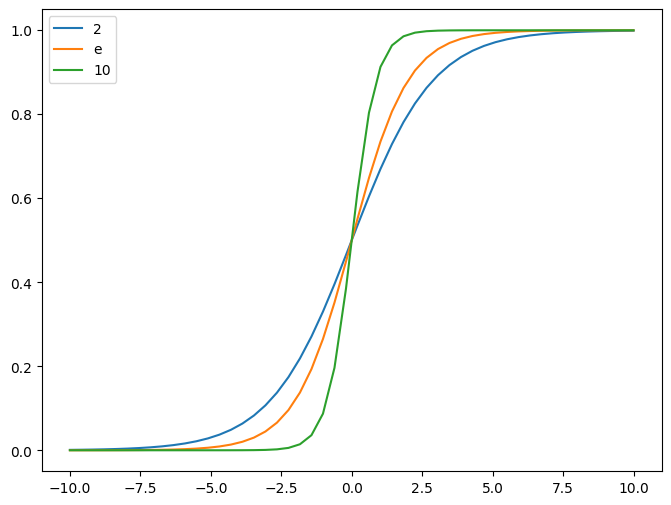

In [1014]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x, b):
    return 1/(1+b**(-x))

x_array = np.linspace(-10, 10)

plt.figure(figsize=(8,6))
plt.plot(x_array, sigmoid(x_array, 2), label = '2')
plt.plot(x_array, sigmoid(x_array, np.e), label = 'e')
plt.plot(x_array, sigmoid(x_array, 10), label = '10')
plt.legend()
plt.show()

In [1015]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1016]:
df_shots = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SportsAnalytics/Regression/df_shots.csv').drop('Unnamed: 0', axis=1)

In [1017]:
df_shots.describe()

,start_frame,end_frame,origin_pos_x,origin_pos_y,destination_pos_x,destination_pos_y
count,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000,7990.000000
mean,75252.686880,75274.607383,0.868697,0.494106,0.965611,0.498441
std,41227.880425,41233.373056,0.074008,0.119786,0.052812,0.086854
min,386.675000,394.556275,0.246667,0.013750,0.685833,0.001250
25%,40167.818750,40203.564000,0.820833,0.405000,0.951667,0.451250
50%,77130.337500,77150.353438,0.882500,0.496250,0.993333,0.497500
75%,110671.856250,110701.762094,0.925000,0.581250,1.000000,0.545000
max,156779.125000,156810.800925,1.005833,0.980000,1.000000,1.000000


In [1018]:
#Clean data with no goalkeepers

def count_keepers(row):
    freeze_frame = eval(row.freeze_frame)
    keeper_count = 0
    for player in freeze_frame:
        if not player['teammate'] and player.get('keeper', False):
            keeper_count +=1
    return keeper_count

df_shots['keeper_count'] = df_shots.apply(count_keepers, axis=1)
df_shots = df_shots[df_shots['keeper_count'] == 1]
df_shots = df_shots.drop('keeper_count', axis=1)

In [1019]:
df_shots.head(3)

,start_frame,end_frame,event_type,origin_pos_x,origin_pos_y,destination_pos_x,destination_pos_y,is_header,is_goal,freeze_frame,from_set_pieces,from_free_kick,from_penalty
0,3230.175,3249.033025,Shot,0.899167,0.6275,1.0000,0.5400,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False
1,14167.350,14185.561050,Shot,0.870833,0.3775,0.9775,0.4850,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",False,False,False
2,15756.100,15780.660425,Shot,0.849167,0.3875,1.0000,0.4475,False,False,"[{'teammate': True, 'actor': False, 'keeper': ...",True,False,False


* **event_type**: only 'Shot' for this lab
* **start_frame & end_frame**: start and end frame of the given action within the match video (25 frames per second, so you could compute the total time the action has taken)
* **origin_pos_? & destination_pos_?**: origin and destination position for the x and y coordinates of the given action. Besides it is not explicit, these variables are still normalized!
* **is_header**: is the shot a "head-shot"? (Boolean variable)
* **freeze_frame**: information about each of the players in the on-ball team and the opponent one. YOU SHOULD READ THIS AS A DICTIONARY! We are going to see this later deeply.
* **from_set_pieces**: is the shot originated from a set piece play (i.e. corners) (Boolean variable)
* **from_free_kick**: is the shot originated from a free kick (Boolean variable)
* **from_penalty**: is the shot originated from a penalty (Boolean variable)

**Lets take a closer look to freeze_frame object**

In [1020]:
df_shots.loc[0].freeze_frame

"[{'teammate': True, 'actor': False, 'keeper': False, 'location': [0.63738225, 0.3037944375]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.7728751666666667, 0.713117375]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.7747634166666667, 0.7248936625]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.7991360000000001, 0.563265875]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8010477083333334, 0.5313675875]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8506343333333334, 0.664471]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8648189583333333, 0.7899905625]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.8743958333333333, 0.5598908375]}, {'teammate': False, 'actor': False, 'keeper': False, 'location': [0.8889644166666667, 0.521435125]}, {'teammate': True, 'actor': False, 'keeper': False, 'location': [0.9002543333333333, 0.3555984]}, {

**As always, we read it as a dictionary by using eval() function** (lets just see the first element)

In [1021]:
eval(df_shots.loc[0].freeze_frame)[0]

{'teammate': True,
 'actor': False,
 'keeper': False,
 'location': [0.63738225, 0.3037944375]}

* **teammate**: is this player from the team who took the shot? (Boolean variable)
* **actor**: is this player taking the shot? (Boolean variable)
* **keeper**: is this player the goalkeeper? (Boolean variable)
* **location**: normalized location of the player (between [0,1]). Remember to use the pitch dimensions [105, 68] to unnormalize.

**IMPORTANT: it is possible that the number of players in the dictionary is less than 22 (eleven per team) due to the StatsBomb data architecture. Freeze frame data only saves information about the players available in the video image.** A quick example of StatsBomb data:

In [1022]:
# Image(filename='statsbomb_ex.PNG', width=480)

Lets do a quick visualization to get how to explore this dictionary. We first define our functions to drar the football pitch:

In [1023]:
def _point_to_meters_inverse(p, w=105, h=68):
    return np.array([p[0] * h, p[1] * w])

def _point_to_meters(p, w=105, h=68):
    return np.array([p[0] * w, p[1] * h])

def _draw_field(width=68, height=105, fig_size=8, lines_color="#bcbcbc", background_color="white"):
    ratio = width / float(height)
    f, ax = plt.subplots(1, 1, figsize=(fig_size * ratio, fig_size), dpi=100)

    if background_color:
        ax.add_patch(patches.Rectangle((0, 0), width, height, color=background_color))

    line_pts = [
        [_point_to_meters([0, 0]), _point_to_meters([0, 1])],
        [_point_to_meters([1, 0]), _point_to_meters([1, 1])],
        [_point_to_meters([0, 1]), _point_to_meters([1, 1])],
        [_point_to_meters([0, 0]), _point_to_meters([1, 0])],
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], '-', alpha=0.8,
                lw=1.5, zorder=2, color=lines_color)

    line_pts = [
        [_point_to_meters([0.5, 0]), _point_to_meters([0.5, 1])],

        [[0, 24.85], [0, 2.85]],
        [[0, 13.85], [16.5, 13.85]],
        [[0, 54.15], [16.5, 54.15]],
        [[16.5, 13.85], [16.5, 54.15]],

        [[0, 24.85], [5.5, 24.85]],
        [[0, 43.15], [5.5, 43.15]],
        [[5.5, 24.85], [5.5, 43.15]],

        [[105, 24.85], [105, 2.85]],
        [[105, 13.85], [88.5, 13.85]],
        [[105, 54.15], [88.5, 54.15]],
        [[88.5, 13.85], [88.5, 54.15]],

        [[105, 24.85], [99.5, 24.85]],
        [[105, 43.15], [99.5, 43.15]],
        [[99.5, 24.85], [99.5, 43.14]]
    ]

    for line_pt in line_pts:
        ax.plot([line_pt[0][0], line_pt[1][0]], [line_pt[0][1], line_pt[1][1]], '-',
                alpha=0.8, lw=1.5, zorder=2, color=lines_color)

    # Circles
    ax.add_patch(patches.Wedge((94.0, 34.0), 9, 128, 232, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((11.0, 34.0), 9, 308, 52, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    ax.add_patch(patches.Wedge((52.5, 34), 9.5, 0, 360, fill=False, edgecolor=lines_color,
                               facecolor=lines_color, zorder=4, width=0.02))

    plt.axis('off')

    return f, ax

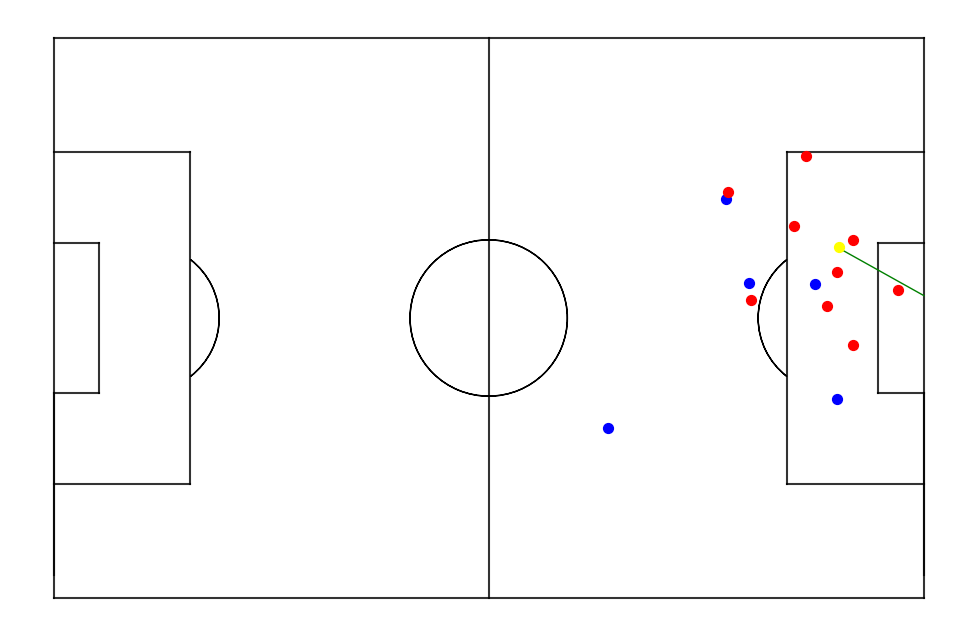

In [1024]:
import matplotlib.pyplot as plt #we use this library to plot
import matplotlib.patches as patches #some more stuff to plot

ww=105 #here we define the "real" size of the football pitch in meters, hh=height and ww=width
hh=68

pitch_dim = np.array([ww,hh]) #we define a pitch dimension vector in case we want to unnormalize some positions

fig, ax = _draw_field(fig_size=8, width=ww, height=hh, lines_color='black') #football pitch figure and axis initialization

shot_to_plot = df_shots.loc[0]

for player in eval(shot_to_plot.freeze_frame): #always use eval()
    color = 'blue' if player['teammate'] == True else 'red' #we define teammate's color as blue, opponent color red
    color = 'yellow' if player['actor'] == True else color #we define actor's color as yellow

    ax.scatter(player['location'][0]*ww, player['location'][1]*hh, color=color, s=50, zorder=100)

ax.plot([shot_to_plot.origin_pos_x*ww, shot_to_plot.destination_pos_x*ww], [shot_to_plot.origin_pos_y*hh, shot_to_plot.destination_pos_y*hh],
        color='green', lw=1)
plt.show()

Notice there are just 6 players from the team who's taking the shot!

# Logistic Regression with Sci-kit learn

**We are going to use a simple logistic regression (NO PENALTY) to build an expected goal (xG) model.**

**Expected goals (xG) is a predictive model used to assess every goal-scoring chance, and the likelihood of scoring. A xG model computes for each chance the probability to score based on what we know about it (event-based variables)**.

**I'm going to build a quick baseline logistic regression model by only using the distance to the opponent goal from where each shot is taken.**

First, lets compute the distance to opponent goal and add the variable to our dataframe

In [1025]:
#@title Distance shooter-goal
def distance_to_goal(shot_location):
    opp_goal_pos = np.array([1,0.5]) * pitch_dim #this is the opponent goal location

    return np.linalg.norm(opp_goal_pos - shot_location)

df_shots['distance_to_goal'] = df_shots.apply(lambda row: distance_to_goal(np.array([row.origin_pos_x, row.origin_pos_y])*pitch_dim), axis=1)

First, lets transform our boolean variables into [0,1]

In [1026]:
df_shots["is_goal"] = df_shots["is_goal"].astype(int)
df_shots["is_header"] = df_shots["is_header"].astype(int)
df_shots["from_set_pieces"] = df_shots["from_set_pieces"].astype(int)
df_shots["from_free_kick"] = df_shots["from_free_kick"].astype(int)
df_shots["from_penalty"] = df_shots["from_penalty"].astype(int)

In [1027]:
from sklearn.linear_model import LogisticRegression #we import the LogisticRegression class from the sklearn library
from sklearn.model_selection import train_test_split #we are going to split into train and test set, preventing overfit

X = df_shots.distance_to_goal
y = df_shots.is_goal

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y) #split into train and test set

clf1 = LogisticRegression(random_state=0).fit(np.array(X_train1).reshape(-1, 1), y_train1) #we train with the train set
#array.reshape(-1,1) is necessary due to using only 1 variable
y_pred1 = clf1.predict_proba(np.array(X_test1).reshape(-1,1)) #we predict with the test set

In [1028]:
y_pred1

array([[0.93547831, 0.06452169],
       [0.81338831, 0.18661169],
       [0.90484614, 0.09515386],
       ...,
       [0.7438293 , 0.2561707 ],
       [0.93657927, 0.06342073],
       [0.74192767, 0.25807233]])

**For each observation, we have a 2D array prediction, [probability class being 0, probability class being 1]**

**To evaluate our model we are going to use two methods:**
    
* **Calibration curve**: used to evaluate how calibrated a classifier is i.e., how the probabilities of predicting each class label differ. The x-axis represents the average predicted probability in each bin. The y-axis is the ratio of positives (the proportion of positive predictions)

* **ROC curve**: illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. We use area under ROC curve (AUC ROC) as a metric to evaluate our model. AUC = 0.5 for random classifiers, AUC=1 for perfect classifiers.

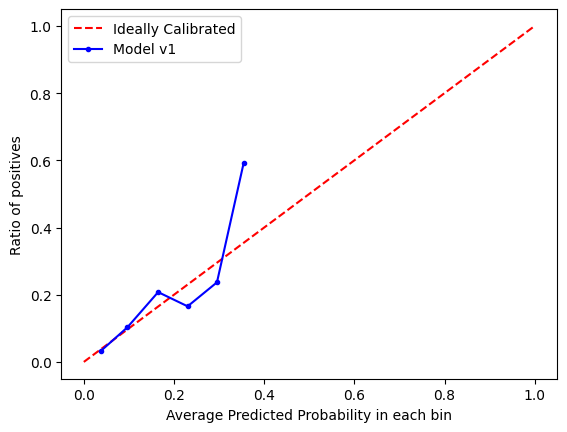

In [1029]:
from sklearn.calibration import calibration_curve

x_c1, y_c1 = calibration_curve(y_test1, y_pred1[:,1], n_bins=15)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c1, x_c1, marker = '.', color='b', label = 'Model v1')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

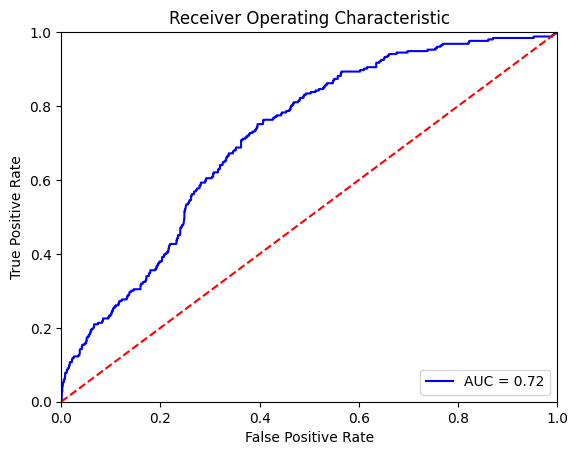

In [1030]:
import sklearn.metrics as metrics

fpr1, tpr1, threshold1 = metrics.roc_curve(y_test1, y_pred1[:,1])
roc_auc1 = metrics.auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Notice that we are facing an unbalanced classification problem, there lots of no-goals and few goals**:

In [1031]:
print(f'Goals: {y_train1.sum()}')
print(f'Total shots: {len(y_train1)}')

Goals: 591
Total shots: 5100


We need to know the proportion

In [1032]:
y_train1.sum() / len(y_train1)

0.11588235294117646

**Now we include this weight into the regressor:**

In [1033]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size=0.3, random_state=0, stratify=y)
#We include the 'stratify' attribute in order to split the dataset with the same goal/no-goal proportion

clf2 = LogisticRegression(random_state=0, class_weight={1:1, 0:0.1133}).fit(np.array(X_train2).reshape(-1, 1), y_train2)
#we include the class weight as a dictionary:
y_pred = clf2.predict_proba(np.array(X_test2).reshape(-1,1))

In [1034]:
y_pred2

array([[0.6119754 , 0.3880246 ],
       [0.33204544, 0.66795456],
       [0.53220878, 0.46779122],
       ...,
       [0.22030005, 0.77969995],
       [0.63334477, 0.36665523],
       [0.21212344, 0.78787656]])

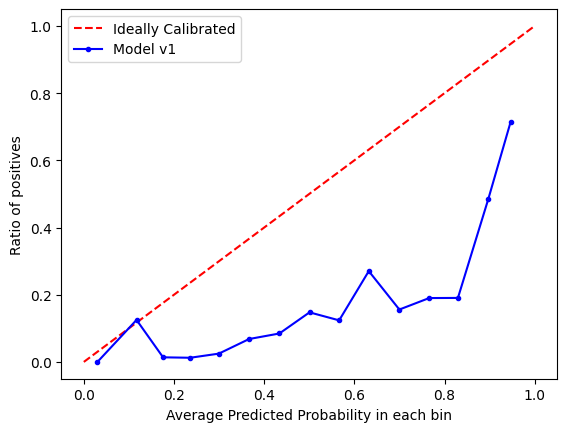

In [1035]:
x_c2, y_c2 = calibration_curve(y_test2, y_pred2[:,1], n_bins=15)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c2, x_c2, marker = '.', color='b', label = 'Model v1')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

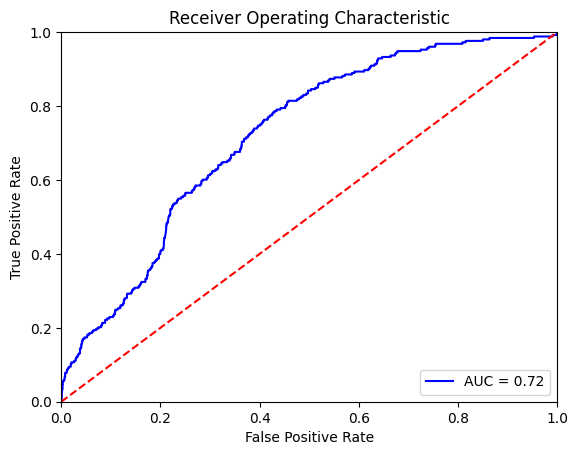

In [1036]:
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test2, y_pred2[:,1])
roc_auc2 = metrics.auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Check how the predicted goal probability depends on the shot distance**:

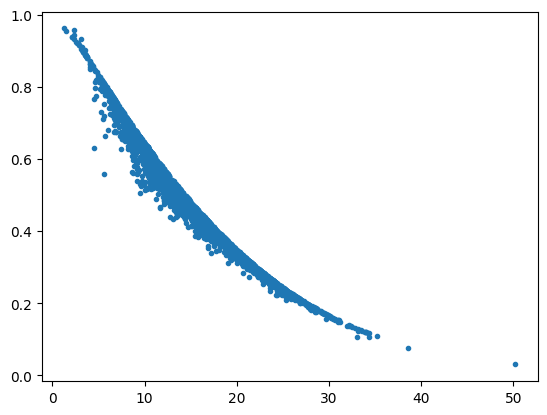

In [1037]:
plt.plot(X_test2, y_pred2[:,1], '.')

**Let's try to improve our model by adding a new variable: The shot's angle to goal**:

Here you got a function that computes the angle to goal given a shot location:

In [1038]:
def angle_to_goal(shot_location):

    v1 = np.array([105, (68+7.5)/2]) - shot_location #68/2 +- 7.5 are the locations of the goal posts!
    v2 = np.array([105, (68-7.5)/2]) - shot_location

    cosang = np.dot(v1, v2)
    sinang = np.linalg.norm(np.cross(v1, v2))

    return np.arctan2(sinang, cosang)

In [1039]:
df_shots['angle_to_goal'] = df_shots.apply(lambda row: angle_to_goal(np.array([row.origin_pos_x, row.origin_pos_y])*pitch_dim), axis=1)

In [1040]:
df_shots.angle_to_goal #in radians

,angle_to_goal
0,0.429868
1,0.401977
2,0.382451
3,0.155264
4,0.442236
...,...
7985,0.304680
7986,0.612886
7987,1.221690
7988,0.680808


24.629634366400968


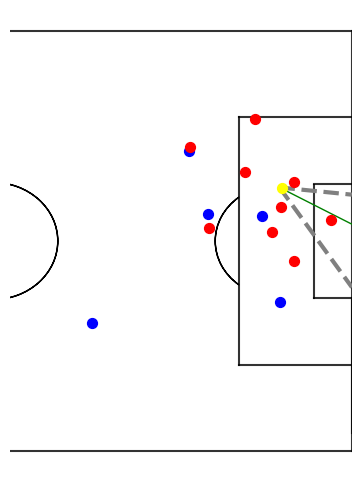

In [1041]:
fig, ax = _draw_field(fig_size=6, width=50, height=hh, lines_color='black') #football pitch figure and axis initialization

shot_to_plot = df_shots.loc[0]
print(shot_to_plot.angle_to_goal *360 / (2*np.pi))

for player in eval(shot_to_plot.freeze_frame): #always use eval()
    color = 'blue' if player['teammate'] == True else 'red' #we define teammate's color as blue, opponent color red
    color = 'yellow' if player['actor'] == True else color #we define actor's color as yellow

    ax.scatter(player['location'][0]*ww, player['location'][1]*hh, color=color, s=50, zorder=100)

ax.plot([shot_to_plot.origin_pos_x*ww, shot_to_plot.destination_pos_x*ww], [shot_to_plot.origin_pos_y*hh, shot_to_plot.destination_pos_y*hh],
        color='green', lw=1)
ax.plot([shot_to_plot.origin_pos_x*ww, 105], [shot_to_plot.origin_pos_y*hh, 68/2+7.5], lw=3, ls='--', color='grey')
ax.plot([shot_to_plot.origin_pos_x*ww, 105], [shot_to_plot.origin_pos_y*hh, 68/2-7.5], lw=3, ls='--', color='grey')
plt.xlim(55, 105)
plt.show()

**So we want to compute the angle between the two grey dashed lines!**

**Once we have included our new variable, lets build a new model**:

In [1042]:
X2 = df_shots[['distance_to_goal', 'angle_to_goal']]
y2 = df_shots.is_goal

X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size=0.3, random_state=0, stratify=y)
#We include the 'stratify' attribute in order to split the dataset with the same goal/no-goal proportion

clf3 = LogisticRegression(random_state=0, class_weight={1:1, 0:0.1133}).fit(X_train3, y_train3)
y_pred3 = clf3.predict_proba(X_test3)

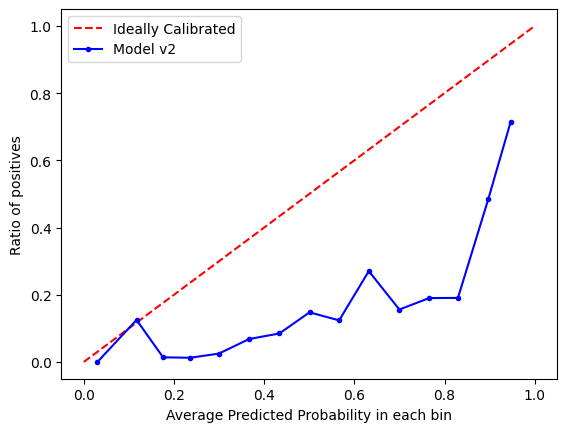

In [1043]:
x_c3, y_c3 = calibration_curve(y_test3, y_pred3[:,1], n_bins=15, pos_label=1)
plt.plot([0, 1], [0, 1], 'r--', label = 'Ideally Calibrated')
plt.plot(y_c3, x_c3, marker = '.', color='b', label = 'Model v2')

plt.plot([])

leg = plt.legend(loc = 'upper left')
plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.show()

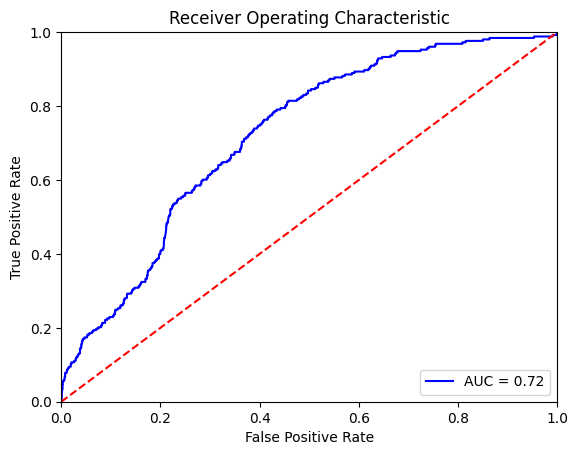

In [1044]:
fpr3, tpr3, threshold = metrics.roc_curve(y_test3, y_pred3[:,1])
roc_auc3 = metrics.auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

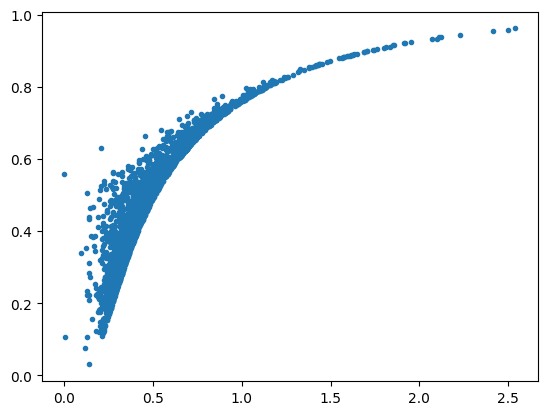

In [1045]:
plt.plot(X_test3.angle_to_goal, y_pred3[:,1], '.')

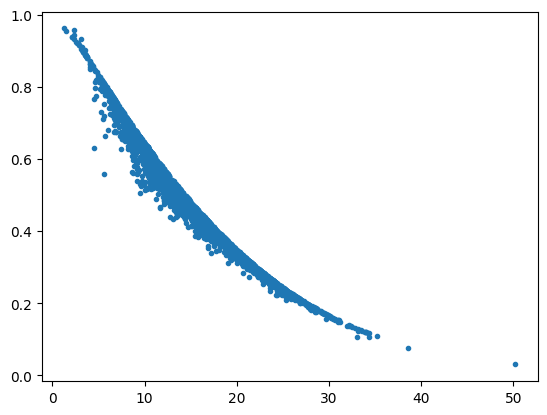

In [1046]:
plt.plot(X_test3.distance_to_goal, y_pred3[:,1], '.')

**Quick code to compute a xG map within the football pitch**:

In [1047]:
import tqdm.notebook as notebook

x_array = np.linspace(0.5, 104.5, 50)
y_array = np.linspace(0.5, 67.5, 30)

xG_map = np.zeros((len(y_array), len(x_array)))

df_xG_map = pd.DataFrame()
for x in notebook.tqdm(range(len(x_array))):
    for y in range(len(y_array)):
        shot_location = np.array([x_array[x], y_array[y]])
        df_xG_map = pd.concat([df_xG_map, pd.DataFrame({'x': x, 'y': y, 'distance_to_goal': distance_to_goal(shot_location),
                                      'angle_to_goal': angle_to_goal(shot_location)}, index=[x+y])])

df_xG_map['xG'] = clf3.predict_proba(df_xG_map[['distance_to_goal', 'angle_to_goal']])[:,1]

  0%|          | 0/50 [00:00<?, ?it/s]

In [1048]:
for x in notebook.tqdm(range(len(x_array))):
    for y in range(len(y_array)):
        xG_map[y,x] = df_xG_map.loc[(df_xG_map.x==x) & (df_xG_map.y==y)].xG

  0%|          | 0/50 [00:00<?, ?it/s]

<ipython-input-1048-08cbddcfec91>:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  xG_map[y,x] = df_xG_map.loc[(df_xG_map.x==x) & (df_xG_map.y==y)].xG


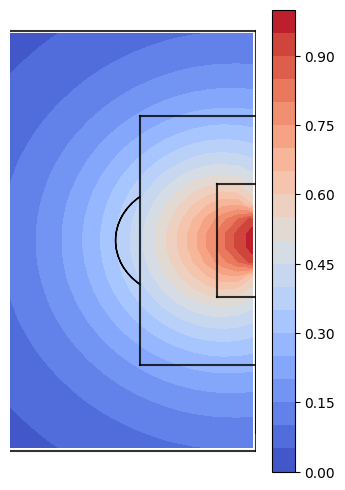

In [1049]:
fig, ax = _draw_field(fig_size=6, width=45, height=hh, lines_color='black')

cs = ax.contourf(x_array, y_array, xG_map, 100, levels=20, vmin=0, vmax=1, cmap= 'coolwarm', zorder=1)
cbar = plt.colorbar(cs, ax=ax)
plt.xlim(70,105)
plt.show()

**Lastly, lets introduce SHAP library:**

In [1050]:
import shap
shap.initjs()

**SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model. It connects optimal credit allocation with local explanations using the classic Shapley values from game theory.**

See further documentation:
https://shap.readthedocs.io/en/latest/index.html

**QUICK SHAP IDEA: it describes each variable's importance within the given model**

Lets do a quick example with our v2 model:

In [1051]:
explainer = shap.Explainer(clf3, X_train3)
shap_values = explainer(X_test3)

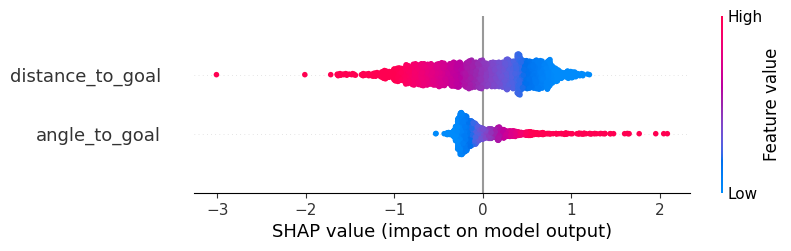

In [1052]:
shap.plots.beeswarm(shap_values)

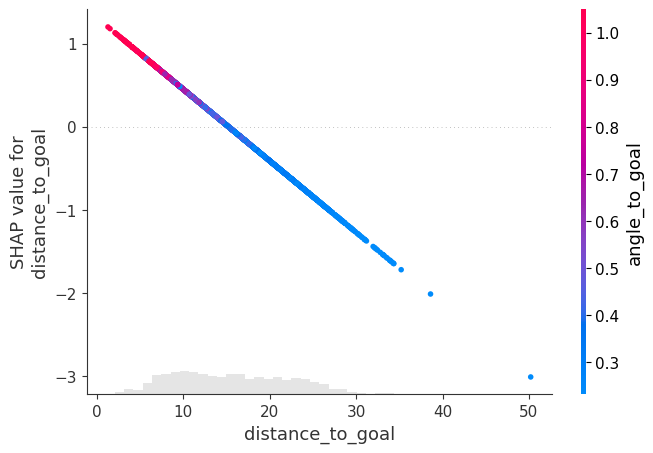

In [1053]:
shap.plots.scatter(shap_values[:, "distance_to_goal"], color=shap_values)

In [1054]:
shap.plots.force(shap_values[0])

In [1055]:
shap.plots.force(shap_values[4])

## **SHAP library's beewsarm plot output:**

Firstly, shap's beesarm plot shows us the model's feature importance, from top to bottom. In our model v2 case, distance to goal is the most important feature.

Each point in the beewsarm plot correspond to a single observation (in our case, a single shot event). For a logistic regression problem, positive SHAP values correspond to feature's importance towards the 1 output (goal) and negative SHAP values correspond to feature's importance towards 0 output. Also, the color of each point represent the observation feature's value. This is, lower (blue) values of distance to goal feature leads to better xG output (towards 1 output), while bigger values leads our model's output to 0 (worse xG output). Again, bigger values of angle to goal feature leads to better xG output.

## EXERCISES

#### **1. Why do we use angle to goal as the available angle between the shot and the posts, and not the angle towards the goal's center? (1 point)**

The angle to the posts uses two reference points (the goalposts), providing a fuller representation of scoring opportunities. Using the goal's center or a horizontal line relies on one point, offering less variation and losing detail. A larger angle indicates more of the goal is visible, increasing scoring chances, while smaller angles suggest tougher conditions. This makes the angle to the posts more informative and dynamic than the center alone.

#### **2. FEATURE ENGINEERING: Build 5 more features to implement the model with (two more besides distance and angle to goal) (5 points)**

**You can use the is_header, is_penalty, etc. features included in the dataframe to improve your model's performance, but I want you to build 5 NEW features**

##### Used metrics

A lot of metrics has been created to test wich ones are the best. These are the resulting top 5 metrics, and the previous metrics (distance_to_goal and angle_to_goal)


*   distance_to_goal
*   angle_to_goal
*   header_angle_distance_metric
*   avg_opponent_distance
*   pressure
*   distance_keeper_shortest_post
*   goal_distance_vs_opponent_distance
*   nearest_opponent_distance

In [1056]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

In [1057]:
#@title header_angle_distance_metric

"""measures the difficulty of scoring a goal with a header by combining the angle
between the shooter and the two goalposts with the distance to the goal.
It multiplies the angular difference (how "wide" the goal appears) by the distance to the goa
"""
def calculate_angle_to_posts(row):
      # Shooter position
      shooter_x, shooter_y = row['origin_pos_x'] * pitch_dim[0], row['origin_pos_y'] * pitch_dim[1]


      goal_center_x = pitch_dim[0]
      goal_center_y = pitch_dim[1] / 2
      left_post_y = goal_center_y - 7.32 / 2
      right_post_y = goal_center_y + 7.32 / 2

      angle_to_left_post = math.atan2(left_post_y - shooter_y, goal_center_x - shooter_x)
      angle_to_right_post = math.atan2(right_post_y - shooter_y, goal_center_x - shooter_x)

      return abs(angle_to_left_post - angle_to_right_post)



def header_angle_distance_metric(row):
    if row['is_header']:  # Check if the shot is a header
        angle = calculate_angle_to_posts(row)
        distance = row['distance_to_goal']
        # Example combination of features
        return angle * distance
    return 0


df_shots['header_angle_distance_metric'] = df_shots.apply(header_angle_distance_metric, axis=1)

In [1058]:
#@title (avg_opponent_distance) (avg_teammate_distance)

"""he avg_opponent_distance and avg_teammate_distance metrics
calculate the average distance of opponents and teammates from
the shooter, respectively. For each shot, the function evaluates
the positions of all players on the field relative to the shooter,
determining the mean distance for opponents and non-actor teammates."""

def average_distance_to_shooter(row):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim

    # Parse freeze frame
    freeze_frame = eval(row.freeze_frame)
    opponent_distances = []
    teammate_distances = []

    for player in freeze_frame:
        player_location = np.array(player['location']) * pitch_dim
        distance = np.linalg.norm(shot_location - player_location)

        if not player['teammate']:
            opponent_distances.append(distance)
        elif player['teammate'] and not player['actor']:
            teammate_distances.append(distance)

    # Calculate average distances
    avg_opponent_distance = np.mean(opponent_distances) if opponent_distances else 0
    avg_teammate_distance = np.mean(teammate_distances) if teammate_distances else 0

    return avg_opponent_distance, avg_teammate_distance

df_shots['avg_opponent_distance'] = df_shots.apply(lambda row: average_distance_to_shooter(row)[0], axis=1)
df_shots['avg_teammate_distance'] = df_shots.apply(lambda row: average_distance_to_shooter(row)[1], axis=1)


In [1059]:
#@title (distance_keeper_shortest_post) dist keeper - first post

"""The distance_keeper_shortest_post metric calculates the shortest
distance between the goalkeeper and either of the goalposts. For each shot,
the function identifies the goalkeeper's position and computes the Euclidean
distance to both the left and right posts of the goal. It then returns the
smaller of these two distances, representing how close the goalkeeper is to the nearest post."""

def distance_keeper_shortest_post(row):
    keeper_location = None
    for player in eval(row.freeze_frame):
        if not player['teammate'] and player.get('keeper', False):
            keeper_location = np.array(player['location']) * np.array(pitch_dim)
            break

    if keeper_location is None:
        return np.nan

    goal_left_post = np.array([pitch_dim[0], pitch_dim[1] / 2 - 7.32 / 2])
    goal_right_post = np.array([pitch_dim[0], pitch_dim[1] / 2 + 7.32 / 2])

    distance_left_post = np.linalg.norm(keeper_location - goal_left_post)
    distance_right_post = np.linalg.norm(keeper_location - goal_right_post)

    return min(distance_left_post, distance_right_post)

# Apply the function to your DataFrame
df_shots['distance_keeper_shortest_post'] = df_shots.apply(distance_keeper_shortest_post, axis=1)

In [1060]:
#@title (pressure) Pressure indicator
import numpy as np

"""The pressure metric quantifies the defensive pressure exerted
by opponents on the shooter. For each shot, the function calculates
the distance from the shooter to every opponent and applies an
inverse exponential decay function to these distances. Closer
opponents contribute more to the pressure score due to their smaller
distances, while distant opponents have a reduced impact."""


def pressure_metric(row, decay_rate=0.1):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)
    pressure = 0

    for player in freeze_frame:
        if not player['teammate']:  # Consider only opponents
            opponent_location = np.array(player['location']) * pitch_dim
            distance = np.linalg.norm(shot_location - opponent_location)
            pressure += np.exp(-decay_rate * distance)  # Inverse exponential decay

    return pressure

df_shots['pressure'] = df_shots.apply(pressure_metric, axis=1)

In [1061]:
#@title  (nearest_opponent_distance) Closest opponent distance

"""The nearest_opponent_distance metric calculates the shortest
distance between the shooter and any opponent on the field.
For each shot, it identifies the positions of all opponents relative
to the shooter's position and computes the Euclidean distances.
The smallest of these distances is returned, representing the
proximity of the closest defender to the shooter"""

def nearest_opponent_distance(row):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)
    distances = [
        np.linalg.norm(np.array(player['location']) * pitch_dim - shot_location)
        for player in freeze_frame if not player['teammate']
    ]
    return min(distances) if distances else np.nan


df_shots['nearest_opponent_distance'] = df_shots.apply(nearest_opponent_distance, axis=1)

In [1062]:
#@title goal_distance_vs_opponent_distance
df_shots['goal_distance_vs_opponent_distance'] = df_shots['distance_to_goal'] - df_shots['nearest_opponent_distance']

"""The goal_distance_vs_opponent_distance metric calculates the difference between
the shooter's distance to the goal and the distance of the nearest opponent to the shooter.
A higher value indicates that the shooter is farther from the goal compared to the
closest defender, potentially representing a more challenging shot. Conversely,
a lower or negative value suggests that the shooter is closer to the goal than
the nearest opponent, which may increase the scoring probability. This metric
combines offensive positioning with defensive pressure."""

"The goal_distance_vs_opponent_distance metric calculates the difference between \nthe shooter's distance to the goal and the distance of the nearest opponent to the shooter. \nA higher value indicates that the shooter is farther from the goal compared to the \nclosest defender, potentially representing a more challenging shot. Conversely, \na lower or negative value suggests that the shooter is closer to the goal than \nthe nearest opponent, which may increase the scoring probability. This metric \ncombines offensive positioning with defensive pressure."

##### Other studied metrics

In [1063]:
#@title (num_opponents) Number of opponents between shooter and goal

def num_opponents_between_shooter_and_goal(row):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)

    goal_left = np.array([105, 30.34])
    goal_right = np.array([105, 37.66])

    opponents_count = 0

    for player in freeze_frame:
        if not player['teammate']:
            opponent_location = np.array(player['location']) * pitch_dim

            # Check if opponent is within the trapezoid
            within_left = np.cross(goal_left - shot_location, opponent_location - shot_location) >= 0
            within_right = np.cross(opponent_location - shot_location, goal_right - shot_location) >= 0

            if within_left and within_right:
                if shot_location[0] < opponent_location[0] < 105:
                    opponents_count += 1

    return opponents_count

df_shots['num_opponents'] = df_shots.apply(num_opponents_between_shooter_and_goal, axis=1)

In [1064]:
#@title (opponents_close_Xm) Opponents in radius 3, 5

def opponents_in_radius(row, radius):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)
    opponents_count = 0
    for player in freeze_frame:
        if not player['teammate']:
            opponent_location = np.array(player['location']) * pitch_dim
            distance = np.linalg.norm(shot_location - opponent_location)
            if distance <= radius:
                opponents_count += 1
    return opponents_count

# New columns for different pressure zones
df_shots['opponents_close_3m'] = df_shots.apply(opponents_in_radius, axis=1, radius=3)
df_shots['opponents_close_5m'] = df_shots.apply(opponents_in_radius, axis=1, radius=5)

In [1065]:
#@title (opponents_close_Xm) Opponents in radius 3, 5

def teammates_in_radius(row, radius):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)
    teammates_count = 0
    for player in freeze_frame:
        if player['teammate']:
            teammate_location = np.array(player['location']) * pitch_dim
            distance = np.linalg.norm(shot_location - teammate_location)
            if distance <= radius:
                teammates_count += 1
    return teammates_count

# New columns for different pressure zones
df_shots['teammates_close_3m'] = df_shots.apply(teammates_in_radius, axis=1, radius=3)
df_shots['teammates_close_5m'] = df_shots.apply(teammates_in_radius, axis=1, radius=5)

In [1066]:
#@title (nearest_opponents_in_radius_sum) Sum of nearest opponent distances

def sum_nearest_opponents_in_radius(row, radius=5):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)
    opponent_distances = []

    for player in freeze_frame:
        if not player['teammate']:  # Only consider opponents
            opponent_location = np.array(player['location']) * pitch_dim
            distance = np.linalg.norm(shot_location - opponent_location)
            if distance <= radius:  # Only include opponents within the radius
                opponent_distances.append(distance)

    if opponent_distances:
        return sum(sorted(opponent_distances))
    else:
        return 0

# Apply the function to calculate the sum of opponent distances within a 5m radius
df_shots['nearest_opponents_in_radius_sum'] = df_shots.apply(sum_nearest_opponents_in_radius, axis=1)

In [1067]:
#@title (distance_to_keeper) Distance Shooter-Goalkeeper
import pandas as pd
import math

def distance_to_keeper(row):
    shot_location_x = row.origin_pos_x * pitch_dim[0]
    shot_location_y = row.origin_pos_y * pitch_dim[1]
    keeper_location = None

    for player in eval(row.freeze_frame):
        if not player['teammate'] and player.get('keeper', False):
            keeper_location = np.array(player['location']) * pitch_dim
            break

    if keeper_location is not None:
        distance = math.sqrt((shot_location_x - keeper_location[0])**2 + (shot_location_y - keeper_location[1])**2)
        return distance
    else:
        return 10

df_shots['distance_to_keeper'] = df_shots.apply(distance_to_keeper, axis=1)

In [1068]:
#@title (distance_keeper_goal) Distance Shooter-Goalkeeper
import pandas as pd
import math

def distance_keeper_goal(row):
    shot_location_x = row.origin_pos_x * pitch_dim[0]
    shot_location_y = row.origin_pos_y * pitch_dim[1]
    keeper_location = None

    for player in eval(row.freeze_frame):
        if not player['teammate'] and player.get('keeper', False):
            keeper_location = np.array(player['location']) * pitch_dim
            break

    opp_goal_pos = np.array([1,0.5]) * pitch_dim #this is the opponent goal location



    if keeper_location is not None:
        return np.linalg.norm(opp_goal_pos - keeper_location)
    else:
        return 3


df_shots['distance_keeper_goal'] = df_shots.apply(distance_keeper_goal, axis=1)

In [1069]:
#@title (distance_to_halfway) distance shooter-halfway line

def distance_shooter_halfway_line(row):
    shot_location_x = row.origin_pos_x * pitch_dim[0]
    halfway_line_x = pitch_dim[0] / 2  # Assuming pitch_dim is defined elsewhere
    return abs(shot_location_x - halfway_line_x)


# Assuming 'df_shots' and 'pitch_dim' are defined in the existing code.
df_shots['distance_to_halfway'] = df_shots.apply(distance_shooter_halfway_line, axis=1)

In [1070]:
#@title (ratio_shooter_goal__to_keeper_goal) (ratio_shooter_keeper__to_keeper_goal) Distances ratios


def create_ratios(df):
    df['ratio_shooter_goal__to_keeper_goal'] = df['distance_to_goal'] / df['distance_keeper_goal'] #TOP
    df['ratio_shooter_keeper__to_keeper_goal'] = df['distance_to_keeper'] / df['distance_keeper_goal'] #TOP


create_ratios(df_shots)

In [1071]:
#@title (teammate_opponent_dif) Teammates / Opponents diff

def teammate_opponent_dif(row):
    shot_location = np.array([row.origin_pos_x, row.origin_pos_y]) * pitch_dim
    freeze_frame = eval(row.freeze_frame)
    teammates = 0
    opponents = 0
    radius = 5  # Define the radius around the shooter

    for player in freeze_frame:
        player_location = np.array(player['location']) * pitch_dim
        distance = np.linalg.norm(shot_location - player_location)

        if distance <= radius:
            if player['teammate']:
                teammates += 1
            else:
                opponents += 1
    return teammates - opponents

# Apply the function to create a new column
df_shots['teammate_opponent_dif'] = df_shots.apply(teammate_opponent_dif, axis=1)

In [1072]:
#@title (angle_distance) angle_distance metric


def angle_distance(row):
    goal_center = np.array([pitch_dim[0], pitch_dim[1] / 2])
    shooter_pos = np.array([row.origin_pos_x * pitch_dim[0], row.origin_pos_y * pitch_dim[1]])
    distance_to_goal = np.linalg.norm(goal_center - shooter_pos)

    shooter_to_goal_vector = goal_center - shooter_pos
    x_axis_vector = np.array([1, 0])

    angle_to_goal = np.arctan2(shooter_to_goal_vector[1], shooter_to_goal_vector[0])

    angle_to_goal_degrees = np.degrees(angle_to_goal)

    metric = distance_to_goal * (angle_to_goal)

    return metric



df_shots['angle_distance'] = df_shots.apply(angle_distance, axis=1)

In [1073]:
#@title more metrics

df_shots['goalkeeper_to_goal_ratio'] = df_shots['distance_keeper_goal'] / df_shots['distance_to_goal']
df_shots['goalkeeper_to_halfway_ratio'] = df_shots['distance_keeper_goal'] / df_shots['distance_to_halfway']
df_shots['teammate_to_opponent_ratio'] = df_shots['avg_teammate_distance'] / df_shots['avg_opponent_distance']

df_shots['distance_difference_goal_keeper'] = df_shots['distance_to_goal'] - df_shots['distance_keeper_goal']
df_shots['avg_teammate_opponent_distance_diff'] = df_shots['avg_opponent_distance'] - df_shots['avg_teammate_distance']
df_shots['goal_distance_vs_opponent_distance'] = df_shots['distance_to_goal'] - df_shots['nearest_opponent_distance']


df_shots['combined_distance_to_goal_keeper'] = df_shots['distance_to_goal'] + df_shots['distance_keeper_goal']

df_shots['angle*distance_to_goal'] = df_shots['angle_to_goal'] * df_shots['distance_to_goal']

df_shots['goalkeeper_influence'] = (df_shots['distance_keeper_goal'] +
                                    df_shots['distance_to_keeper'] * df_shots['angle_to_goal'])

In [1074]:
#@title (opponents_in_shooting_angle) Number of opponents between shooter and goal


def number_of_opponents_in_angle(row):
    shooter_location = np.array([row.origin_pos_x, row.origin_pos_y]) * np.array(pitch_dim)
    goal_left_post = np.array([pitch_dim[0], pitch_dim[1] / 2 - 7.32 / 2])
    goal_right_post = np.array([pitch_dim[0], pitch_dim[1] / 2 + 7.32 / 2])

    # Calculate vectors from shooter to goal posts
    vec_shooter_to_left_post = goal_left_post - shooter_location
    vec_shooter_to_right_post = goal_right_post - shooter_location

    # Calculate angle between the vectors
    dot_product = np.dot(vec_shooter_to_left_post, vec_shooter_to_right_post)
    magnitude_product = np.linalg.norm(vec_shooter_to_left_post) * np.linalg.norm(vec_shooter_to_right_post)
    if magnitude_product == 0:
        angle = 0
    else:
      angle = np.arccos(dot_product / magnitude_product)

    # Normalize the angle to be between 0 and 180 degrees
    angle_degrees = np.degrees(angle)

    # Determine the direction of each vector
    cross_product = np.cross(vec_shooter_to_left_post, vec_shooter_to_right_post)
    is_left_positive = cross_product >= 0
    if not is_left_positive:
      temp = goal_left_post
      goal_left_post = goal_right_post
      goal_right_post = temp


    opponents_within_angle = 0
    freeze_frame = eval(row.freeze_frame)
    for player in freeze_frame:
        if not player['teammate']:
            opponent_location = np.array(player['location']) * np.array(pitch_dim)
            vec_shooter_to_opponent = opponent_location - shooter_location

            # Check if the opponent is within the angle
            if np.dot(vec_shooter_to_left_post, vec_shooter_to_opponent) >= 0 and np.dot(vec_shooter_to_right_post, vec_shooter_to_opponent) >= 0:

                cross1 = np.cross(vec_shooter_to_left_post, vec_shooter_to_opponent)
                cross2 = np.cross(vec_shooter_to_opponent, vec_shooter_to_right_post)

                if (cross1 >=0 and cross2>=0 ):
                  opponents_within_angle += 1
    return opponents_within_angle

# Apply the function to your DataFrame
df_shots['opponents_in_shooting_angle'] = df_shots.apply(number_of_opponents_in_angle, axis=1)


In [1075]:
#@title inside_penalty_area

def is_inside_area(row, area_points):
    """
    Checks if a shot's origin is inside a defined area.

    Args:
        row: A row from the DataFrame containing shot data.
        area_points: A list of tuples defining the vertices of the area polygon.

    Returns:
        True if the shot is inside the area, False otherwise.
    """
    # Convert the area points to a numpy array
    area_polygon = np.array(area_points)

    # Check if the polygon is valid
    if len(area_polygon) < 3:
        raise ValueError("The polygon must have at least 3 vertices.")

    # Create the convex hull of the polygon
    hull = ConvexHull(area_polygon)

    # Define the area polygon based on the convex hull
    area_polygon = area_polygon[hull.vertices]


    # Get the shooter's location from the row
    shooter_location = np.array([row.origin_pos_x, row.origin_pos_y]) * np.array(pitch_dim)

    # Function to check if a point is inside a polygon
    def is_point_inside_polygon(point, polygon):
        """Checks if a point is inside a polygon."""
        x, y = point
        n = len(polygon)
        inside = 1
        p1x, p1y = polygon[0]
        for i in range(n + 1):
            p2x, p2y = polygon[i % n]
            if y > min(p1y, p2y):
                if y <= max(p1y, p2y):
                    if x <= max(p1x, p2x):
                        if p1y != p2y:
                            xints = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
                        if p1x == p2x or x <= xints:
                            inside = 0
            p1x, p1y = p2x, p2y
        return inside

    # Check if the shooter's location is inside the polygon
    return is_point_inside_polygon(shooter_location, area_polygon)


penalty_area_points = [
    (106, 22.44),
    (106-16.5,22.44),
    (106-16.5, 45.56),
    (106, 45.56),
]

df_shots['inside_penalty_area'] = df_shots.apply(lambda row: is_inside_area(row, penalty_area_points), axis=1)

In [1076]:
#@title cone_angle_metric

import math

def calculate_cone_angle(row):
    try:
        shooter_x, shooter_y = row['origin_pos_x'] * pitch_dim[0], row['origin_pos_y'] * pitch_dim[1]
        goal_center_x = pitch_dim[0]
        goal_center_y = pitch_dim[1] / 2
        left_post_y = goal_center_y - 7.32 / 2
        right_post_y = goal_center_y + 7.32 / 2

        # Calculate angles to left and right posts
        angle_to_left = math.atan2(left_post_y - shooter_y, goal_center_x - shooter_x)
        angle_to_right = math.atan2(right_post_y - shooter_y, goal_center_x - shooter_x)

        # Calculate cone angle
        cone_angle = abs(angle_to_right - angle_to_left)

        # Defender adjustment
        freeze_frame = eval(row['freeze_frame'])
        defenders_in_cone = 0
        for player in freeze_frame:
            if not player['teammate']:
                defender_x, defender_y = player['location'][0] * pitch_dim[0], player['location'][1] * pitch_dim[1]
                angle_to_defender = math.atan2(defender_y - shooter_y, defender_x - shooter_x)

                if angle_to_left <= angle_to_defender <= angle_to_right or angle_to_right <= angle_to_defender <= angle_to_left:
                    defenders_in_cone += 1

        # Adjust cone angle based on defenders
        adjusted_cone_angle = cone_angle - (defenders_in_cone * 0.1) # Example adjustment factor

        return max(0, adjusted_cone_angle)  # Ensure non-negative value
    except (KeyError, TypeError, ValueError) as e:
        print(f"Error calculating cone angle: {e}")
        return 0  # or np.nan

# Apply the function to the DataFrame
df_shots['cone_angle_metric'] = df_shots.apply(calculate_cone_angle, axis=1)

#### **3. Build a model with the constructed features (plus the two initially given features), build the Calibration plot and the ROC Curve and compare your model with the three previous ones. (3 points)**

In [1077]:
df_shots = df_shots.replace([np.inf, -np.inf], np.nan).fillna(0)
df_shots.columns

Index(['start_frame', 'end_frame', 'event_type', 'origin_pos_x',
       'origin_pos_y', 'destination_pos_x', 'destination_pos_y', 'is_header',
       'is_goal', 'freeze_frame', 'from_set_pieces', 'from_free_kick',
       'from_penalty', 'distance_to_goal', 'angle_to_goal',
       'header_angle_distance_metric', 'avg_opponent_distance',
       'avg_teammate_distance', 'distance_keeper_shortest_post', 'pressure',
       'nearest_opponent_distance', 'goal_distance_vs_opponent_distance',
       'num_opponents', 'opponents_close_3m', 'opponents_close_5m',
       'teammates_close_3m', 'teammates_close_5m',
       'nearest_opponents_in_radius_sum', 'distance_to_keeper',
       'distance_keeper_goal', 'distance_to_halfway',
       'ratio_shooter_goal__to_keeper_goal',
       'ratio_shooter_keeper__to_keeper_goal', 'teammate_opponent_dif',
       'angle_distance', 'goalkeeper_to_goal_ratio',
       'goalkeeper_to_halfway_ratio', 'teammate_to_opponent_ratio',
       'distance_difference_goal_kee

In [1078]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X4 = df_shots[['distance_to_goal', 'angle_to_goal', 'header_angle_distance_metric', 'avg_opponent_distance', 'pressure',
              'distance_keeper_shortest_post', 'goal_distance_vs_opponent_distance', 'nearest_opponent_distance']]


y4 = df_shots.is_goal

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=0, stratify=y4)

clf4 = LogisticRegression(random_state=0, class_weight={1:1.3, 0:1}).fit(X_train4, y_train4)

y_pred4 = clf4.predict_proba(X_test4)

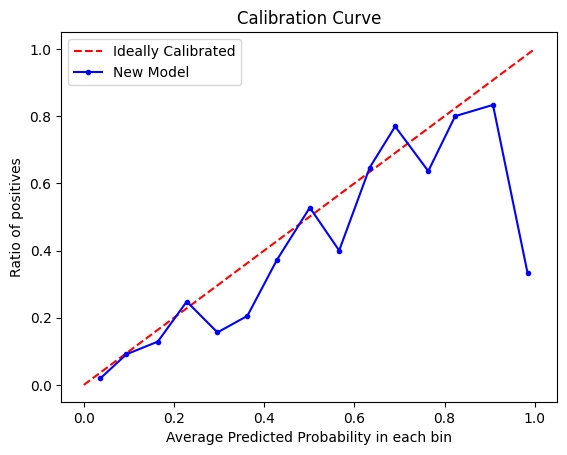

In [1079]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Calibration curve
x_c4, y_c4 = calibration_curve(y_test4, y_pred4[:, 1], n_bins=15, pos_label=1)

plt.plot([0, 1], [0, 1], 'r--', label='Ideally Calibrated')
plt.plot(y_c4, x_c4, marker='.', color='b', label='New Model')

plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.legend(loc='upper left')
plt.title('Calibration Curve')
plt.show()


0.802637226089409


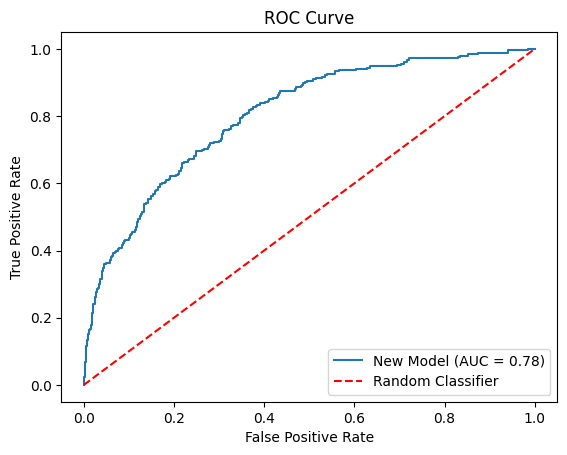

In [1080]:
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr4, tpr4, thresholds4 = roc_curve(y_test4, y_pred4[:, 1])
roc_auc4 = auc(fpr4, tpr4)
print(roc_auc4)

plt.plot(fpr4, tpr4, label=f'New Model (AUC = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve')
plt.show()

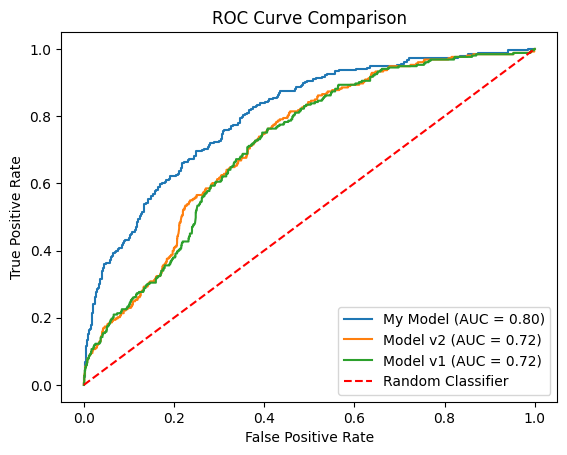

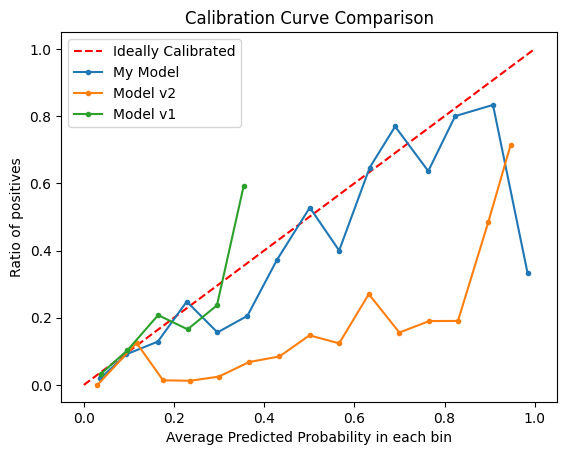

In [1081]:
# Add ROC for Model v1 and v2
plt.plot(fpr4, tpr4, label=f'My Model (AUC = {roc_auc4:.2f})')
plt.plot(fpr2, tpr2, label=f'Model v2 (AUC = {roc_auc2:.2f})')
plt.plot(fpr1, tpr1, label=f'Model v1 (AUC = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curve Comparison')
plt.show()

# Add calibration for Model v1 and v2
plt.plot([0, 1], [0, 1], 'r--', label='Ideally Calibrated')
plt.plot(y_c, x_c, marker='.', label='My Model')
plt.plot(y_c2, x_c2, marker='.', label='Model v2')
plt.plot(y_c1, x_c1, marker='.', label='Model v1')

plt.xlabel('Average Predicted Probability in each bin')
plt.ylabel('Ratio of positives')
plt.legend(loc='upper left')
plt.title('Calibration Curve Comparison')
plt.show()

**Objective**: The ROC curve assesses the discriminative ability of a model by plotting the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The Area Under the Curve (AUC) quantifies the overall performance, with a value of 1 indicating perfect discrimination.

**My Model** (AUC = 0.80): The blue ROC curve highlights that "My Model" outperforms both Model v1 and Model v2 significantly, achieving a higher AUC of 0.80. This indicates stronger discriminative power for identifying whether a shot results in a goal.

**Model v1 and Model v2** (AUC = 0.72): Both previous models perform similarly, with an AUC of 0.72. They show lower True Positive Rates at almost all False Positive Rates compared to "My Model," demonstrating inferior performance.

#### **4. Use SHAP Beeswarm plot to get insight about feature importance of your model. Give an explanation about the feature importance results, and its correlation with the model's output. (2 points)**

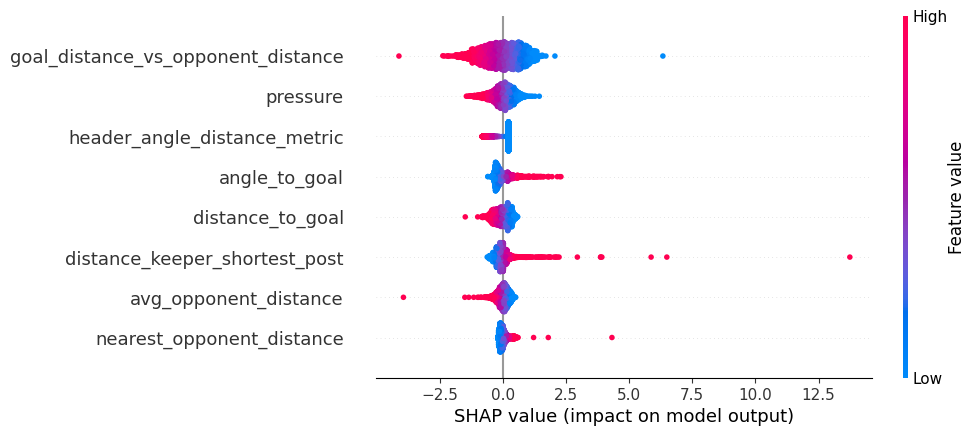

In [1082]:
import shap

shap.initjs()
explainer = shap.Explainer(clf4, X_train4)
shap_values = explainer(X_test4)
shap.plots.beeswarm(shap_values, max_display=50)

In [1083]:
# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame({
    'Feature': X_train4.columns,
    'Mean SHAP Value': np.mean(np.abs(shap_values.values), axis=0)
})

feature_importance = feature_importance.sort_values(by='Mean SHAP Value', ascending=False, key=lambda x: abs(x), ignore_index=True)

best_features = feature_importance
worst_features = feature_importance

print(best_features)

                              Feature  Mean SHAP Value
0  goal_distance_vs_opponent_distance         0.624527
1                            pressure         0.315467
2        header_angle_distance_metric         0.309214
3                       angle_to_goal         0.255474
4                    distance_to_goal         0.243079
5       distance_keeper_shortest_post         0.205599
6               avg_opponent_distance         0.165038
7           nearest_opponent_distance         0.113033


**Goal Distance vs. Opponent Distance** (Mean SHAP Value: 0.625):

The most impactful feature in the model. A higher value (blue points) indicates that the shooter is closer to the goal compared to the nearest defender, significantly increasing the probability of a goal. This aligns with the logic that space between the shooter and defenders provides better scoring opportunities.

**Pressure** (Mean SHAP Value: 0.315):
High pressure from defenders (red points) reduces the likelihood of a goal by limiting the shooter's time and options. Low-pressure scenarios (blue points) are favorable for scoring, reflecting the defensive influence on goal outcomes.

**Header Angle Distance Metric** (Mean SHAP Value: 0.309):
Measures the angle and distance of a header attempt relative to the posts. Shots with smaller angles and shorter distances (blue points) correlate with higher goal probabilities, as they are harder for the goalkeeper to save. Headers with wider angles or longer distances (red points) are less likely to succeed.

**Angle to Goal** (Mean SHAP Value: 0.255):
Narrower shooting angles (red points) negatively affect goal probability, while wider angles (blue points) increase the likelihood of scoring. This is expected, as wider angles provide a greater visible area of the goal.

**Distance to Goal** (Mean SHAP Value: 0.243):
A key determinant of xG. Closer distances (blue points) predict higher goal probabilities, aligning with the intuition that shots closer to the goal are more likely to be successful.

**Distance Keeper Shortest Post** (Mean SHAP Value: 0.206):
Shots targeting the goalkeeper's shortest post (blue points) positively correlate with goal probability. Such shots are harder for the keeper to save due to limited reaction time.

**Average Opponent Distance** (Mean SHAP Value: 0.165):
Indicates the average proximity of opponents to the shooter. Greater average distances (blue points) signify less defensive pressure, correlating with a higher likelihood of scoring.

**Nearest Opponent Distance** (Mean SHAP Value: 0.113):
Proximity of the nearest defender to the shooter plays a smaller but meaningful role. Close defenders (red points) decrease scoring chances by obstructing the shooter, while distant defenders (blue points) improve them.

## SIMULATION

In [1084]:
#This simulation has been used to find the best metrics

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import random
from itertools import combinations


# Set a fixed random seed for reproducibility
random.seed(42)

# List of all available metrics (columns from df_shots)
all_metrics = ['num_opponents',
       'opponents_close_3m', 'opponents_close_5m', 'teammates_close_3m',
       'teammates_close_5m', 'nearest_opponent_distance',
       'nearest_opponents_in_radius_sum', 'distance_to_keeper',
       'distance_keeper_goal', 'distance_to_halfway', 'avg_opponent_distance',
       'avg_teammate_distance', 'pressure',
       'ratio_shooter_goal__to_keeper_goal',
       'ratio_shooter_keeper__to_keeper_goal', 'teammate_opponent_dif',
       'angle_distance', 'goalkeeper_to_goal_ratio',
       'goalkeeper_to_halfway_ratio', 'teammate_to_opponent_ratio',
       'distance_difference_goal_keeper',
       'avg_teammate_opponent_distance_diff',
       'goal_distance_vs_opponent_distance',
       'combined_distance_to_goal_keeper', 'angle*distance_to_goal',
       'goalkeeper_influence', 'distance_keeper_shortest_post',
       'opponents_in_shooting_angle', 'inside_penalty_area',
       'cone_angle_metric', 'header_angle_distance_metric']

# Number of simulations to run
num_simulations = 10000

# Fixed metrics
fixed_metrics = ['distance_to_goal', 'angle_to_goal']

# Store results
results = []

for i in range(num_simulations):
    print(f"Simulation {i+1}/{num_simulations}")

    # Randomly select 5 additional metrics
    random_metrics = random.sample(all_metrics, 5)
    selected_metrics = random_metrics + fixed_metrics

    # Define X and y
    X = df_shots[selected_metrics]
    y = df_shots['is_goal']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

    # Train logistic regression model
    # clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)
    clf = LogisticRegression(random_state=0, class_weight={1:1.3, 0:1}).fit(X_train, y_train)

    # Predict probabilities
    y_pred = clf.predict_proba(X_test)

    # Calculate ROC AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
    roc_auc = auc(fpr, tpr)

    # Store the result
    results.append({'metrics': selected_metrics, 'roc_auc': roc_auc})

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Sort by ROC AUC in descending order
results_df = results_df.sort_values(by='roc_auc', ascending=False).reset_index(drop=True)


# Display the top results
print(results_df.head(20))

Simulation 1/10000
Simulation 2/10000
Simulation 3/10000
Simulation 4/10000
Simulation 5/10000
Simulation 6/10000
Simulation 7/10000
Simulation 8/10000
Simulation 9/10000
Simulation 10/10000
Simulation 11/10000
Simulation 12/10000
Simulation 13/10000
Simulation 14/10000
Simulation 15/10000
Simulation 16/10000
Simulation 17/10000
Simulation 18/10000
Simulation 19/10000
Simulation 20/10000
Simulation 21/10000
Simulation 22/10000
Simulation 23/10000
Simulation 24/10000
Simulation 25/10000
Simulation 26/10000
Simulation 27/10000
Simulation 28/10000
Simulation 29/10000
Simulation 30/10000
Simulation 31/10000
Simulation 32/10000
Simulation 33/10000
Simulation 34/10000
Simulation 35/10000
Simulation 36/10000
Simulation 37/10000
Simulation 38/10000
Simulation 39/10000
Simulation 40/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 41/10000
Simulation 42/10000
Simulation 43/10000
Simulation 44/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 45/10000
Simulation 46/10000
Simulation 47/10000
Simulation 48/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 49/10000
Simulation 50/10000
Simulation 51/10000
Simulation 52/10000
Simulation 53/10000
Simulation 54/10000
Simulation 55/10000
Simulation 56/10000
Simulation 57/10000
Simulation 58/10000
Simulation 59/10000
Simulation 60/10000
Simulation 61/10000
Simulation 62/10000
Simulation 63/10000
Simulation 64/10000
Simulation 65/10000
Simulation 66/10000
Simulation 67/10000
Simulation 68/10000
Simulation 69/10000
Simulation 70/10000
Simulation 71/10000
Simulation 72/10000
Simulation 73/10000
Simulation 74/10000
Simulation 75/10000
Simulation 76/10000
Simulation 77/10000
Simulation 78/10000
Simulation 79/10000
Simulation 80/10000
Simulation 81/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 82/10000
Simulation 83/10000
Simulation 84/10000
Simulation 85/10000
Simulation 86/10000
Simulation 87/10000
Simulation 88/10000
Simulation 89/10000
Simulation 90/10000
Simulation 91/10000
Simulation 92/10000
Simulation 93/10000
Simulation 94/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 95/10000
Simulation 96/10000
Simulation 97/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 98/10000
Simulation 99/10000
Simulation 100/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 101/10000
Simulation 102/10000
Simulation 103/10000
Simulation 104/10000
Simulation 105/10000
Simulation 106/10000
Simulation 107/10000
Simulation 108/10000
Simulation 109/10000
Simulation 110/10000
Simulation 111/10000
Simulation 112/10000
Simulation 113/10000
Simulation 114/10000
Simulation 115/10000
Simulation 116/10000
Simulation 117/10000
Simulation 118/10000
Simulation 119/10000
Simulation 120/10000
Simulation 121/10000
Simulation 122/10000
Simulation 123/10000
Simulation 124/10000
Simulation 125/10000
Simulation 126/10000
Simulation 127/10000
Simulation 128/10000
Simulation 129/10000
Simulation 130/10000
Simulation 131/10000
Simulation 132/10000
Simulation 133/10000
Simulation 134/10000
Simulation 135/10000
Simulation 136/10000
Simulation 137/10000
Simulation 138/10000
Simulation 139/10000
Simulation 140/10000
Simulation 141/10000
Simulation 142/10000
Simulation 143/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 144/10000
Simulation 145/10000
Simulation 146/10000
Simulation 147/10000
Simulation 148/10000
Simulation 149/10000
Simulation 150/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 151/10000
Simulation 152/10000
Simulation 153/10000
Simulation 154/10000
Simulation 155/10000
Simulation 156/10000
Simulation 157/10000
Simulation 158/10000
Simulation 159/10000
Simulation 160/10000
Simulation 161/10000
Simulation 162/10000
Simulation 163/10000
Simulation 164/10000
Simulation 165/10000
Simulation 166/10000
Simulation 167/10000
Simulation 168/10000
Simulation 169/10000
Simulation 170/10000
Simulation 171/10000
Simulation 172/10000
Simulation 173/10000
Simulation 174/10000
Simulation 175/10000
Simulation 176/10000
Simulation 177/10000
Simulation 178/10000
Simulation 179/10000
Simulation 180/10000
Simulation 181/10000
Simulation 182/10000
Simulation 183/10000
Simulation 184/10000
Simulation 185/10000
Simulation 186/10000
Simulation 187/10000
Simulation 188/10000
Simulation 189/10000
Simulation 190/10000
Simulation 191/10000
Simulation 192/10000
Simulation 193/10000
Simulation 194/10000
Simulation 195/10000
Simulation 196/10000
Simulation 197/10000
Simulation 19

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 200/10000
Simulation 201/10000
Simulation 202/10000
Simulation 203/10000
Simulation 204/10000
Simulation 205/10000
Simulation 206/10000
Simulation 207/10000
Simulation 208/10000
Simulation 209/10000
Simulation 210/10000
Simulation 211/10000
Simulation 212/10000
Simulation 213/10000
Simulation 214/10000
Simulation 215/10000
Simulation 216/10000
Simulation 217/10000
Simulation 218/10000
Simulation 219/10000
Simulation 220/10000
Simulation 221/10000
Simulation 222/10000
Simulation 223/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 224/10000
Simulation 225/10000
Simulation 226/10000
Simulation 227/10000
Simulation 228/10000
Simulation 229/10000
Simulation 230/10000
Simulation 231/10000
Simulation 232/10000
Simulation 233/10000
Simulation 234/10000
Simulation 235/10000
Simulation 236/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 237/10000
Simulation 238/10000
Simulation 239/10000
Simulation 240/10000
Simulation 241/10000
Simulation 242/10000
Simulation 243/10000
Simulation 244/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 245/10000
Simulation 246/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 247/10000
Simulation 248/10000
Simulation 249/10000
Simulation 250/10000
Simulation 251/10000
Simulation 252/10000
Simulation 253/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 254/10000
Simulation 255/10000
Simulation 256/10000
Simulation 257/10000
Simulation 258/10000
Simulation 259/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 260/10000
Simulation 261/10000
Simulation 262/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 263/10000
Simulation 264/10000
Simulation 265/10000
Simulation 266/10000
Simulation 267/10000
Simulation 268/10000
Simulation 269/10000
Simulation 270/10000
Simulation 271/10000
Simulation 272/10000
Simulation 273/10000
Simulation 274/10000
Simulation 275/10000
Simulation 276/10000
Simulation 277/10000
Simulation 278/10000
Simulation 279/10000
Simulation 280/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 281/10000
Simulation 282/10000
Simulation 283/10000
Simulation 284/10000
Simulation 285/10000
Simulation 286/10000
Simulation 287/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 288/10000
Simulation 289/10000
Simulation 290/10000
Simulation 291/10000
Simulation 292/10000
Simulation 293/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 294/10000
Simulation 295/10000
Simulation 296/10000
Simulation 297/10000
Simulation 298/10000
Simulation 299/10000
Simulation 300/10000
Simulation 301/10000
Simulation 302/10000
Simulation 303/10000
Simulation 304/10000
Simulation 305/10000
Simulation 306/10000
Simulation 307/10000
Simulation 308/10000
Simulation 309/10000
Simulation 310/10000
Simulation 311/10000
Simulation 312/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 313/10000
Simulation 314/10000
Simulation 315/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 316/10000
Simulation 317/10000
Simulation 318/10000
Simulation 319/10000
Simulation 320/10000
Simulation 321/10000
Simulation 322/10000
Simulation 323/10000
Simulation 324/10000
Simulation 325/10000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Simulation 326/10000
Simulation 327/10000
Simulation 328/10000
Simulation 329/10000
Simulation 330/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 331/10000
Simulation 332/10000
Simulation 333/10000
Simulation 334/10000
Simulation 335/10000
Simulation 336/10000
Simulation 337/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 338/10000
Simulation 339/10000
Simulation 340/10000
Simulation 341/10000
Simulation 342/10000
Simulation 343/10000
Simulation 344/10000
Simulation 345/10000
Simulation 346/10000
Simulation 347/10000
Simulation 348/10000
Simulation 349/10000
Simulation 350/10000
Simulation 351/10000
Simulation 352/10000
Simulation 353/10000
Simulation 354/10000
Simulation 355/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 356/10000
Simulation 357/10000
Simulation 358/10000
Simulation 359/10000
Simulation 360/10000
Simulation 361/10000
Simulation 362/10000
Simulation 363/10000
Simulation 364/10000
Simulation 365/10000
Simulation 366/10000
Simulation 367/10000
Simulation 368/10000
Simulation 369/10000
Simulation 370/10000
Simulation 371/10000
Simulation 372/10000
Simulation 373/10000
Simulation 374/10000
Simulation 375/10000
Simulation 376/10000
Simulation 377/10000
Simulation 378/10000
Simulation 379/10000
Simulation 380/10000
Simulation 381/10000
Simulation 382/10000
Simulation 383/10000
Simulation 384/10000
Simulation 385/10000
Simulation 386/10000
Simulation 387/10000
Simulation 388/10000
Simulation 389/10000
Simulation 390/10000
Simulation 391/10000
Simulation 392/10000
Simulation 393/10000
Simulation 394/10000
Simulation 395/10000
Simulation 396/10000
Simulation 397/10000
Simulation 398/10000
Simulation 399/10000
Simulation 400/10000
Simulation 401/10000
Simulation 402/10000
Simulation 40

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 404/10000
Simulation 405/10000
Simulation 406/10000
Simulation 407/10000
Simulation 408/10000
Simulation 409/10000
Simulation 410/10000
Simulation 411/10000
Simulation 412/10000
Simulation 413/10000
Simulation 414/10000
Simulation 415/10000
Simulation 416/10000
Simulation 417/10000
Simulation 418/10000
Simulation 419/10000
Simulation 420/10000
Simulation 421/10000
Simulation 422/10000
Simulation 423/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 424/10000
Simulation 425/10000
Simulation 426/10000
Simulation 427/10000
Simulation 428/10000
Simulation 429/10000
Simulation 430/10000
Simulation 431/10000
Simulation 432/10000
Simulation 433/10000
Simulation 434/10000
Simulation 435/10000
Simulation 436/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 437/10000
Simulation 438/10000
Simulation 439/10000
Simulation 440/10000
Simulation 441/10000
Simulation 442/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 443/10000
Simulation 444/10000
Simulation 445/10000
Simulation 446/10000
Simulation 447/10000
Simulation 448/10000
Simulation 449/10000
Simulation 450/10000
Simulation 451/10000
Simulation 452/10000
Simulation 453/10000
Simulation 454/10000
Simulation 455/10000
Simulation 456/10000
Simulation 457/10000
Simulation 458/10000
Simulation 459/10000
Simulation 460/10000
Simulation 461/10000
Simulation 462/10000
Simulation 463/10000
Simulation 464/10000
Simulation 465/10000
Simulation 466/10000
Simulation 467/10000
Simulation 468/10000
Simulation 469/10000
Simulation 470/10000
Simulation 471/10000
Simulation 472/10000
Simulation 473/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 474/10000
Simulation 475/10000
Simulation 476/10000
Simulation 477/10000
Simulation 478/10000
Simulation 479/10000
Simulation 480/10000
Simulation 481/10000
Simulation 482/10000
Simulation 483/10000
Simulation 484/10000
Simulation 485/10000
Simulation 486/10000
Simulation 487/10000
Simulation 488/10000
Simulation 489/10000
Simulation 490/10000
Simulation 491/10000
Simulation 492/10000
Simulation 493/10000
Simulation 494/10000
Simulation 495/10000
Simulation 496/10000
Simulation 497/10000
Simulation 498/10000
Simulation 499/10000
Simulation 500/10000
Simulation 501/10000
Simulation 502/10000
Simulation 503/10000
Simulation 504/10000
Simulation 505/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 506/10000
Simulation 507/10000
Simulation 508/10000
Simulation 509/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 510/10000
Simulation 511/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 512/10000
Simulation 513/10000
Simulation 514/10000
Simulation 515/10000
Simulation 516/10000
Simulation 517/10000
Simulation 518/10000
Simulation 519/10000
Simulation 520/10000
Simulation 521/10000
Simulation 522/10000
Simulation 523/10000
Simulation 524/10000
Simulation 525/10000
Simulation 526/10000
Simulation 527/10000
Simulation 528/10000
Simulation 529/10000
Simulation 530/10000
Simulation 531/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 532/10000
Simulation 533/10000
Simulation 534/10000
Simulation 535/10000
Simulation 536/10000
Simulation 537/10000
Simulation 538/10000
Simulation 539/10000
Simulation 540/10000
Simulation 541/10000
Simulation 542/10000
Simulation 543/10000
Simulation 544/10000
Simulation 545/10000
Simulation 546/10000
Simulation 547/10000
Simulation 548/10000
Simulation 549/10000
Simulation 550/10000
Simulation 551/10000
Simulation 552/10000
Simulation 553/10000
Simulation 554/10000
Simulation 555/10000
Simulation 556/10000
Simulation 557/10000
Simulation 558/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 559/10000
Simulation 560/10000
Simulation 561/10000
Simulation 562/10000
Simulation 563/10000
Simulation 564/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 565/10000
Simulation 566/10000
Simulation 567/10000
Simulation 568/10000
Simulation 569/10000
Simulation 570/10000
Simulation 571/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 572/10000
Simulation 573/10000
Simulation 574/10000
Simulation 575/10000
Simulation 576/10000
Simulation 577/10000
Simulation 578/10000
Simulation 579/10000
Simulation 580/10000
Simulation 581/10000
Simulation 582/10000
Simulation 583/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 584/10000
Simulation 585/10000
Simulation 586/10000
Simulation 587/10000
Simulation 588/10000
Simulation 589/10000
Simulation 590/10000
Simulation 591/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 592/10000
Simulation 593/10000
Simulation 594/10000
Simulation 595/10000
Simulation 596/10000
Simulation 597/10000
Simulation 598/10000
Simulation 599/10000
Simulation 600/10000
Simulation 601/10000
Simulation 602/10000
Simulation 603/10000
Simulation 604/10000
Simulation 605/10000
Simulation 606/10000
Simulation 607/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 608/10000
Simulation 609/10000
Simulation 610/10000
Simulation 611/10000
Simulation 612/10000
Simulation 613/10000
Simulation 614/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 615/10000
Simulation 616/10000
Simulation 617/10000
Simulation 618/10000
Simulation 619/10000
Simulation 620/10000
Simulation 621/10000
Simulation 622/10000
Simulation 623/10000
Simulation 624/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 625/10000
Simulation 626/10000
Simulation 627/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 628/10000
Simulation 629/10000
Simulation 630/10000
Simulation 631/10000
Simulation 632/10000
Simulation 633/10000
Simulation 634/10000
Simulation 635/10000
Simulation 636/10000
Simulation 637/10000
Simulation 638/10000
Simulation 639/10000
Simulation 640/10000
Simulation 641/10000
Simulation 642/10000
Simulation 643/10000
Simulation 644/10000
Simulation 645/10000
Simulation 646/10000
Simulation 647/10000
Simulation 648/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 649/10000
Simulation 650/10000
Simulation 651/10000
Simulation 652/10000
Simulation 653/10000
Simulation 654/10000
Simulation 655/10000
Simulation 656/10000
Simulation 657/10000
Simulation 658/10000
Simulation 659/10000
Simulation 660/10000
Simulation 661/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 662/10000
Simulation 663/10000
Simulation 664/10000
Simulation 665/10000
Simulation 666/10000
Simulation 667/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 668/10000
Simulation 669/10000
Simulation 670/10000
Simulation 671/10000
Simulation 672/10000
Simulation 673/10000
Simulation 674/10000
Simulation 675/10000
Simulation 676/10000
Simulation 677/10000
Simulation 678/10000
Simulation 679/10000
Simulation 680/10000
Simulation 681/10000
Simulation 682/10000
Simulation 683/10000
Simulation 684/10000
Simulation 685/10000
Simulation 686/10000
Simulation 687/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 688/10000
Simulation 689/10000
Simulation 690/10000
Simulation 691/10000
Simulation 692/10000
Simulation 693/10000
Simulation 694/10000
Simulation 695/10000
Simulation 696/10000
Simulation 697/10000
Simulation 698/10000
Simulation 699/10000
Simulation 700/10000
Simulation 701/10000
Simulation 702/10000
Simulation 703/10000
Simulation 704/10000
Simulation 705/10000
Simulation 706/10000
Simulation 707/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 708/10000
Simulation 709/10000
Simulation 710/10000
Simulation 711/10000
Simulation 712/10000
Simulation 713/10000
Simulation 714/10000
Simulation 715/10000
Simulation 716/10000
Simulation 717/10000
Simulation 718/10000
Simulation 719/10000
Simulation 720/10000
Simulation 721/10000
Simulation 722/10000
Simulation 723/10000
Simulation 724/10000
Simulation 725/10000
Simulation 726/10000
Simulation 727/10000
Simulation 728/10000
Simulation 729/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 730/10000
Simulation 731/10000
Simulation 732/10000
Simulation 733/10000
Simulation 734/10000
Simulation 735/10000
Simulation 736/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 737/10000
Simulation 738/10000
Simulation 739/10000
Simulation 740/10000
Simulation 741/10000
Simulation 742/10000
Simulation 743/10000
Simulation 744/10000
Simulation 745/10000
Simulation 746/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 747/10000
Simulation 748/10000
Simulation 749/10000
Simulation 750/10000
Simulation 751/10000
Simulation 752/10000
Simulation 753/10000
Simulation 754/10000
Simulation 755/10000
Simulation 756/10000
Simulation 757/10000
Simulation 758/10000
Simulation 759/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 760/10000
Simulation 761/10000
Simulation 762/10000
Simulation 763/10000
Simulation 764/10000
Simulation 765/10000
Simulation 766/10000
Simulation 767/10000
Simulation 768/10000
Simulation 769/10000
Simulation 770/10000
Simulation 771/10000
Simulation 772/10000
Simulation 773/10000
Simulation 774/10000
Simulation 775/10000
Simulation 776/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 777/10000
Simulation 778/10000
Simulation 779/10000
Simulation 780/10000
Simulation 781/10000
Simulation 782/10000
Simulation 783/10000
Simulation 784/10000
Simulation 785/10000
Simulation 786/10000
Simulation 787/10000
Simulation 788/10000
Simulation 789/10000
Simulation 790/10000
Simulation 791/10000
Simulation 792/10000
Simulation 793/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 794/10000
Simulation 795/10000
Simulation 796/10000
Simulation 797/10000
Simulation 798/10000
Simulation 799/10000
Simulation 800/10000
Simulation 801/10000
Simulation 802/10000
Simulation 803/10000
Simulation 804/10000
Simulation 805/10000
Simulation 806/10000
Simulation 807/10000
Simulation 808/10000
Simulation 809/10000
Simulation 810/10000
Simulation 811/10000
Simulation 812/10000
Simulation 813/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 814/10000
Simulation 815/10000
Simulation 816/10000
Simulation 817/10000
Simulation 818/10000
Simulation 819/10000
Simulation 820/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 821/10000
Simulation 822/10000
Simulation 823/10000
Simulation 824/10000
Simulation 825/10000
Simulation 826/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 827/10000
Simulation 828/10000
Simulation 829/10000
Simulation 830/10000
Simulation 831/10000
Simulation 832/10000
Simulation 833/10000
Simulation 834/10000
Simulation 835/10000
Simulation 836/10000
Simulation 837/10000
Simulation 838/10000
Simulation 839/10000
Simulation 840/10000
Simulation 841/10000
Simulation 842/10000
Simulation 843/10000
Simulation 844/10000
Simulation 845/10000
Simulation 846/10000
Simulation 847/10000
Simulation 848/10000
Simulation 849/10000
Simulation 850/10000
Simulation 851/10000
Simulation 852/10000
Simulation 853/10000
Simulation 854/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 855/10000
Simulation 856/10000
Simulation 857/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 858/10000
Simulation 859/10000
Simulation 860/10000
Simulation 861/10000
Simulation 862/10000
Simulation 863/10000
Simulation 864/10000
Simulation 865/10000
Simulation 866/10000
Simulation 867/10000
Simulation 868/10000
Simulation 869/10000
Simulation 870/10000
Simulation 871/10000
Simulation 872/10000
Simulation 873/10000
Simulation 874/10000
Simulation 875/10000
Simulation 876/10000
Simulation 877/10000
Simulation 878/10000
Simulation 879/10000
Simulation 880/10000
Simulation 881/10000
Simulation 882/10000
Simulation 883/10000
Simulation 884/10000
Simulation 885/10000
Simulation 886/10000
Simulation 887/10000
Simulation 888/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 889/10000
Simulation 890/10000
Simulation 891/10000
Simulation 892/10000
Simulation 893/10000
Simulation 894/10000
Simulation 895/10000
Simulation 896/10000
Simulation 897/10000
Simulation 898/10000
Simulation 899/10000
Simulation 900/10000
Simulation 901/10000
Simulation 902/10000
Simulation 903/10000
Simulation 904/10000
Simulation 905/10000
Simulation 906/10000
Simulation 907/10000
Simulation 908/10000
Simulation 909/10000
Simulation 910/10000
Simulation 911/10000
Simulation 912/10000
Simulation 913/10000
Simulation 914/10000
Simulation 915/10000
Simulation 916/10000
Simulation 917/10000
Simulation 918/10000
Simulation 919/10000
Simulation 920/10000
Simulation 921/10000
Simulation 922/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 923/10000
Simulation 924/10000
Simulation 925/10000
Simulation 926/10000
Simulation 927/10000
Simulation 928/10000
Simulation 929/10000
Simulation 930/10000
Simulation 931/10000
Simulation 932/10000
Simulation 933/10000
Simulation 934/10000
Simulation 935/10000
Simulation 936/10000
Simulation 937/10000
Simulation 938/10000
Simulation 939/10000
Simulation 940/10000
Simulation 941/10000
Simulation 942/10000
Simulation 943/10000
Simulation 944/10000
Simulation 945/10000
Simulation 946/10000
Simulation 947/10000
Simulation 948/10000
Simulation 949/10000
Simulation 950/10000
Simulation 951/10000
Simulation 952/10000
Simulation 953/10000
Simulation 954/10000
Simulation 955/10000
Simulation 956/10000
Simulation 957/10000
Simulation 958/10000
Simulation 959/10000
Simulation 960/10000
Simulation 961/10000
Simulation 962/10000
Simulation 963/10000
Simulation 964/10000
Simulation 965/10000
Simulation 966/10000
Simulation 967/10000
Simulation 968/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 969/10000
Simulation 970/10000
Simulation 971/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 972/10000
Simulation 973/10000
Simulation 974/10000
Simulation 975/10000
Simulation 976/10000
Simulation 977/10000
Simulation 978/10000
Simulation 979/10000
Simulation 980/10000
Simulation 981/10000
Simulation 982/10000
Simulation 983/10000
Simulation 984/10000
Simulation 985/10000
Simulation 986/10000
Simulation 987/10000
Simulation 988/10000
Simulation 989/10000
Simulation 990/10000
Simulation 991/10000
Simulation 992/10000
Simulation 993/10000
Simulation 994/10000
Simulation 995/10000
Simulation 996/10000
Simulation 997/10000
Simulation 998/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 999/10000
Simulation 1000/10000
Simulation 1001/10000
Simulation 1002/10000
Simulation 1003/10000
Simulation 1004/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1005/10000
Simulation 1006/10000
Simulation 1007/10000
Simulation 1008/10000
Simulation 1009/10000
Simulation 1010/10000
Simulation 1011/10000
Simulation 1012/10000
Simulation 1013/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1014/10000
Simulation 1015/10000
Simulation 1016/10000
Simulation 1017/10000
Simulation 1018/10000
Simulation 1019/10000
Simulation 1020/10000
Simulation 1021/10000
Simulation 1022/10000
Simulation 1023/10000
Simulation 1024/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1025/10000
Simulation 1026/10000
Simulation 1027/10000
Simulation 1028/10000
Simulation 1029/10000
Simulation 1030/10000
Simulation 1031/10000
Simulation 1032/10000
Simulation 1033/10000
Simulation 1034/10000
Simulation 1035/10000
Simulation 1036/10000
Simulation 1037/10000
Simulation 1038/10000
Simulation 1039/10000
Simulation 1040/10000
Simulation 1041/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1042/10000
Simulation 1043/10000
Simulation 1044/10000
Simulation 1045/10000
Simulation 1046/10000
Simulation 1047/10000
Simulation 1048/10000
Simulation 1049/10000
Simulation 1050/10000
Simulation 1051/10000
Simulation 1052/10000
Simulation 1053/10000
Simulation 1054/10000
Simulation 1055/10000
Simulation 1056/10000
Simulation 1057/10000
Simulation 1058/10000
Simulation 1059/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1060/10000
Simulation 1061/10000
Simulation 1062/10000
Simulation 1063/10000
Simulation 1064/10000
Simulation 1065/10000
Simulation 1066/10000
Simulation 1067/10000
Simulation 1068/10000
Simulation 1069/10000
Simulation 1070/10000
Simulation 1071/10000
Simulation 1072/10000
Simulation 1073/10000
Simulation 1074/10000
Simulation 1075/10000
Simulation 1076/10000
Simulation 1077/10000
Simulation 1078/10000
Simulation 1079/10000
Simulation 1080/10000
Simulation 1081/10000
Simulation 1082/10000
Simulation 1083/10000
Simulation 1084/10000
Simulation 1085/10000
Simulation 1086/10000
Simulation 1087/10000
Simulation 1088/10000
Simulation 1089/10000
Simulation 1090/10000
Simulation 1091/10000
Simulation 1092/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1093/10000
Simulation 1094/10000
Simulation 1095/10000
Simulation 1096/10000
Simulation 1097/10000
Simulation 1098/10000
Simulation 1099/10000
Simulation 1100/10000
Simulation 1101/10000
Simulation 1102/10000
Simulation 1103/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1104/10000
Simulation 1105/10000
Simulation 1106/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1107/10000
Simulation 1108/10000
Simulation 1109/10000
Simulation 1110/10000
Simulation 1111/10000
Simulation 1112/10000
Simulation 1113/10000
Simulation 1114/10000
Simulation 1115/10000
Simulation 1116/10000
Simulation 1117/10000
Simulation 1118/10000
Simulation 1119/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1120/10000
Simulation 1121/10000
Simulation 1122/10000
Simulation 1123/10000
Simulation 1124/10000
Simulation 1125/10000
Simulation 1126/10000
Simulation 1127/10000
Simulation 1128/10000
Simulation 1129/10000
Simulation 1130/10000
Simulation 1131/10000
Simulation 1132/10000
Simulation 1133/10000
Simulation 1134/10000
Simulation 1135/10000
Simulation 1136/10000
Simulation 1137/10000
Simulation 1138/10000
Simulation 1139/10000
Simulation 1140/10000
Simulation 1141/10000
Simulation 1142/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1143/10000
Simulation 1144/10000
Simulation 1145/10000
Simulation 1146/10000
Simulation 1147/10000
Simulation 1148/10000
Simulation 1149/10000
Simulation 1150/10000
Simulation 1151/10000
Simulation 1152/10000
Simulation 1153/10000
Simulation 1154/10000
Simulation 1155/10000
Simulation 1156/10000
Simulation 1157/10000
Simulation 1158/10000
Simulation 1159/10000
Simulation 1160/10000
Simulation 1161/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1162/10000
Simulation 1163/10000
Simulation 1164/10000
Simulation 1165/10000
Simulation 1166/10000
Simulation 1167/10000
Simulation 1168/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1169/10000
Simulation 1170/10000
Simulation 1171/10000
Simulation 1172/10000
Simulation 1173/10000
Simulation 1174/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1175/10000
Simulation 1176/10000
Simulation 1177/10000
Simulation 1178/10000
Simulation 1179/10000
Simulation 1180/10000
Simulation 1181/10000
Simulation 1182/10000
Simulation 1183/10000
Simulation 1184/10000
Simulation 1185/10000
Simulation 1186/10000
Simulation 1187/10000
Simulation 1188/10000
Simulation 1189/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1190/10000
Simulation 1191/10000
Simulation 1192/10000
Simulation 1193/10000
Simulation 1194/10000
Simulation 1195/10000
Simulation 1196/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1197/10000
Simulation 1198/10000
Simulation 1199/10000
Simulation 1200/10000
Simulation 1201/10000
Simulation 1202/10000
Simulation 1203/10000
Simulation 1204/10000
Simulation 1205/10000
Simulation 1206/10000
Simulation 1207/10000
Simulation 1208/10000
Simulation 1209/10000
Simulation 1210/10000
Simulation 1211/10000
Simulation 1212/10000
Simulation 1213/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1214/10000
Simulation 1215/10000
Simulation 1216/10000
Simulation 1217/10000
Simulation 1218/10000
Simulation 1219/10000
Simulation 1220/10000
Simulation 1221/10000
Simulation 1222/10000
Simulation 1223/10000
Simulation 1224/10000
Simulation 1225/10000
Simulation 1226/10000
Simulation 1227/10000
Simulation 1228/10000
Simulation 1229/10000
Simulation 1230/10000
Simulation 1231/10000
Simulation 1232/10000
Simulation 1233/10000
Simulation 1234/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1235/10000
Simulation 1236/10000
Simulation 1237/10000
Simulation 1238/10000
Simulation 1239/10000
Simulation 1240/10000
Simulation 1241/10000
Simulation 1242/10000
Simulation 1243/10000
Simulation 1244/10000
Simulation 1245/10000
Simulation 1246/10000
Simulation 1247/10000
Simulation 1248/10000
Simulation 1249/10000
Simulation 1250/10000
Simulation 1251/10000
Simulation 1252/10000
Simulation 1253/10000
Simulation 1254/10000
Simulation 1255/10000
Simulation 1256/10000
Simulation 1257/10000
Simulation 1258/10000
Simulation 1259/10000
Simulation 1260/10000
Simulation 1261/10000
Simulation 1262/10000
Simulation 1263/10000
Simulation 1264/10000
Simulation 1265/10000
Simulation 1266/10000
Simulation 1267/10000
Simulation 1268/10000
Simulation 1269/10000
Simulation 1270/10000
Simulation 1271/10000
Simulation 1272/10000
Simulation 1273/10000
Simulation 1274/10000
Simulation 1275/10000
Simulation 1276/10000
Simulation 1277/10000
Simulation 1278/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1279/10000
Simulation 1280/10000
Simulation 1281/10000
Simulation 1282/10000
Simulation 1283/10000
Simulation 1284/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1285/10000
Simulation 1286/10000
Simulation 1287/10000
Simulation 1288/10000
Simulation 1289/10000
Simulation 1290/10000
Simulation 1291/10000
Simulation 1292/10000
Simulation 1293/10000
Simulation 1294/10000
Simulation 1295/10000
Simulation 1296/10000
Simulation 1297/10000
Simulation 1298/10000
Simulation 1299/10000
Simulation 1300/10000
Simulation 1301/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1302/10000
Simulation 1303/10000
Simulation 1304/10000
Simulation 1305/10000
Simulation 1306/10000
Simulation 1307/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1308/10000
Simulation 1309/10000
Simulation 1310/10000
Simulation 1311/10000
Simulation 1312/10000
Simulation 1313/10000
Simulation 1314/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1315/10000
Simulation 1316/10000
Simulation 1317/10000
Simulation 1318/10000
Simulation 1319/10000
Simulation 1320/10000
Simulation 1321/10000
Simulation 1322/10000
Simulation 1323/10000
Simulation 1324/10000
Simulation 1325/10000
Simulation 1326/10000
Simulation 1327/10000
Simulation 1328/10000
Simulation 1329/10000
Simulation 1330/10000
Simulation 1331/10000
Simulation 1332/10000
Simulation 1333/10000
Simulation 1334/10000
Simulation 1335/10000
Simulation 1336/10000
Simulation 1337/10000
Simulation 1338/10000
Simulation 1339/10000
Simulation 1340/10000
Simulation 1341/10000
Simulation 1342/10000
Simulation 1343/10000
Simulation 1344/10000
Simulation 1345/10000
Simulation 1346/10000
Simulation 1347/10000
Simulation 1348/10000
Simulation 1349/10000
Simulation 1350/10000
Simulation 1351/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1352/10000
Simulation 1353/10000
Simulation 1354/10000
Simulation 1355/10000
Simulation 1356/10000
Simulation 1357/10000
Simulation 1358/10000
Simulation 1359/10000
Simulation 1360/10000
Simulation 1361/10000
Simulation 1362/10000
Simulation 1363/10000
Simulation 1364/10000
Simulation 1365/10000
Simulation 1366/10000
Simulation 1367/10000
Simulation 1368/10000
Simulation 1369/10000
Simulation 1370/10000
Simulation 1371/10000
Simulation 1372/10000
Simulation 1373/10000
Simulation 1374/10000
Simulation 1375/10000
Simulation 1376/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1377/10000
Simulation 1378/10000
Simulation 1379/10000
Simulation 1380/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1381/10000
Simulation 1382/10000
Simulation 1383/10000
Simulation 1384/10000
Simulation 1385/10000
Simulation 1386/10000
Simulation 1387/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1388/10000
Simulation 1389/10000
Simulation 1390/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 1391/10000
Simulation 1392/10000
Simulation 1393/10000
Simulation 1394/10000
Simulation 1395/10000
Simulation 1396/10000
Simulation 1397/10000
Simulation 1398/10000
Simulation 1399/10000
Simulation 1400/10000
Simulation 1401/10000
Simulation 1402/10000
Simulation 1403/10000
Simulation 1404/10000
Simulation 1405/10000
Simulation 1406/10000
Simulation 1407/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1408/10000
Simulation 1409/10000
Simulation 1410/10000
Simulation 1411/10000
Simulation 1412/10000
Simulation 1413/10000
Simulation 1414/10000
Simulation 1415/10000
Simulation 1416/10000
Simulation 1417/10000
Simulation 1418/10000
Simulation 1419/10000
Simulation 1420/10000
Simulation 1421/10000
Simulation 1422/10000
Simulation 1423/10000
Simulation 1424/10000
Simulation 1425/10000
Simulation 1426/10000
Simulation 1427/10000
Simulation 1428/10000
Simulation 1429/10000
Simulation 1430/10000
Simulation 1431/10000
Simulation 1432/10000
Simulation 1433/10000
Simulation 1434/10000
Simulation 1435/10000
Simulation 1436/10000
Simulation 1437/10000
Simulation 1438/10000
Simulation 1439/10000
Simulation 1440/10000
Simulation 1441/10000
Simulation 1442/10000
Simulation 1443/10000
Simulation 1444/10000
Simulation 1445/10000
Simulation 1446/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1447/10000
Simulation 1448/10000
Simulation 1449/10000
Simulation 1450/10000
Simulation 1451/10000
Simulation 1452/10000
Simulation 1453/10000
Simulation 1454/10000
Simulation 1455/10000
Simulation 1456/10000
Simulation 1457/10000
Simulation 1458/10000
Simulation 1459/10000
Simulation 1460/10000
Simulation 1461/10000
Simulation 1462/10000
Simulation 1463/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1464/10000
Simulation 1465/10000
Simulation 1466/10000
Simulation 1467/10000
Simulation 1468/10000
Simulation 1469/10000
Simulation 1470/10000
Simulation 1471/10000
Simulation 1472/10000
Simulation 1473/10000
Simulation 1474/10000
Simulation 1475/10000
Simulation 1476/10000
Simulation 1477/10000
Simulation 1478/10000
Simulation 1479/10000
Simulation 1480/10000
Simulation 1481/10000
Simulation 1482/10000
Simulation 1483/10000
Simulation 1484/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1485/10000
Simulation 1486/10000
Simulation 1487/10000
Simulation 1488/10000
Simulation 1489/10000
Simulation 1490/10000
Simulation 1491/10000
Simulation 1492/10000
Simulation 1493/10000
Simulation 1494/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1495/10000
Simulation 1496/10000
Simulation 1497/10000
Simulation 1498/10000
Simulation 1499/10000
Simulation 1500/10000
Simulation 1501/10000
Simulation 1502/10000
Simulation 1503/10000
Simulation 1504/10000
Simulation 1505/10000
Simulation 1506/10000
Simulation 1507/10000
Simulation 1508/10000
Simulation 1509/10000
Simulation 1510/10000
Simulation 1511/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1512/10000
Simulation 1513/10000
Simulation 1514/10000
Simulation 1515/10000
Simulation 1516/10000
Simulation 1517/10000
Simulation 1518/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1519/10000
Simulation 1520/10000
Simulation 1521/10000
Simulation 1522/10000
Simulation 1523/10000
Simulation 1524/10000
Simulation 1525/10000
Simulation 1526/10000
Simulation 1527/10000
Simulation 1528/10000
Simulation 1529/10000
Simulation 1530/10000
Simulation 1531/10000
Simulation 1532/10000
Simulation 1533/10000
Simulation 1534/10000
Simulation 1535/10000
Simulation 1536/10000
Simulation 1537/10000
Simulation 1538/10000
Simulation 1539/10000
Simulation 1540/10000
Simulation 1541/10000
Simulation 1542/10000
Simulation 1543/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1544/10000
Simulation 1545/10000
Simulation 1546/10000
Simulation 1547/10000
Simulation 1548/10000
Simulation 1549/10000
Simulation 1550/10000
Simulation 1551/10000
Simulation 1552/10000
Simulation 1553/10000
Simulation 1554/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1555/10000
Simulation 1556/10000
Simulation 1557/10000
Simulation 1558/10000
Simulation 1559/10000
Simulation 1560/10000
Simulation 1561/10000
Simulation 1562/10000
Simulation 1563/10000
Simulation 1564/10000
Simulation 1565/10000
Simulation 1566/10000
Simulation 1567/10000
Simulation 1568/10000
Simulation 1569/10000
Simulation 1570/10000
Simulation 1571/10000
Simulation 1572/10000
Simulation 1573/10000
Simulation 1574/10000
Simulation 1575/10000
Simulation 1576/10000
Simulation 1577/10000
Simulation 1578/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1579/10000
Simulation 1580/10000
Simulation 1581/10000
Simulation 1582/10000
Simulation 1583/10000
Simulation 1584/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1585/10000
Simulation 1586/10000
Simulation 1587/10000
Simulation 1588/10000
Simulation 1589/10000
Simulation 1590/10000
Simulation 1591/10000
Simulation 1592/10000
Simulation 1593/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1594/10000
Simulation 1595/10000
Simulation 1596/10000
Simulation 1597/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1598/10000
Simulation 1599/10000
Simulation 1600/10000
Simulation 1601/10000
Simulation 1602/10000
Simulation 1603/10000
Simulation 1604/10000
Simulation 1605/10000
Simulation 1606/10000
Simulation 1607/10000
Simulation 1608/10000
Simulation 1609/10000
Simulation 1610/10000
Simulation 1611/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1612/10000
Simulation 1613/10000
Simulation 1614/10000
Simulation 1615/10000
Simulation 1616/10000
Simulation 1617/10000
Simulation 1618/10000
Simulation 1619/10000
Simulation 1620/10000
Simulation 1621/10000
Simulation 1622/10000
Simulation 1623/10000
Simulation 1624/10000
Simulation 1625/10000
Simulation 1626/10000
Simulation 1627/10000
Simulation 1628/10000
Simulation 1629/10000
Simulation 1630/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1631/10000
Simulation 1632/10000
Simulation 1633/10000
Simulation 1634/10000
Simulation 1635/10000
Simulation 1636/10000
Simulation 1637/10000
Simulation 1638/10000
Simulation 1639/10000
Simulation 1640/10000
Simulation 1641/10000
Simulation 1642/10000
Simulation 1643/10000
Simulation 1644/10000
Simulation 1645/10000
Simulation 1646/10000
Simulation 1647/10000
Simulation 1648/10000
Simulation 1649/10000
Simulation 1650/10000
Simulation 1651/10000
Simulation 1652/10000
Simulation 1653/10000
Simulation 1654/10000
Simulation 1655/10000
Simulation 1656/10000
Simulation 1657/10000
Simulation 1658/10000
Simulation 1659/10000
Simulation 1660/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1661/10000
Simulation 1662/10000
Simulation 1663/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1664/10000
Simulation 1665/10000
Simulation 1666/10000
Simulation 1667/10000
Simulation 1668/10000
Simulation 1669/10000
Simulation 1670/10000
Simulation 1671/10000
Simulation 1672/10000
Simulation 1673/10000
Simulation 1674/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1675/10000
Simulation 1676/10000
Simulation 1677/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1678/10000
Simulation 1679/10000
Simulation 1680/10000
Simulation 1681/10000
Simulation 1682/10000
Simulation 1683/10000
Simulation 1684/10000
Simulation 1685/10000
Simulation 1686/10000
Simulation 1687/10000
Simulation 1688/10000
Simulation 1689/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1690/10000
Simulation 1691/10000
Simulation 1692/10000
Simulation 1693/10000
Simulation 1694/10000
Simulation 1695/10000
Simulation 1696/10000
Simulation 1697/10000
Simulation 1698/10000
Simulation 1699/10000
Simulation 1700/10000
Simulation 1701/10000
Simulation 1702/10000
Simulation 1703/10000
Simulation 1704/10000
Simulation 1705/10000
Simulation 1706/10000
Simulation 1707/10000
Simulation 1708/10000
Simulation 1709/10000
Simulation 1710/10000
Simulation 1711/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1712/10000
Simulation 1713/10000
Simulation 1714/10000
Simulation 1715/10000
Simulation 1716/10000
Simulation 1717/10000
Simulation 1718/10000
Simulation 1719/10000
Simulation 1720/10000
Simulation 1721/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1722/10000
Simulation 1723/10000
Simulation 1724/10000
Simulation 1725/10000
Simulation 1726/10000
Simulation 1727/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 1728/10000
Simulation 1729/10000
Simulation 1730/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1731/10000
Simulation 1732/10000
Simulation 1733/10000
Simulation 1734/10000
Simulation 1735/10000
Simulation 1736/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1737/10000
Simulation 1738/10000
Simulation 1739/10000
Simulation 1740/10000
Simulation 1741/10000
Simulation 1742/10000
Simulation 1743/10000
Simulation 1744/10000
Simulation 1745/10000
Simulation 1746/10000
Simulation 1747/10000
Simulation 1748/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1749/10000
Simulation 1750/10000
Simulation 1751/10000
Simulation 1752/10000
Simulation 1753/10000
Simulation 1754/10000
Simulation 1755/10000
Simulation 1756/10000
Simulation 1757/10000
Simulation 1758/10000
Simulation 1759/10000
Simulation 1760/10000
Simulation 1761/10000
Simulation 1762/10000
Simulation 1763/10000
Simulation 1764/10000
Simulation 1765/10000
Simulation 1766/10000
Simulation 1767/10000
Simulation 1768/10000
Simulation 1769/10000
Simulation 1770/10000
Simulation 1771/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 1772/10000
Simulation 1773/10000
Simulation 1774/10000
Simulation 1775/10000
Simulation 1776/10000
Simulation 1777/10000
Simulation 1778/10000
Simulation 1779/10000
Simulation 1780/10000
Simulation 1781/10000
Simulation 1782/10000
Simulation 1783/10000
Simulation 1784/10000
Simulation 1785/10000
Simulation 1786/10000
Simulation 1787/10000
Simulation 1788/10000
Simulation 1789/10000
Simulation 1790/10000
Simulation 1791/10000
Simulation 1792/10000
Simulation 1793/10000
Simulation 1794/10000
Simulation 1795/10000
Simulation 1796/10000
Simulation 1797/10000
Simulation 1798/10000
Simulation 1799/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1800/10000
Simulation 1801/10000
Simulation 1802/10000
Simulation 1803/10000
Simulation 1804/10000
Simulation 1805/10000
Simulation 1806/10000
Simulation 1807/10000
Simulation 1808/10000
Simulation 1809/10000
Simulation 1810/10000
Simulation 1811/10000
Simulation 1812/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1813/10000
Simulation 1814/10000
Simulation 1815/10000
Simulation 1816/10000
Simulation 1817/10000
Simulation 1818/10000
Simulation 1819/10000
Simulation 1820/10000
Simulation 1821/10000
Simulation 1822/10000
Simulation 1823/10000
Simulation 1824/10000
Simulation 1825/10000
Simulation 1826/10000
Simulation 1827/10000
Simulation 1828/10000
Simulation 1829/10000
Simulation 1830/10000
Simulation 1831/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1832/10000
Simulation 1833/10000
Simulation 1834/10000
Simulation 1835/10000
Simulation 1836/10000
Simulation 1837/10000
Simulation 1838/10000
Simulation 1839/10000
Simulation 1840/10000
Simulation 1841/10000
Simulation 1842/10000
Simulation 1843/10000
Simulation 1844/10000
Simulation 1845/10000
Simulation 1846/10000
Simulation 1847/10000
Simulation 1848/10000
Simulation 1849/10000
Simulation 1850/10000
Simulation 1851/10000
Simulation 1852/10000
Simulation 1853/10000
Simulation 1854/10000
Simulation 1855/10000
Simulation 1856/10000
Simulation 1857/10000
Simulation 1858/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1859/10000
Simulation 1860/10000
Simulation 1861/10000
Simulation 1862/10000
Simulation 1863/10000
Simulation 1864/10000
Simulation 1865/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1866/10000
Simulation 1867/10000
Simulation 1868/10000
Simulation 1869/10000
Simulation 1870/10000
Simulation 1871/10000
Simulation 1872/10000
Simulation 1873/10000
Simulation 1874/10000
Simulation 1875/10000
Simulation 1876/10000
Simulation 1877/10000
Simulation 1878/10000
Simulation 1879/10000
Simulation 1880/10000
Simulation 1881/10000
Simulation 1882/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 1883/10000
Simulation 1884/10000
Simulation 1885/10000
Simulation 1886/10000
Simulation 1887/10000
Simulation 1888/10000
Simulation 1889/10000
Simulation 1890/10000
Simulation 1891/10000
Simulation 1892/10000
Simulation 1893/10000
Simulation 1894/10000
Simulation 1895/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1896/10000
Simulation 1897/10000
Simulation 1898/10000
Simulation 1899/10000
Simulation 1900/10000
Simulation 1901/10000
Simulation 1902/10000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Simulation 1903/10000
Simulation 1904/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1905/10000
Simulation 1906/10000
Simulation 1907/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1908/10000
Simulation 1909/10000
Simulation 1910/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1911/10000
Simulation 1912/10000
Simulation 1913/10000
Simulation 1914/10000
Simulation 1915/10000
Simulation 1916/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1917/10000
Simulation 1918/10000
Simulation 1919/10000
Simulation 1920/10000
Simulation 1921/10000
Simulation 1922/10000
Simulation 1923/10000
Simulation 1924/10000
Simulation 1925/10000
Simulation 1926/10000
Simulation 1927/10000
Simulation 1928/10000
Simulation 1929/10000
Simulation 1930/10000
Simulation 1931/10000
Simulation 1932/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1933/10000
Simulation 1934/10000
Simulation 1935/10000
Simulation 1936/10000
Simulation 1937/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1938/10000
Simulation 1939/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1940/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1941/10000
Simulation 1942/10000
Simulation 1943/10000
Simulation 1944/10000
Simulation 1945/10000
Simulation 1946/10000
Simulation 1947/10000
Simulation 1948/10000
Simulation 1949/10000
Simulation 1950/10000
Simulation 1951/10000
Simulation 1952/10000
Simulation 1953/10000
Simulation 1954/10000
Simulation 1955/10000
Simulation 1956/10000
Simulation 1957/10000
Simulation 1958/10000
Simulation 1959/10000
Simulation 1960/10000
Simulation 1961/10000
Simulation 1962/10000
Simulation 1963/10000
Simulation 1964/10000
Simulation 1965/10000
Simulation 1966/10000
Simulation 1967/10000
Simulation 1968/10000
Simulation 1969/10000
Simulation 1970/10000
Simulation 1971/10000
Simulation 1972/10000
Simulation 1973/10000
Simulation 1974/10000
Simulation 1975/10000
Simulation 1976/10000
Simulation 1977/10000
Simulation 1978/10000
Simulation 1979/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 1980/10000
Simulation 1981/10000
Simulation 1982/10000
Simulation 1983/10000
Simulation 1984/10000
Simulation 1985/10000
Simulation 1986/10000
Simulation 1987/10000
Simulation 1988/10000
Simulation 1989/10000
Simulation 1990/10000
Simulation 1991/10000
Simulation 1992/10000
Simulation 1993/10000
Simulation 1994/10000
Simulation 1995/10000
Simulation 1996/10000
Simulation 1997/10000
Simulation 1998/10000
Simulation 1999/10000
Simulation 2000/10000
Simulation 2001/10000
Simulation 2002/10000
Simulation 2003/10000
Simulation 2004/10000
Simulation 2005/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2006/10000
Simulation 2007/10000
Simulation 2008/10000
Simulation 2009/10000
Simulation 2010/10000
Simulation 2011/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2012/10000
Simulation 2013/10000
Simulation 2014/10000
Simulation 2015/10000
Simulation 2016/10000
Simulation 2017/10000
Simulation 2018/10000
Simulation 2019/10000
Simulation 2020/10000
Simulation 2021/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2022/10000
Simulation 2023/10000
Simulation 2024/10000
Simulation 2025/10000
Simulation 2026/10000
Simulation 2027/10000
Simulation 2028/10000
Simulation 2029/10000
Simulation 2030/10000
Simulation 2031/10000
Simulation 2032/10000
Simulation 2033/10000
Simulation 2034/10000
Simulation 2035/10000
Simulation 2036/10000
Simulation 2037/10000
Simulation 2038/10000
Simulation 2039/10000
Simulation 2040/10000
Simulation 2041/10000
Simulation 2042/10000
Simulation 2043/10000
Simulation 2044/10000
Simulation 2045/10000
Simulation 2046/10000
Simulation 2047/10000
Simulation 2048/10000
Simulation 2049/10000
Simulation 2050/10000
Simulation 2051/10000
Simulation 2052/10000
Simulation 2053/10000
Simulation 2054/10000
Simulation 2055/10000
Simulation 2056/10000
Simulation 2057/10000
Simulation 2058/10000
Simulation 2059/10000
Simulation 2060/10000
Simulation 2061/10000
Simulation 2062/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2063/10000
Simulation 2064/10000
Simulation 2065/10000
Simulation 2066/10000
Simulation 2067/10000
Simulation 2068/10000
Simulation 2069/10000
Simulation 2070/10000
Simulation 2071/10000
Simulation 2072/10000
Simulation 2073/10000
Simulation 2074/10000
Simulation 2075/10000
Simulation 2076/10000
Simulation 2077/10000
Simulation 2078/10000
Simulation 2079/10000
Simulation 2080/10000
Simulation 2081/10000
Simulation 2082/10000
Simulation 2083/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2084/10000
Simulation 2085/10000
Simulation 2086/10000
Simulation 2087/10000
Simulation 2088/10000
Simulation 2089/10000
Simulation 2090/10000
Simulation 2091/10000
Simulation 2092/10000
Simulation 2093/10000
Simulation 2094/10000
Simulation 2095/10000
Simulation 2096/10000
Simulation 2097/10000
Simulation 2098/10000
Simulation 2099/10000
Simulation 2100/10000
Simulation 2101/10000
Simulation 2102/10000
Simulation 2103/10000
Simulation 2104/10000
Simulation 2105/10000
Simulation 2106/10000
Simulation 2107/10000
Simulation 2108/10000
Simulation 2109/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2110/10000
Simulation 2111/10000
Simulation 2112/10000
Simulation 2113/10000
Simulation 2114/10000
Simulation 2115/10000
Simulation 2116/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2117/10000
Simulation 2118/10000
Simulation 2119/10000
Simulation 2120/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2121/10000
Simulation 2122/10000
Simulation 2123/10000
Simulation 2124/10000
Simulation 2125/10000
Simulation 2126/10000
Simulation 2127/10000
Simulation 2128/10000
Simulation 2129/10000
Simulation 2130/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2131/10000
Simulation 2132/10000
Simulation 2133/10000
Simulation 2134/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2135/10000
Simulation 2136/10000
Simulation 2137/10000
Simulation 2138/10000
Simulation 2139/10000
Simulation 2140/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2141/10000
Simulation 2142/10000
Simulation 2143/10000
Simulation 2144/10000
Simulation 2145/10000
Simulation 2146/10000
Simulation 2147/10000
Simulation 2148/10000
Simulation 2149/10000
Simulation 2150/10000
Simulation 2151/10000
Simulation 2152/10000
Simulation 2153/10000
Simulation 2154/10000
Simulation 2155/10000
Simulation 2156/10000
Simulation 2157/10000
Simulation 2158/10000
Simulation 2159/10000
Simulation 2160/10000
Simulation 2161/10000
Simulation 2162/10000
Simulation 2163/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2164/10000
Simulation 2165/10000
Simulation 2166/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2167/10000
Simulation 2168/10000
Simulation 2169/10000
Simulation 2170/10000
Simulation 2171/10000
Simulation 2172/10000
Simulation 2173/10000
Simulation 2174/10000
Simulation 2175/10000
Simulation 2176/10000
Simulation 2177/10000
Simulation 2178/10000
Simulation 2179/10000
Simulation 2180/10000
Simulation 2181/10000
Simulation 2182/10000
Simulation 2183/10000
Simulation 2184/10000
Simulation 2185/10000
Simulation 2186/10000
Simulation 2187/10000
Simulation 2188/10000
Simulation 2189/10000
Simulation 2190/10000
Simulation 2191/10000
Simulation 2192/10000
Simulation 2193/10000
Simulation 2194/10000
Simulation 2195/10000
Simulation 2196/10000
Simulation 2197/10000
Simulation 2198/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2199/10000
Simulation 2200/10000
Simulation 2201/10000
Simulation 2202/10000
Simulation 2203/10000
Simulation 2204/10000
Simulation 2205/10000
Simulation 2206/10000
Simulation 2207/10000
Simulation 2208/10000
Simulation 2209/10000
Simulation 2210/10000
Simulation 2211/10000
Simulation 2212/10000
Simulation 2213/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2214/10000
Simulation 2215/10000
Simulation 2216/10000
Simulation 2217/10000
Simulation 2218/10000
Simulation 2219/10000
Simulation 2220/10000
Simulation 2221/10000
Simulation 2222/10000
Simulation 2223/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2224/10000
Simulation 2225/10000
Simulation 2226/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2227/10000
Simulation 2228/10000
Simulation 2229/10000
Simulation 2230/10000
Simulation 2231/10000
Simulation 2232/10000
Simulation 2233/10000
Simulation 2234/10000
Simulation 2235/10000
Simulation 2236/10000
Simulation 2237/10000
Simulation 2238/10000
Simulation 2239/10000
Simulation 2240/10000
Simulation 2241/10000
Simulation 2242/10000
Simulation 2243/10000
Simulation 2244/10000
Simulation 2245/10000
Simulation 2246/10000
Simulation 2247/10000
Simulation 2248/10000
Simulation 2249/10000
Simulation 2250/10000
Simulation 2251/10000
Simulation 2252/10000
Simulation 2253/10000
Simulation 2254/10000
Simulation 2255/10000
Simulation 2256/10000
Simulation 2257/10000
Simulation 2258/10000
Simulation 2259/10000
Simulation 2260/10000
Simulation 2261/10000
Simulation 2262/10000
Simulation 2263/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2264/10000
Simulation 2265/10000
Simulation 2266/10000
Simulation 2267/10000
Simulation 2268/10000
Simulation 2269/10000
Simulation 2270/10000
Simulation 2271/10000
Simulation 2272/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2273/10000
Simulation 2274/10000
Simulation 2275/10000
Simulation 2276/10000
Simulation 2277/10000
Simulation 2278/10000
Simulation 2279/10000
Simulation 2280/10000
Simulation 2281/10000
Simulation 2282/10000
Simulation 2283/10000
Simulation 2284/10000
Simulation 2285/10000
Simulation 2286/10000
Simulation 2287/10000
Simulation 2288/10000
Simulation 2289/10000
Simulation 2290/10000
Simulation 2291/10000
Simulation 2292/10000
Simulation 2293/10000
Simulation 2294/10000
Simulation 2295/10000
Simulation 2296/10000
Simulation 2297/10000
Simulation 2298/10000
Simulation 2299/10000
Simulation 2300/10000
Simulation 2301/10000
Simulation 2302/10000
Simulation 2303/10000
Simulation 2304/10000
Simulation 2305/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2306/10000
Simulation 2307/10000
Simulation 2308/10000
Simulation 2309/10000
Simulation 2310/10000
Simulation 2311/10000
Simulation 2312/10000
Simulation 2313/10000
Simulation 2314/10000
Simulation 2315/10000
Simulation 2316/10000
Simulation 2317/10000
Simulation 2318/10000
Simulation 2319/10000
Simulation 2320/10000
Simulation 2321/10000
Simulation 2322/10000
Simulation 2323/10000
Simulation 2324/10000
Simulation 2325/10000
Simulation 2326/10000
Simulation 2327/10000
Simulation 2328/10000
Simulation 2329/10000
Simulation 2330/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2331/10000
Simulation 2332/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2333/10000
Simulation 2334/10000
Simulation 2335/10000
Simulation 2336/10000
Simulation 2337/10000
Simulation 2338/10000
Simulation 2339/10000
Simulation 2340/10000
Simulation 2341/10000
Simulation 2342/10000
Simulation 2343/10000
Simulation 2344/10000
Simulation 2345/10000
Simulation 2346/10000
Simulation 2347/10000
Simulation 2348/10000
Simulation 2349/10000
Simulation 2350/10000
Simulation 2351/10000
Simulation 2352/10000
Simulation 2353/10000
Simulation 2354/10000
Simulation 2355/10000
Simulation 2356/10000
Simulation 2357/10000
Simulation 2358/10000
Simulation 2359/10000
Simulation 2360/10000
Simulation 2361/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2362/10000
Simulation 2363/10000
Simulation 2364/10000
Simulation 2365/10000
Simulation 2366/10000
Simulation 2367/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2368/10000
Simulation 2369/10000
Simulation 2370/10000
Simulation 2371/10000
Simulation 2372/10000
Simulation 2373/10000
Simulation 2374/10000
Simulation 2375/10000
Simulation 2376/10000
Simulation 2377/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2378/10000
Simulation 2379/10000
Simulation 2380/10000
Simulation 2381/10000
Simulation 2382/10000
Simulation 2383/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2384/10000
Simulation 2385/10000
Simulation 2386/10000
Simulation 2387/10000
Simulation 2388/10000
Simulation 2389/10000
Simulation 2390/10000
Simulation 2391/10000
Simulation 2392/10000
Simulation 2393/10000
Simulation 2394/10000
Simulation 2395/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2396/10000
Simulation 2397/10000
Simulation 2398/10000
Simulation 2399/10000
Simulation 2400/10000
Simulation 2401/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2402/10000
Simulation 2403/10000
Simulation 2404/10000
Simulation 2405/10000
Simulation 2406/10000
Simulation 2407/10000
Simulation 2408/10000
Simulation 2409/10000
Simulation 2410/10000
Simulation 2411/10000
Simulation 2412/10000
Simulation 2413/10000
Simulation 2414/10000
Simulation 2415/10000
Simulation 2416/10000
Simulation 2417/10000
Simulation 2418/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2419/10000
Simulation 2420/10000
Simulation 2421/10000
Simulation 2422/10000
Simulation 2423/10000
Simulation 2424/10000
Simulation 2425/10000
Simulation 2426/10000
Simulation 2427/10000
Simulation 2428/10000
Simulation 2429/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2430/10000
Simulation 2431/10000
Simulation 2432/10000
Simulation 2433/10000
Simulation 2434/10000
Simulation 2435/10000
Simulation 2436/10000
Simulation 2437/10000
Simulation 2438/10000
Simulation 2439/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2440/10000
Simulation 2441/10000
Simulation 2442/10000
Simulation 2443/10000
Simulation 2444/10000
Simulation 2445/10000
Simulation 2446/10000
Simulation 2447/10000
Simulation 2448/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2449/10000
Simulation 2450/10000
Simulation 2451/10000
Simulation 2452/10000
Simulation 2453/10000
Simulation 2454/10000
Simulation 2455/10000
Simulation 2456/10000
Simulation 2457/10000
Simulation 2458/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2459/10000
Simulation 2460/10000
Simulation 2461/10000
Simulation 2462/10000
Simulation 2463/10000
Simulation 2464/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2465/10000
Simulation 2466/10000
Simulation 2467/10000
Simulation 2468/10000
Simulation 2469/10000
Simulation 2470/10000
Simulation 2471/10000
Simulation 2472/10000
Simulation 2473/10000
Simulation 2474/10000
Simulation 2475/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2476/10000
Simulation 2477/10000
Simulation 2478/10000
Simulation 2479/10000
Simulation 2480/10000
Simulation 2481/10000
Simulation 2482/10000
Simulation 2483/10000
Simulation 2484/10000
Simulation 2485/10000
Simulation 2486/10000
Simulation 2487/10000
Simulation 2488/10000
Simulation 2489/10000
Simulation 2490/10000
Simulation 2491/10000
Simulation 2492/10000
Simulation 2493/10000
Simulation 2494/10000
Simulation 2495/10000
Simulation 2496/10000
Simulation 2497/10000
Simulation 2498/10000
Simulation 2499/10000
Simulation 2500/10000
Simulation 2501/10000
Simulation 2502/10000
Simulation 2503/10000
Simulation 2504/10000
Simulation 2505/10000
Simulation 2506/10000
Simulation 2507/10000
Simulation 2508/10000
Simulation 2509/10000
Simulation 2510/10000
Simulation 2511/10000
Simulation 2512/10000
Simulation 2513/10000
Simulation 2514/10000
Simulation 2515/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2516/10000
Simulation 2517/10000
Simulation 2518/10000
Simulation 2519/10000
Simulation 2520/10000
Simulation 2521/10000
Simulation 2522/10000
Simulation 2523/10000
Simulation 2524/10000
Simulation 2525/10000
Simulation 2526/10000
Simulation 2527/10000
Simulation 2528/10000
Simulation 2529/10000
Simulation 2530/10000
Simulation 2531/10000
Simulation 2532/10000
Simulation 2533/10000
Simulation 2534/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2535/10000
Simulation 2536/10000
Simulation 2537/10000
Simulation 2538/10000
Simulation 2539/10000
Simulation 2540/10000
Simulation 2541/10000
Simulation 2542/10000
Simulation 2543/10000
Simulation 2544/10000
Simulation 2545/10000
Simulation 2546/10000
Simulation 2547/10000
Simulation 2548/10000
Simulation 2549/10000
Simulation 2550/10000
Simulation 2551/10000
Simulation 2552/10000
Simulation 2553/10000
Simulation 2554/10000
Simulation 2555/10000
Simulation 2556/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2557/10000
Simulation 2558/10000
Simulation 2559/10000
Simulation 2560/10000
Simulation 2561/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2562/10000
Simulation 2563/10000
Simulation 2564/10000
Simulation 2565/10000
Simulation 2566/10000
Simulation 2567/10000
Simulation 2568/10000
Simulation 2569/10000
Simulation 2570/10000
Simulation 2571/10000
Simulation 2572/10000
Simulation 2573/10000
Simulation 2574/10000
Simulation 2575/10000
Simulation 2576/10000
Simulation 2577/10000
Simulation 2578/10000
Simulation 2579/10000
Simulation 2580/10000
Simulation 2581/10000
Simulation 2582/10000
Simulation 2583/10000
Simulation 2584/10000
Simulation 2585/10000
Simulation 2586/10000
Simulation 2587/10000
Simulation 2588/10000
Simulation 2589/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2590/10000
Simulation 2591/10000
Simulation 2592/10000
Simulation 2593/10000
Simulation 2594/10000
Simulation 2595/10000
Simulation 2596/10000
Simulation 2597/10000
Simulation 2598/10000
Simulation 2599/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2600/10000
Simulation 2601/10000
Simulation 2602/10000
Simulation 2603/10000
Simulation 2604/10000
Simulation 2605/10000
Simulation 2606/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2607/10000
Simulation 2608/10000
Simulation 2609/10000
Simulation 2610/10000
Simulation 2611/10000
Simulation 2612/10000
Simulation 2613/10000
Simulation 2614/10000
Simulation 2615/10000
Simulation 2616/10000
Simulation 2617/10000
Simulation 2618/10000
Simulation 2619/10000
Simulation 2620/10000
Simulation 2621/10000
Simulation 2622/10000
Simulation 2623/10000
Simulation 2624/10000
Simulation 2625/10000
Simulation 2626/10000
Simulation 2627/10000
Simulation 2628/10000
Simulation 2629/10000
Simulation 2630/10000
Simulation 2631/10000
Simulation 2632/10000
Simulation 2633/10000
Simulation 2634/10000
Simulation 2635/10000
Simulation 2636/10000
Simulation 2637/10000
Simulation 2638/10000
Simulation 2639/10000
Simulation 2640/10000
Simulation 2641/10000
Simulation 2642/10000
Simulation 2643/10000
Simulation 2644/10000
Simulation 2645/10000
Simulation 2646/10000
Simulation 2647/10000
Simulation 2648/10000
Simulation 2649/10000
Simulation 2650/10000
Simulation 2651/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2663/10000
Simulation 2664/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2665/10000
Simulation 2666/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2667/10000
Simulation 2668/10000
Simulation 2669/10000
Simulation 2670/10000
Simulation 2671/10000
Simulation 2672/10000
Simulation 2673/10000
Simulation 2674/10000
Simulation 2675/10000
Simulation 2676/10000
Simulation 2677/10000
Simulation 2678/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2679/10000
Simulation 2680/10000
Simulation 2681/10000
Simulation 2682/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2683/10000
Simulation 2684/10000
Simulation 2685/10000
Simulation 2686/10000
Simulation 2687/10000
Simulation 2688/10000
Simulation 2689/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2690/10000
Simulation 2691/10000
Simulation 2692/10000
Simulation 2693/10000
Simulation 2694/10000
Simulation 2695/10000
Simulation 2696/10000
Simulation 2697/10000
Simulation 2698/10000
Simulation 2699/10000
Simulation 2700/10000
Simulation 2701/10000
Simulation 2702/10000
Simulation 2703/10000
Simulation 2704/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2705/10000
Simulation 2706/10000
Simulation 2707/10000
Simulation 2708/10000
Simulation 2709/10000
Simulation 2710/10000
Simulation 2711/10000
Simulation 2712/10000
Simulation 2713/10000
Simulation 2714/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2715/10000
Simulation 2716/10000
Simulation 2717/10000
Simulation 2718/10000
Simulation 2719/10000
Simulation 2720/10000
Simulation 2721/10000
Simulation 2722/10000
Simulation 2723/10000
Simulation 2724/10000
Simulation 2725/10000
Simulation 2726/10000
Simulation 2727/10000
Simulation 2728/10000
Simulation 2729/10000
Simulation 2730/10000
Simulation 2731/10000
Simulation 2732/10000
Simulation 2733/10000
Simulation 2734/10000
Simulation 2735/10000
Simulation 2736/10000
Simulation 2737/10000
Simulation 2738/10000
Simulation 2739/10000
Simulation 2740/10000
Simulation 2741/10000
Simulation 2742/10000
Simulation 2743/10000
Simulation 2744/10000
Simulation 2745/10000
Simulation 2746/10000
Simulation 2747/10000
Simulation 2748/10000
Simulation 2749/10000
Simulation 2750/10000
Simulation 2751/10000
Simulation 2752/10000
Simulation 2753/10000
Simulation 2754/10000
Simulation 2755/10000
Simulation 2756/10000
Simulation 2757/10000
Simulation 2758/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2759/10000
Simulation 2760/10000
Simulation 2761/10000
Simulation 2762/10000
Simulation 2763/10000
Simulation 2764/10000
Simulation 2765/10000
Simulation 2766/10000
Simulation 2767/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2768/10000
Simulation 2769/10000
Simulation 2770/10000
Simulation 2771/10000
Simulation 2772/10000
Simulation 2773/10000
Simulation 2774/10000
Simulation 2775/10000
Simulation 2776/10000
Simulation 2777/10000
Simulation 2778/10000
Simulation 2779/10000
Simulation 2780/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2781/10000
Simulation 2782/10000
Simulation 2783/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2784/10000
Simulation 2785/10000
Simulation 2786/10000
Simulation 2787/10000
Simulation 2788/10000
Simulation 2789/10000
Simulation 2790/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2791/10000
Simulation 2792/10000
Simulation 2793/10000
Simulation 2794/10000
Simulation 2795/10000
Simulation 2796/10000
Simulation 2797/10000
Simulation 2798/10000
Simulation 2799/10000
Simulation 2800/10000
Simulation 2801/10000
Simulation 2802/10000
Simulation 2803/10000
Simulation 2804/10000
Simulation 2805/10000
Simulation 2806/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2807/10000
Simulation 2808/10000
Simulation 2809/10000
Simulation 2810/10000
Simulation 2811/10000
Simulation 2812/10000
Simulation 2813/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2814/10000
Simulation 2815/10000
Simulation 2816/10000
Simulation 2817/10000
Simulation 2818/10000
Simulation 2819/10000
Simulation 2820/10000
Simulation 2821/10000
Simulation 2822/10000
Simulation 2823/10000
Simulation 2824/10000
Simulation 2825/10000
Simulation 2826/10000
Simulation 2827/10000
Simulation 2828/10000
Simulation 2829/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2830/10000
Simulation 2831/10000
Simulation 2832/10000
Simulation 2833/10000
Simulation 2834/10000
Simulation 2835/10000
Simulation 2836/10000
Simulation 2837/10000
Simulation 2838/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2839/10000
Simulation 2840/10000
Simulation 2841/10000
Simulation 2842/10000
Simulation 2843/10000
Simulation 2844/10000
Simulation 2845/10000
Simulation 2846/10000
Simulation 2847/10000
Simulation 2848/10000
Simulation 2849/10000
Simulation 2850/10000
Simulation 2851/10000
Simulation 2852/10000
Simulation 2853/10000
Simulation 2854/10000
Simulation 2855/10000
Simulation 2856/10000
Simulation 2857/10000
Simulation 2858/10000
Simulation 2859/10000
Simulation 2860/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2861/10000
Simulation 2862/10000
Simulation 2863/10000
Simulation 2864/10000
Simulation 2865/10000
Simulation 2866/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2867/10000
Simulation 2868/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2869/10000
Simulation 2870/10000
Simulation 2871/10000
Simulation 2872/10000
Simulation 2873/10000
Simulation 2874/10000
Simulation 2875/10000
Simulation 2876/10000
Simulation 2877/10000
Simulation 2878/10000
Simulation 2879/10000
Simulation 2880/10000
Simulation 2881/10000
Simulation 2882/10000
Simulation 2883/10000
Simulation 2884/10000
Simulation 2885/10000
Simulation 2886/10000
Simulation 2887/10000
Simulation 2888/10000
Simulation 2889/10000
Simulation 2890/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 2891/10000
Simulation 2892/10000
Simulation 2893/10000
Simulation 2894/10000
Simulation 2895/10000
Simulation 2896/10000
Simulation 2897/10000
Simulation 2898/10000
Simulation 2899/10000
Simulation 2900/10000
Simulation 2901/10000
Simulation 2902/10000
Simulation 2903/10000
Simulation 2904/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2905/10000
Simulation 2906/10000
Simulation 2907/10000
Simulation 2908/10000
Simulation 2909/10000
Simulation 2910/10000
Simulation 2911/10000
Simulation 2912/10000
Simulation 2913/10000
Simulation 2914/10000
Simulation 2915/10000
Simulation 2916/10000
Simulation 2917/10000
Simulation 2918/10000
Simulation 2919/10000
Simulation 2920/10000
Simulation 2921/10000
Simulation 2922/10000
Simulation 2923/10000
Simulation 2924/10000
Simulation 2925/10000
Simulation 2926/10000
Simulation 2927/10000
Simulation 2928/10000
Simulation 2929/10000
Simulation 2930/10000
Simulation 2931/10000
Simulation 2932/10000
Simulation 2933/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2934/10000
Simulation 2935/10000
Simulation 2936/10000
Simulation 2937/10000
Simulation 2938/10000
Simulation 2939/10000
Simulation 2940/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2941/10000
Simulation 2942/10000
Simulation 2943/10000
Simulation 2944/10000
Simulation 2945/10000
Simulation 2946/10000
Simulation 2947/10000
Simulation 2948/10000
Simulation 2949/10000
Simulation 2950/10000
Simulation 2951/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2952/10000
Simulation 2953/10000
Simulation 2954/10000
Simulation 2955/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2956/10000
Simulation 2957/10000
Simulation 2958/10000
Simulation 2959/10000
Simulation 2960/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2961/10000
Simulation 2962/10000
Simulation 2963/10000
Simulation 2964/10000
Simulation 2965/10000
Simulation 2966/10000
Simulation 2967/10000
Simulation 2968/10000
Simulation 2969/10000
Simulation 2970/10000
Simulation 2971/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2972/10000
Simulation 2973/10000
Simulation 2974/10000
Simulation 2975/10000
Simulation 2976/10000
Simulation 2977/10000
Simulation 2978/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2979/10000
Simulation 2980/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2981/10000
Simulation 2982/10000
Simulation 2983/10000
Simulation 2984/10000
Simulation 2985/10000
Simulation 2986/10000
Simulation 2987/10000
Simulation 2988/10000
Simulation 2989/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2990/10000
Simulation 2991/10000
Simulation 2992/10000
Simulation 2993/10000
Simulation 2994/10000
Simulation 2995/10000
Simulation 2996/10000
Simulation 2997/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 2998/10000
Simulation 2999/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3000/10000
Simulation 3001/10000
Simulation 3002/10000
Simulation 3003/10000
Simulation 3004/10000
Simulation 3005/10000
Simulation 3006/10000
Simulation 3007/10000
Simulation 3008/10000
Simulation 3009/10000
Simulation 3010/10000
Simulation 3011/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3012/10000
Simulation 3013/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3014/10000
Simulation 3015/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3016/10000
Simulation 3017/10000
Simulation 3018/10000
Simulation 3019/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3020/10000
Simulation 3021/10000
Simulation 3022/10000
Simulation 3023/10000
Simulation 3024/10000
Simulation 3025/10000
Simulation 3026/10000
Simulation 3027/10000
Simulation 3028/10000
Simulation 3029/10000
Simulation 3030/10000
Simulation 3031/10000
Simulation 3032/10000
Simulation 3033/10000
Simulation 3034/10000
Simulation 3035/10000
Simulation 3036/10000
Simulation 3037/10000
Simulation 3038/10000
Simulation 3039/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3040/10000
Simulation 3041/10000
Simulation 3042/10000
Simulation 3043/10000
Simulation 3044/10000
Simulation 3045/10000
Simulation 3046/10000
Simulation 3047/10000
Simulation 3048/10000
Simulation 3049/10000
Simulation 3050/10000
Simulation 3051/10000
Simulation 3052/10000
Simulation 3053/10000
Simulation 3054/10000
Simulation 3055/10000
Simulation 3056/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3057/10000
Simulation 3058/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3059/10000
Simulation 3060/10000
Simulation 3061/10000
Simulation 3062/10000
Simulation 3063/10000
Simulation 3064/10000
Simulation 3065/10000
Simulation 3066/10000
Simulation 3067/10000
Simulation 3068/10000
Simulation 3069/10000
Simulation 3070/10000
Simulation 3071/10000
Simulation 3072/10000
Simulation 3073/10000
Simulation 3074/10000
Simulation 3075/10000
Simulation 3076/10000
Simulation 3077/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3078/10000
Simulation 3079/10000
Simulation 3080/10000
Simulation 3081/10000
Simulation 3082/10000
Simulation 3083/10000
Simulation 3084/10000
Simulation 3085/10000
Simulation 3086/10000
Simulation 3087/10000
Simulation 3088/10000
Simulation 3089/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3090/10000
Simulation 3091/10000
Simulation 3092/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3093/10000
Simulation 3094/10000
Simulation 3095/10000
Simulation 3096/10000
Simulation 3097/10000
Simulation 3098/10000
Simulation 3099/10000
Simulation 3100/10000
Simulation 3101/10000
Simulation 3102/10000
Simulation 3103/10000
Simulation 3104/10000
Simulation 3105/10000
Simulation 3106/10000
Simulation 3107/10000
Simulation 3108/10000
Simulation 3109/10000
Simulation 3110/10000
Simulation 3111/10000
Simulation 3112/10000
Simulation 3113/10000
Simulation 3114/10000
Simulation 3115/10000
Simulation 3116/10000
Simulation 3117/10000
Simulation 3118/10000
Simulation 3119/10000
Simulation 3120/10000
Simulation 3121/10000
Simulation 3122/10000
Simulation 3123/10000
Simulation 3124/10000
Simulation 3125/10000
Simulation 3126/10000
Simulation 3127/10000
Simulation 3128/10000
Simulation 3129/10000
Simulation 3130/10000
Simulation 3131/10000
Simulation 3132/10000
Simulation 3133/10000
Simulation 3134/10000
Simulation 3135/10000
Simulation 3136/10000
Simulation 3137/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3144/10000
Simulation 3145/10000
Simulation 3146/10000
Simulation 3147/10000
Simulation 3148/10000
Simulation 3149/10000
Simulation 3150/10000
Simulation 3151/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3152/10000
Simulation 3153/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3154/10000
Simulation 3155/10000
Simulation 3156/10000
Simulation 3157/10000
Simulation 3158/10000
Simulation 3159/10000
Simulation 3160/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3161/10000
Simulation 3162/10000
Simulation 3163/10000
Simulation 3164/10000
Simulation 3165/10000
Simulation 3166/10000
Simulation 3167/10000
Simulation 3168/10000
Simulation 3169/10000
Simulation 3170/10000
Simulation 3171/10000
Simulation 3172/10000
Simulation 3173/10000
Simulation 3174/10000
Simulation 3175/10000
Simulation 3176/10000
Simulation 3177/10000
Simulation 3178/10000
Simulation 3179/10000
Simulation 3180/10000
Simulation 3181/10000
Simulation 3182/10000
Simulation 3183/10000
Simulation 3184/10000
Simulation 3185/10000
Simulation 3186/10000
Simulation 3187/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3188/10000
Simulation 3189/10000
Simulation 3190/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3191/10000
Simulation 3192/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3193/10000
Simulation 3194/10000
Simulation 3195/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3196/10000
Simulation 3197/10000
Simulation 3198/10000
Simulation 3199/10000
Simulation 3200/10000
Simulation 3201/10000
Simulation 3202/10000
Simulation 3203/10000
Simulation 3204/10000
Simulation 3205/10000
Simulation 3206/10000
Simulation 3207/10000
Simulation 3208/10000
Simulation 3209/10000
Simulation 3210/10000
Simulation 3211/10000
Simulation 3212/10000
Simulation 3213/10000
Simulation 3214/10000
Simulation 3215/10000
Simulation 3216/10000
Simulation 3217/10000
Simulation 3218/10000
Simulation 3219/10000
Simulation 3220/10000
Simulation 3221/10000
Simulation 3222/10000
Simulation 3223/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3224/10000
Simulation 3225/10000
Simulation 3226/10000
Simulation 3227/10000
Simulation 3228/10000
Simulation 3229/10000
Simulation 3230/10000
Simulation 3231/10000
Simulation 3232/10000
Simulation 3233/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3234/10000
Simulation 3235/10000
Simulation 3236/10000
Simulation 3237/10000
Simulation 3238/10000
Simulation 3239/10000
Simulation 3240/10000
Simulation 3241/10000
Simulation 3242/10000
Simulation 3243/10000
Simulation 3244/10000
Simulation 3245/10000
Simulation 3246/10000
Simulation 3247/10000
Simulation 3248/10000
Simulation 3249/10000
Simulation 3250/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3251/10000
Simulation 3252/10000
Simulation 3253/10000
Simulation 3254/10000
Simulation 3255/10000
Simulation 3256/10000
Simulation 3257/10000
Simulation 3258/10000
Simulation 3259/10000
Simulation 3260/10000
Simulation 3261/10000
Simulation 3262/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3263/10000
Simulation 3264/10000
Simulation 3265/10000
Simulation 3266/10000
Simulation 3267/10000
Simulation 3268/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3269/10000
Simulation 3270/10000
Simulation 3271/10000
Simulation 3272/10000
Simulation 3273/10000
Simulation 3274/10000
Simulation 3275/10000
Simulation 3276/10000
Simulation 3277/10000
Simulation 3278/10000
Simulation 3279/10000
Simulation 3280/10000
Simulation 3281/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3282/10000
Simulation 3283/10000
Simulation 3284/10000
Simulation 3285/10000
Simulation 3286/10000
Simulation 3287/10000
Simulation 3288/10000
Simulation 3289/10000
Simulation 3290/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3291/10000
Simulation 3292/10000
Simulation 3293/10000
Simulation 3294/10000
Simulation 3295/10000
Simulation 3296/10000
Simulation 3297/10000
Simulation 3298/10000
Simulation 3299/10000
Simulation 3300/10000
Simulation 3301/10000
Simulation 3302/10000
Simulation 3303/10000
Simulation 3304/10000
Simulation 3305/10000
Simulation 3306/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3307/10000
Simulation 3308/10000
Simulation 3309/10000
Simulation 3310/10000
Simulation 3311/10000
Simulation 3312/10000
Simulation 3313/10000
Simulation 3314/10000
Simulation 3315/10000
Simulation 3316/10000
Simulation 3317/10000
Simulation 3318/10000
Simulation 3319/10000
Simulation 3320/10000
Simulation 3321/10000
Simulation 3322/10000
Simulation 3323/10000
Simulation 3324/10000
Simulation 3325/10000
Simulation 3326/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3327/10000
Simulation 3328/10000
Simulation 3329/10000
Simulation 3330/10000
Simulation 3331/10000
Simulation 3332/10000
Simulation 3333/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3334/10000
Simulation 3335/10000
Simulation 3336/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3337/10000
Simulation 3338/10000
Simulation 3339/10000
Simulation 3340/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3341/10000
Simulation 3342/10000
Simulation 3343/10000
Simulation 3344/10000
Simulation 3345/10000
Simulation 3346/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3347/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3348/10000
Simulation 3349/10000
Simulation 3350/10000
Simulation 3351/10000
Simulation 3352/10000
Simulation 3353/10000
Simulation 3354/10000
Simulation 3355/10000
Simulation 3356/10000
Simulation 3357/10000
Simulation 3358/10000
Simulation 3359/10000
Simulation 3360/10000
Simulation 3361/10000
Simulation 3362/10000
Simulation 3363/10000
Simulation 3364/10000
Simulation 3365/10000
Simulation 3366/10000
Simulation 3367/10000
Simulation 3368/10000
Simulation 3369/10000
Simulation 3370/10000
Simulation 3371/10000
Simulation 3372/10000
Simulation 3373/10000
Simulation 3374/10000
Simulation 3375/10000
Simulation 3376/10000
Simulation 3377/10000
Simulation 3378/10000
Simulation 3379/10000
Simulation 3380/10000
Simulation 3381/10000
Simulation 3382/10000
Simulation 3383/10000
Simulation 3384/10000
Simulation 3385/10000
Simulation 3386/10000
Simulation 3387/10000
Simulation 3388/10000
Simulation 3389/10000
Simulation 3390/10000
Simulation 3391/10000
Simulation 3392/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3404/10000
Simulation 3405/10000
Simulation 3406/10000
Simulation 3407/10000
Simulation 3408/10000
Simulation 3409/10000
Simulation 3410/10000
Simulation 3411/10000
Simulation 3412/10000
Simulation 3413/10000
Simulation 3414/10000
Simulation 3415/10000
Simulation 3416/10000
Simulation 3417/10000
Simulation 3418/10000
Simulation 3419/10000
Simulation 3420/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3421/10000
Simulation 3422/10000
Simulation 3423/10000
Simulation 3424/10000
Simulation 3425/10000
Simulation 3426/10000
Simulation 3427/10000
Simulation 3428/10000
Simulation 3429/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3430/10000
Simulation 3431/10000
Simulation 3432/10000
Simulation 3433/10000
Simulation 3434/10000
Simulation 3435/10000
Simulation 3436/10000
Simulation 3437/10000
Simulation 3438/10000
Simulation 3439/10000
Simulation 3440/10000
Simulation 3441/10000
Simulation 3442/10000
Simulation 3443/10000
Simulation 3444/10000
Simulation 3445/10000
Simulation 3446/10000
Simulation 3447/10000
Simulation 3448/10000
Simulation 3449/10000
Simulation 3450/10000
Simulation 3451/10000
Simulation 3452/10000
Simulation 3453/10000
Simulation 3454/10000
Simulation 3455/10000
Simulation 3456/10000
Simulation 3457/10000
Simulation 3458/10000
Simulation 3459/10000
Simulation 3460/10000
Simulation 3461/10000
Simulation 3462/10000
Simulation 3463/10000
Simulation 3464/10000
Simulation 3465/10000
Simulation 3466/10000
Simulation 3467/10000
Simulation 3468/10000
Simulation 3469/10000
Simulation 3470/10000
Simulation 3471/10000
Simulation 3472/10000
Simulation 3473/10000
Simulation 3474/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3483/10000
Simulation 3484/10000
Simulation 3485/10000
Simulation 3486/10000
Simulation 3487/10000
Simulation 3488/10000
Simulation 3489/10000
Simulation 3490/10000
Simulation 3491/10000
Simulation 3492/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3493/10000
Simulation 3494/10000
Simulation 3495/10000
Simulation 3496/10000
Simulation 3497/10000
Simulation 3498/10000
Simulation 3499/10000
Simulation 3500/10000
Simulation 3501/10000
Simulation 3502/10000
Simulation 3503/10000
Simulation 3504/10000
Simulation 3505/10000
Simulation 3506/10000
Simulation 3507/10000
Simulation 3508/10000
Simulation 3509/10000
Simulation 3510/10000
Simulation 3511/10000
Simulation 3512/10000
Simulation 3513/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3514/10000
Simulation 3515/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3516/10000
Simulation 3517/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3518/10000
Simulation 3519/10000
Simulation 3520/10000
Simulation 3521/10000
Simulation 3522/10000
Simulation 3523/10000
Simulation 3524/10000
Simulation 3525/10000
Simulation 3526/10000
Simulation 3527/10000
Simulation 3528/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3529/10000
Simulation 3530/10000
Simulation 3531/10000
Simulation 3532/10000
Simulation 3533/10000
Simulation 3534/10000
Simulation 3535/10000
Simulation 3536/10000
Simulation 3537/10000
Simulation 3538/10000
Simulation 3539/10000
Simulation 3540/10000
Simulation 3541/10000
Simulation 3542/10000
Simulation 3543/10000
Simulation 3544/10000
Simulation 3545/10000
Simulation 3546/10000
Simulation 3547/10000
Simulation 3548/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3549/10000
Simulation 3550/10000
Simulation 3551/10000
Simulation 3552/10000
Simulation 3553/10000
Simulation 3554/10000
Simulation 3555/10000
Simulation 3556/10000
Simulation 3557/10000
Simulation 3558/10000
Simulation 3559/10000
Simulation 3560/10000
Simulation 3561/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3562/10000
Simulation 3563/10000
Simulation 3564/10000
Simulation 3565/10000
Simulation 3566/10000
Simulation 3567/10000
Simulation 3568/10000
Simulation 3569/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3570/10000
Simulation 3571/10000
Simulation 3572/10000
Simulation 3573/10000
Simulation 3574/10000
Simulation 3575/10000
Simulation 3576/10000
Simulation 3577/10000
Simulation 3578/10000
Simulation 3579/10000
Simulation 3580/10000
Simulation 3581/10000
Simulation 3582/10000
Simulation 3583/10000
Simulation 3584/10000
Simulation 3585/10000
Simulation 3586/10000
Simulation 3587/10000
Simulation 3588/10000
Simulation 3589/10000
Simulation 3590/10000
Simulation 3591/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3592/10000
Simulation 3593/10000
Simulation 3594/10000
Simulation 3595/10000
Simulation 3596/10000
Simulation 3597/10000
Simulation 3598/10000
Simulation 3599/10000
Simulation 3600/10000
Simulation 3601/10000
Simulation 3602/10000
Simulation 3603/10000
Simulation 3604/10000
Simulation 3605/10000
Simulation 3606/10000
Simulation 3607/10000
Simulation 3608/10000
Simulation 3609/10000
Simulation 3610/10000
Simulation 3611/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3612/10000
Simulation 3613/10000
Simulation 3614/10000
Simulation 3615/10000
Simulation 3616/10000
Simulation 3617/10000
Simulation 3618/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3619/10000
Simulation 3620/10000
Simulation 3621/10000
Simulation 3622/10000
Simulation 3623/10000
Simulation 3624/10000
Simulation 3625/10000
Simulation 3626/10000
Simulation 3627/10000
Simulation 3628/10000
Simulation 3629/10000
Simulation 3630/10000
Simulation 3631/10000
Simulation 3632/10000
Simulation 3633/10000
Simulation 3634/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3635/10000
Simulation 3636/10000
Simulation 3637/10000
Simulation 3638/10000
Simulation 3639/10000
Simulation 3640/10000
Simulation 3641/10000
Simulation 3642/10000
Simulation 3643/10000
Simulation 3644/10000
Simulation 3645/10000
Simulation 3646/10000
Simulation 3647/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3648/10000
Simulation 3649/10000
Simulation 3650/10000
Simulation 3651/10000
Simulation 3652/10000
Simulation 3653/10000
Simulation 3654/10000
Simulation 3655/10000
Simulation 3656/10000
Simulation 3657/10000
Simulation 3658/10000
Simulation 3659/10000
Simulation 3660/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3661/10000
Simulation 3662/10000
Simulation 3663/10000
Simulation 3664/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3665/10000
Simulation 3666/10000
Simulation 3667/10000
Simulation 3668/10000
Simulation 3669/10000
Simulation 3670/10000
Simulation 3671/10000
Simulation 3672/10000
Simulation 3673/10000
Simulation 3674/10000
Simulation 3675/10000
Simulation 3676/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3677/10000
Simulation 3678/10000
Simulation 3679/10000
Simulation 3680/10000
Simulation 3681/10000
Simulation 3682/10000
Simulation 3683/10000
Simulation 3684/10000
Simulation 3685/10000
Simulation 3686/10000
Simulation 3687/10000
Simulation 3688/10000
Simulation 3689/10000
Simulation 3690/10000
Simulation 3691/10000
Simulation 3692/10000
Simulation 3693/10000
Simulation 3694/10000
Simulation 3695/10000
Simulation 3696/10000
Simulation 3697/10000
Simulation 3698/10000
Simulation 3699/10000
Simulation 3700/10000
Simulation 3701/10000
Simulation 3702/10000
Simulation 3703/10000
Simulation 3704/10000
Simulation 3705/10000
Simulation 3706/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3707/10000
Simulation 3708/10000
Simulation 3709/10000
Simulation 3710/10000
Simulation 3711/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3712/10000
Simulation 3713/10000
Simulation 3714/10000
Simulation 3715/10000
Simulation 3716/10000
Simulation 3717/10000
Simulation 3718/10000
Simulation 3719/10000
Simulation 3720/10000
Simulation 3721/10000
Simulation 3722/10000
Simulation 3723/10000
Simulation 3724/10000
Simulation 3725/10000
Simulation 3726/10000
Simulation 3727/10000
Simulation 3728/10000
Simulation 3729/10000
Simulation 3730/10000
Simulation 3731/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3732/10000
Simulation 3733/10000
Simulation 3734/10000
Simulation 3735/10000
Simulation 3736/10000
Simulation 3737/10000
Simulation 3738/10000
Simulation 3739/10000
Simulation 3740/10000
Simulation 3741/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3742/10000
Simulation 3743/10000
Simulation 3744/10000
Simulation 3745/10000
Simulation 3746/10000
Simulation 3747/10000
Simulation 3748/10000
Simulation 3749/10000
Simulation 3750/10000
Simulation 3751/10000
Simulation 3752/10000
Simulation 3753/10000
Simulation 3754/10000
Simulation 3755/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3756/10000
Simulation 3757/10000
Simulation 3758/10000
Simulation 3759/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3760/10000
Simulation 3761/10000
Simulation 3762/10000
Simulation 3763/10000
Simulation 3764/10000
Simulation 3765/10000
Simulation 3766/10000
Simulation 3767/10000
Simulation 3768/10000
Simulation 3769/10000
Simulation 3770/10000
Simulation 3771/10000
Simulation 3772/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3773/10000
Simulation 3774/10000
Simulation 3775/10000
Simulation 3776/10000
Simulation 3777/10000
Simulation 3778/10000
Simulation 3779/10000
Simulation 3780/10000
Simulation 3781/10000
Simulation 3782/10000
Simulation 3783/10000
Simulation 3784/10000
Simulation 3785/10000
Simulation 3786/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3787/10000
Simulation 3788/10000
Simulation 3789/10000
Simulation 3790/10000
Simulation 3791/10000
Simulation 3792/10000
Simulation 3793/10000
Simulation 3794/10000
Simulation 3795/10000
Simulation 3796/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3797/10000
Simulation 3798/10000
Simulation 3799/10000
Simulation 3800/10000
Simulation 3801/10000
Simulation 3802/10000
Simulation 3803/10000
Simulation 3804/10000
Simulation 3805/10000
Simulation 3806/10000
Simulation 3807/10000
Simulation 3808/10000
Simulation 3809/10000
Simulation 3810/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3811/10000
Simulation 3812/10000
Simulation 3813/10000
Simulation 3814/10000
Simulation 3815/10000
Simulation 3816/10000
Simulation 3817/10000
Simulation 3818/10000
Simulation 3819/10000
Simulation 3820/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3821/10000
Simulation 3822/10000
Simulation 3823/10000
Simulation 3824/10000
Simulation 3825/10000
Simulation 3826/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3827/10000
Simulation 3828/10000
Simulation 3829/10000
Simulation 3830/10000
Simulation 3831/10000
Simulation 3832/10000
Simulation 3833/10000
Simulation 3834/10000
Simulation 3835/10000
Simulation 3836/10000
Simulation 3837/10000
Simulation 3838/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 3839/10000
Simulation 3840/10000
Simulation 3841/10000
Simulation 3842/10000
Simulation 3843/10000
Simulation 3844/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3845/10000
Simulation 3846/10000
Simulation 3847/10000
Simulation 3848/10000
Simulation 3849/10000
Simulation 3850/10000
Simulation 3851/10000
Simulation 3852/10000
Simulation 3853/10000
Simulation 3854/10000
Simulation 3855/10000
Simulation 3856/10000
Simulation 3857/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3858/10000
Simulation 3859/10000
Simulation 3860/10000
Simulation 3861/10000
Simulation 3862/10000
Simulation 3863/10000
Simulation 3864/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3865/10000
Simulation 3866/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3867/10000
Simulation 3868/10000
Simulation 3869/10000
Simulation 3870/10000
Simulation 3871/10000
Simulation 3872/10000
Simulation 3873/10000
Simulation 3874/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3875/10000
Simulation 3876/10000
Simulation 3877/10000
Simulation 3878/10000
Simulation 3879/10000
Simulation 3880/10000
Simulation 3881/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3882/10000
Simulation 3883/10000
Simulation 3884/10000
Simulation 3885/10000
Simulation 3886/10000
Simulation 3887/10000
Simulation 3888/10000
Simulation 3889/10000
Simulation 3890/10000
Simulation 3891/10000
Simulation 3892/10000
Simulation 3893/10000
Simulation 3894/10000
Simulation 3895/10000
Simulation 3896/10000
Simulation 3897/10000
Simulation 3898/10000
Simulation 3899/10000
Simulation 3900/10000
Simulation 3901/10000
Simulation 3902/10000
Simulation 3903/10000
Simulation 3904/10000
Simulation 3905/10000
Simulation 3906/10000
Simulation 3907/10000
Simulation 3908/10000
Simulation 3909/10000
Simulation 3910/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3911/10000
Simulation 3912/10000
Simulation 3913/10000
Simulation 3914/10000
Simulation 3915/10000
Simulation 3916/10000
Simulation 3917/10000
Simulation 3918/10000
Simulation 3919/10000
Simulation 3920/10000
Simulation 3921/10000
Simulation 3922/10000
Simulation 3923/10000
Simulation 3924/10000
Simulation 3925/10000
Simulation 3926/10000
Simulation 3927/10000
Simulation 3928/10000
Simulation 3929/10000
Simulation 3930/10000
Simulation 3931/10000
Simulation 3932/10000
Simulation 3933/10000
Simulation 3934/10000
Simulation 3935/10000
Simulation 3936/10000
Simulation 3937/10000
Simulation 3938/10000
Simulation 3939/10000
Simulation 3940/10000
Simulation 3941/10000
Simulation 3942/10000
Simulation 3943/10000
Simulation 3944/10000
Simulation 3945/10000
Simulation 3946/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3947/10000
Simulation 3948/10000
Simulation 3949/10000
Simulation 3950/10000
Simulation 3951/10000
Simulation 3952/10000
Simulation 3953/10000
Simulation 3954/10000
Simulation 3955/10000
Simulation 3956/10000
Simulation 3957/10000
Simulation 3958/10000
Simulation 3959/10000
Simulation 3960/10000
Simulation 3961/10000
Simulation 3962/10000
Simulation 3963/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3964/10000
Simulation 3965/10000
Simulation 3966/10000
Simulation 3967/10000
Simulation 3968/10000
Simulation 3969/10000
Simulation 3970/10000
Simulation 3971/10000
Simulation 3972/10000
Simulation 3973/10000
Simulation 3974/10000
Simulation 3975/10000
Simulation 3976/10000
Simulation 3977/10000
Simulation 3978/10000
Simulation 3979/10000
Simulation 3980/10000
Simulation 3981/10000
Simulation 3982/10000
Simulation 3983/10000
Simulation 3984/10000
Simulation 3985/10000
Simulation 3986/10000
Simulation 3987/10000
Simulation 3988/10000
Simulation 3989/10000
Simulation 3990/10000
Simulation 3991/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 3992/10000
Simulation 3993/10000
Simulation 3994/10000
Simulation 3995/10000
Simulation 3996/10000
Simulation 3997/10000
Simulation 3998/10000
Simulation 3999/10000
Simulation 4000/10000
Simulation 4001/10000
Simulation 4002/10000
Simulation 4003/10000
Simulation 4004/10000
Simulation 4005/10000
Simulation 4006/10000
Simulation 4007/10000
Simulation 4008/10000
Simulation 4009/10000
Simulation 4010/10000
Simulation 4011/10000
Simulation 4012/10000
Simulation 4013/10000
Simulation 4014/10000
Simulation 4015/10000
Simulation 4016/10000
Simulation 4017/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4018/10000
Simulation 4019/10000
Simulation 4020/10000
Simulation 4021/10000
Simulation 4022/10000
Simulation 4023/10000
Simulation 4024/10000
Simulation 4025/10000
Simulation 4026/10000
Simulation 4027/10000
Simulation 4028/10000
Simulation 4029/10000
Simulation 4030/10000
Simulation 4031/10000
Simulation 4032/10000
Simulation 4033/10000
Simulation 4034/10000
Simulation 4035/10000
Simulation 4036/10000
Simulation 4037/10000
Simulation 4038/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4039/10000
Simulation 4040/10000
Simulation 4041/10000
Simulation 4042/10000
Simulation 4043/10000
Simulation 4044/10000
Simulation 4045/10000
Simulation 4046/10000
Simulation 4047/10000
Simulation 4048/10000
Simulation 4049/10000
Simulation 4050/10000
Simulation 4051/10000
Simulation 4052/10000
Simulation 4053/10000
Simulation 4054/10000
Simulation 4055/10000
Simulation 4056/10000
Simulation 4057/10000
Simulation 4058/10000
Simulation 4059/10000
Simulation 4060/10000
Simulation 4061/10000
Simulation 4062/10000
Simulation 4063/10000
Simulation 4064/10000
Simulation 4065/10000
Simulation 4066/10000
Simulation 4067/10000
Simulation 4068/10000
Simulation 4069/10000
Simulation 4070/10000
Simulation 4071/10000
Simulation 4072/10000
Simulation 4073/10000
Simulation 4074/10000
Simulation 4075/10000
Simulation 4076/10000
Simulation 4077/10000
Simulation 4078/10000
Simulation 4079/10000
Simulation 4080/10000
Simulation 4081/10000
Simulation 4082/10000
Simulation 4083/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4089/10000
Simulation 4090/10000
Simulation 4091/10000
Simulation 4092/10000
Simulation 4093/10000
Simulation 4094/10000
Simulation 4095/10000
Simulation 4096/10000
Simulation 4097/10000
Simulation 4098/10000
Simulation 4099/10000
Simulation 4100/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4101/10000
Simulation 4102/10000
Simulation 4103/10000
Simulation 4104/10000
Simulation 4105/10000
Simulation 4106/10000
Simulation 4107/10000
Simulation 4108/10000
Simulation 4109/10000
Simulation 4110/10000
Simulation 4111/10000
Simulation 4112/10000
Simulation 4113/10000
Simulation 4114/10000
Simulation 4115/10000
Simulation 4116/10000
Simulation 4117/10000
Simulation 4118/10000
Simulation 4119/10000
Simulation 4120/10000
Simulation 4121/10000
Simulation 4122/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4123/10000
Simulation 4124/10000
Simulation 4125/10000
Simulation 4126/10000
Simulation 4127/10000
Simulation 4128/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4129/10000
Simulation 4130/10000
Simulation 4131/10000
Simulation 4132/10000
Simulation 4133/10000
Simulation 4134/10000
Simulation 4135/10000
Simulation 4136/10000
Simulation 4137/10000
Simulation 4138/10000
Simulation 4139/10000
Simulation 4140/10000
Simulation 4141/10000
Simulation 4142/10000
Simulation 4143/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4144/10000
Simulation 4145/10000
Simulation 4146/10000
Simulation 4147/10000
Simulation 4148/10000
Simulation 4149/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4150/10000
Simulation 4151/10000
Simulation 4152/10000
Simulation 4153/10000
Simulation 4154/10000
Simulation 4155/10000
Simulation 4156/10000
Simulation 4157/10000
Simulation 4158/10000
Simulation 4159/10000
Simulation 4160/10000
Simulation 4161/10000
Simulation 4162/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4163/10000
Simulation 4164/10000
Simulation 4165/10000
Simulation 4166/10000
Simulation 4167/10000
Simulation 4168/10000
Simulation 4169/10000
Simulation 4170/10000
Simulation 4171/10000
Simulation 4172/10000
Simulation 4173/10000
Simulation 4174/10000
Simulation 4175/10000
Simulation 4176/10000
Simulation 4177/10000
Simulation 4178/10000
Simulation 4179/10000
Simulation 4180/10000
Simulation 4181/10000
Simulation 4182/10000
Simulation 4183/10000
Simulation 4184/10000
Simulation 4185/10000
Simulation 4186/10000
Simulation 4187/10000
Simulation 4188/10000
Simulation 4189/10000
Simulation 4190/10000
Simulation 4191/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4192/10000
Simulation 4193/10000
Simulation 4194/10000
Simulation 4195/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4196/10000
Simulation 4197/10000
Simulation 4198/10000
Simulation 4199/10000
Simulation 4200/10000
Simulation 4201/10000
Simulation 4202/10000
Simulation 4203/10000
Simulation 4204/10000
Simulation 4205/10000
Simulation 4206/10000
Simulation 4207/10000
Simulation 4208/10000
Simulation 4209/10000
Simulation 4210/10000
Simulation 4211/10000
Simulation 4212/10000
Simulation 4213/10000
Simulation 4214/10000
Simulation 4215/10000
Simulation 4216/10000
Simulation 4217/10000
Simulation 4218/10000
Simulation 4219/10000
Simulation 4220/10000
Simulation 4221/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4222/10000
Simulation 4223/10000
Simulation 4224/10000
Simulation 4225/10000
Simulation 4226/10000
Simulation 4227/10000
Simulation 4228/10000
Simulation 4229/10000
Simulation 4230/10000
Simulation 4231/10000
Simulation 4232/10000
Simulation 4233/10000
Simulation 4234/10000
Simulation 4235/10000
Simulation 4236/10000
Simulation 4237/10000
Simulation 4238/10000
Simulation 4239/10000
Simulation 4240/10000
Simulation 4241/10000
Simulation 4242/10000
Simulation 4243/10000
Simulation 4244/10000
Simulation 4245/10000
Simulation 4246/10000
Simulation 4247/10000
Simulation 4248/10000
Simulation 4249/10000
Simulation 4250/10000
Simulation 4251/10000
Simulation 4252/10000
Simulation 4253/10000
Simulation 4254/10000
Simulation 4255/10000
Simulation 4256/10000
Simulation 4257/10000
Simulation 4258/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4259/10000
Simulation 4260/10000
Simulation 4261/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4262/10000
Simulation 4263/10000
Simulation 4264/10000
Simulation 4265/10000
Simulation 4266/10000
Simulation 4267/10000
Simulation 4268/10000
Simulation 4269/10000
Simulation 4270/10000
Simulation 4271/10000
Simulation 4272/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4273/10000
Simulation 4274/10000
Simulation 4275/10000
Simulation 4276/10000
Simulation 4277/10000
Simulation 4278/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4279/10000
Simulation 4280/10000
Simulation 4281/10000
Simulation 4282/10000
Simulation 4283/10000
Simulation 4284/10000
Simulation 4285/10000
Simulation 4286/10000
Simulation 4287/10000
Simulation 4288/10000
Simulation 4289/10000
Simulation 4290/10000
Simulation 4291/10000
Simulation 4292/10000
Simulation 4293/10000
Simulation 4294/10000
Simulation 4295/10000
Simulation 4296/10000
Simulation 4297/10000
Simulation 4298/10000
Simulation 4299/10000
Simulation 4300/10000
Simulation 4301/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4302/10000
Simulation 4303/10000
Simulation 4304/10000
Simulation 4305/10000
Simulation 4306/10000
Simulation 4307/10000
Simulation 4308/10000
Simulation 4309/10000
Simulation 4310/10000
Simulation 4311/10000
Simulation 4312/10000
Simulation 4313/10000
Simulation 4314/10000
Simulation 4315/10000
Simulation 4316/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4317/10000
Simulation 4318/10000
Simulation 4319/10000
Simulation 4320/10000
Simulation 4321/10000
Simulation 4322/10000
Simulation 4323/10000
Simulation 4324/10000
Simulation 4325/10000
Simulation 4326/10000
Simulation 4327/10000
Simulation 4328/10000
Simulation 4329/10000
Simulation 4330/10000
Simulation 4331/10000
Simulation 4332/10000
Simulation 4333/10000
Simulation 4334/10000
Simulation 4335/10000
Simulation 4336/10000
Simulation 4337/10000
Simulation 4338/10000
Simulation 4339/10000
Simulation 4340/10000
Simulation 4341/10000
Simulation 4342/10000
Simulation 4343/10000
Simulation 4344/10000
Simulation 4345/10000
Simulation 4346/10000
Simulation 4347/10000
Simulation 4348/10000
Simulation 4349/10000
Simulation 4350/10000
Simulation 4351/10000
Simulation 4352/10000
Simulation 4353/10000
Simulation 4354/10000
Simulation 4355/10000
Simulation 4356/10000
Simulation 4357/10000
Simulation 4358/10000
Simulation 4359/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4360/10000
Simulation 4361/10000
Simulation 4362/10000
Simulation 4363/10000
Simulation 4364/10000
Simulation 4365/10000
Simulation 4366/10000
Simulation 4367/10000
Simulation 4368/10000
Simulation 4369/10000
Simulation 4370/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4371/10000
Simulation 4372/10000
Simulation 4373/10000
Simulation 4374/10000
Simulation 4375/10000
Simulation 4376/10000
Simulation 4377/10000
Simulation 4378/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4379/10000
Simulation 4380/10000
Simulation 4381/10000
Simulation 4382/10000
Simulation 4383/10000
Simulation 4384/10000
Simulation 4385/10000
Simulation 4386/10000
Simulation 4387/10000
Simulation 4388/10000
Simulation 4389/10000
Simulation 4390/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4391/10000
Simulation 4392/10000
Simulation 4393/10000
Simulation 4394/10000
Simulation 4395/10000
Simulation 4396/10000
Simulation 4397/10000
Simulation 4398/10000
Simulation 4399/10000
Simulation 4400/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4401/10000
Simulation 4402/10000
Simulation 4403/10000
Simulation 4404/10000
Simulation 4405/10000
Simulation 4406/10000
Simulation 4407/10000
Simulation 4408/10000
Simulation 4409/10000
Simulation 4410/10000
Simulation 4411/10000
Simulation 4412/10000
Simulation 4413/10000
Simulation 4414/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4415/10000
Simulation 4416/10000
Simulation 4417/10000
Simulation 4418/10000
Simulation 4419/10000
Simulation 4420/10000
Simulation 4421/10000
Simulation 4422/10000
Simulation 4423/10000
Simulation 4424/10000
Simulation 4425/10000
Simulation 4426/10000
Simulation 4427/10000
Simulation 4428/10000
Simulation 4429/10000
Simulation 4430/10000
Simulation 4431/10000
Simulation 4432/10000
Simulation 4433/10000
Simulation 4434/10000
Simulation 4435/10000
Simulation 4436/10000
Simulation 4437/10000
Simulation 4438/10000
Simulation 4439/10000
Simulation 4440/10000
Simulation 4441/10000
Simulation 4442/10000
Simulation 4443/10000
Simulation 4444/10000
Simulation 4445/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4446/10000
Simulation 4447/10000
Simulation 4448/10000
Simulation 4449/10000
Simulation 4450/10000
Simulation 4451/10000
Simulation 4452/10000
Simulation 4453/10000
Simulation 4454/10000
Simulation 4455/10000
Simulation 4456/10000
Simulation 4457/10000
Simulation 4458/10000
Simulation 4459/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4460/10000
Simulation 4461/10000
Simulation 4462/10000
Simulation 4463/10000
Simulation 4464/10000
Simulation 4465/10000
Simulation 4466/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4467/10000
Simulation 4468/10000
Simulation 4469/10000
Simulation 4470/10000
Simulation 4471/10000
Simulation 4472/10000
Simulation 4473/10000
Simulation 4474/10000
Simulation 4475/10000
Simulation 4476/10000
Simulation 4477/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4478/10000
Simulation 4479/10000
Simulation 4480/10000
Simulation 4481/10000
Simulation 4482/10000
Simulation 4483/10000
Simulation 4484/10000
Simulation 4485/10000
Simulation 4486/10000
Simulation 4487/10000
Simulation 4488/10000
Simulation 4489/10000
Simulation 4490/10000
Simulation 4491/10000
Simulation 4492/10000
Simulation 4493/10000
Simulation 4494/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4495/10000
Simulation 4496/10000
Simulation 4497/10000
Simulation 4498/10000
Simulation 4499/10000
Simulation 4500/10000
Simulation 4501/10000
Simulation 4502/10000
Simulation 4503/10000
Simulation 4504/10000
Simulation 4505/10000
Simulation 4506/10000
Simulation 4507/10000
Simulation 4508/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4509/10000
Simulation 4510/10000
Simulation 4511/10000
Simulation 4512/10000
Simulation 4513/10000
Simulation 4514/10000
Simulation 4515/10000
Simulation 4516/10000
Simulation 4517/10000
Simulation 4518/10000
Simulation 4519/10000
Simulation 4520/10000
Simulation 4521/10000
Simulation 4522/10000
Simulation 4523/10000
Simulation 4524/10000
Simulation 4525/10000
Simulation 4526/10000
Simulation 4527/10000
Simulation 4528/10000
Simulation 4529/10000
Simulation 4530/10000
Simulation 4531/10000
Simulation 4532/10000
Simulation 4533/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4534/10000
Simulation 4535/10000
Simulation 4536/10000
Simulation 4537/10000
Simulation 4538/10000
Simulation 4539/10000
Simulation 4540/10000
Simulation 4541/10000
Simulation 4542/10000
Simulation 4543/10000
Simulation 4544/10000
Simulation 4545/10000
Simulation 4546/10000
Simulation 4547/10000
Simulation 4548/10000
Simulation 4549/10000
Simulation 4550/10000
Simulation 4551/10000
Simulation 4552/10000
Simulation 4553/10000
Simulation 4554/10000
Simulation 4555/10000
Simulation 4556/10000
Simulation 4557/10000
Simulation 4558/10000
Simulation 4559/10000
Simulation 4560/10000
Simulation 4561/10000
Simulation 4562/10000
Simulation 4563/10000
Simulation 4564/10000
Simulation 4565/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4566/10000
Simulation 4567/10000
Simulation 4568/10000
Simulation 4569/10000
Simulation 4570/10000
Simulation 4571/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4572/10000
Simulation 4573/10000
Simulation 4574/10000
Simulation 4575/10000
Simulation 4576/10000
Simulation 4577/10000
Simulation 4578/10000
Simulation 4579/10000
Simulation 4580/10000
Simulation 4581/10000
Simulation 4582/10000
Simulation 4583/10000
Simulation 4584/10000
Simulation 4585/10000
Simulation 4586/10000
Simulation 4587/10000
Simulation 4588/10000
Simulation 4589/10000
Simulation 4590/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4591/10000
Simulation 4592/10000
Simulation 4593/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4594/10000
Simulation 4595/10000
Simulation 4596/10000
Simulation 4597/10000
Simulation 4598/10000
Simulation 4599/10000
Simulation 4600/10000
Simulation 4601/10000
Simulation 4602/10000
Simulation 4603/10000
Simulation 4604/10000
Simulation 4605/10000
Simulation 4606/10000
Simulation 4607/10000
Simulation 4608/10000
Simulation 4609/10000
Simulation 4610/10000
Simulation 4611/10000
Simulation 4612/10000
Simulation 4613/10000
Simulation 4614/10000
Simulation 4615/10000
Simulation 4616/10000
Simulation 4617/10000
Simulation 4618/10000
Simulation 4619/10000
Simulation 4620/10000
Simulation 4621/10000
Simulation 4622/10000
Simulation 4623/10000
Simulation 4624/10000
Simulation 4625/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4626/10000
Simulation 4627/10000
Simulation 4628/10000
Simulation 4629/10000
Simulation 4630/10000
Simulation 4631/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4632/10000
Simulation 4633/10000
Simulation 4634/10000
Simulation 4635/10000
Simulation 4636/10000
Simulation 4637/10000
Simulation 4638/10000
Simulation 4639/10000
Simulation 4640/10000
Simulation 4641/10000
Simulation 4642/10000
Simulation 4643/10000
Simulation 4644/10000
Simulation 4645/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4646/10000
Simulation 4647/10000
Simulation 4648/10000
Simulation 4649/10000
Simulation 4650/10000
Simulation 4651/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4652/10000
Simulation 4653/10000
Simulation 4654/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4655/10000
Simulation 4656/10000
Simulation 4657/10000
Simulation 4658/10000
Simulation 4659/10000
Simulation 4660/10000
Simulation 4661/10000
Simulation 4662/10000
Simulation 4663/10000
Simulation 4664/10000
Simulation 4665/10000
Simulation 4666/10000
Simulation 4667/10000
Simulation 4668/10000
Simulation 4669/10000
Simulation 4670/10000
Simulation 4671/10000
Simulation 4672/10000
Simulation 4673/10000
Simulation 4674/10000
Simulation 4675/10000
Simulation 4676/10000
Simulation 4677/10000
Simulation 4678/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4679/10000
Simulation 4680/10000
Simulation 4681/10000
Simulation 4682/10000
Simulation 4683/10000
Simulation 4684/10000
Simulation 4685/10000
Simulation 4686/10000
Simulation 4687/10000
Simulation 4688/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4689/10000
Simulation 4690/10000
Simulation 4691/10000
Simulation 4692/10000
Simulation 4693/10000
Simulation 4694/10000
Simulation 4695/10000
Simulation 4696/10000
Simulation 4697/10000
Simulation 4698/10000
Simulation 4699/10000
Simulation 4700/10000
Simulation 4701/10000
Simulation 4702/10000
Simulation 4703/10000
Simulation 4704/10000
Simulation 4705/10000
Simulation 4706/10000
Simulation 4707/10000
Simulation 4708/10000
Simulation 4709/10000
Simulation 4710/10000
Simulation 4711/10000
Simulation 4712/10000
Simulation 4713/10000
Simulation 4714/10000
Simulation 4715/10000
Simulation 4716/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4717/10000
Simulation 4718/10000
Simulation 4719/10000
Simulation 4720/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4721/10000
Simulation 4722/10000
Simulation 4723/10000
Simulation 4724/10000
Simulation 4725/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4726/10000
Simulation 4727/10000
Simulation 4728/10000
Simulation 4729/10000
Simulation 4730/10000
Simulation 4731/10000
Simulation 4732/10000
Simulation 4733/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4734/10000
Simulation 4735/10000
Simulation 4736/10000
Simulation 4737/10000
Simulation 4738/10000
Simulation 4739/10000
Simulation 4740/10000
Simulation 4741/10000
Simulation 4742/10000
Simulation 4743/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4744/10000
Simulation 4745/10000
Simulation 4746/10000
Simulation 4747/10000
Simulation 4748/10000
Simulation 4749/10000
Simulation 4750/10000
Simulation 4751/10000
Simulation 4752/10000
Simulation 4753/10000
Simulation 4754/10000
Simulation 4755/10000
Simulation 4756/10000
Simulation 4757/10000
Simulation 4758/10000
Simulation 4759/10000
Simulation 4760/10000
Simulation 4761/10000
Simulation 4762/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4763/10000
Simulation 4764/10000
Simulation 4765/10000
Simulation 4766/10000
Simulation 4767/10000
Simulation 4768/10000
Simulation 4769/10000
Simulation 4770/10000
Simulation 4771/10000
Simulation 4772/10000
Simulation 4773/10000
Simulation 4774/10000
Simulation 4775/10000
Simulation 4776/10000
Simulation 4777/10000
Simulation 4778/10000
Simulation 4779/10000
Simulation 4780/10000
Simulation 4781/10000
Simulation 4782/10000
Simulation 4783/10000
Simulation 4784/10000
Simulation 4785/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4786/10000
Simulation 4787/10000
Simulation 4788/10000
Simulation 4789/10000
Simulation 4790/10000
Simulation 4791/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4792/10000
Simulation 4793/10000
Simulation 4794/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4795/10000
Simulation 4796/10000
Simulation 4797/10000
Simulation 4798/10000
Simulation 4799/10000
Simulation 4800/10000
Simulation 4801/10000
Simulation 4802/10000
Simulation 4803/10000
Simulation 4804/10000
Simulation 4805/10000
Simulation 4806/10000
Simulation 4807/10000
Simulation 4808/10000
Simulation 4809/10000
Simulation 4810/10000
Simulation 4811/10000
Simulation 4812/10000
Simulation 4813/10000
Simulation 4814/10000
Simulation 4815/10000
Simulation 4816/10000
Simulation 4817/10000
Simulation 4818/10000
Simulation 4819/10000
Simulation 4820/10000
Simulation 4821/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4822/10000
Simulation 4823/10000
Simulation 4824/10000
Simulation 4825/10000
Simulation 4826/10000
Simulation 4827/10000
Simulation 4828/10000
Simulation 4829/10000
Simulation 4830/10000
Simulation 4831/10000
Simulation 4832/10000
Simulation 4833/10000
Simulation 4834/10000
Simulation 4835/10000
Simulation 4836/10000
Simulation 4837/10000
Simulation 4838/10000
Simulation 4839/10000
Simulation 4840/10000
Simulation 4841/10000
Simulation 4842/10000
Simulation 4843/10000
Simulation 4844/10000
Simulation 4845/10000
Simulation 4846/10000
Simulation 4847/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4848/10000
Simulation 4849/10000
Simulation 4850/10000
Simulation 4851/10000
Simulation 4852/10000
Simulation 4853/10000
Simulation 4854/10000
Simulation 4855/10000
Simulation 4856/10000
Simulation 4857/10000
Simulation 4858/10000
Simulation 4859/10000
Simulation 4860/10000
Simulation 4861/10000
Simulation 4862/10000
Simulation 4863/10000
Simulation 4864/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4865/10000
Simulation 4866/10000
Simulation 4867/10000
Simulation 4868/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4869/10000
Simulation 4870/10000
Simulation 4871/10000
Simulation 4872/10000
Simulation 4873/10000
Simulation 4874/10000
Simulation 4875/10000
Simulation 4876/10000
Simulation 4877/10000
Simulation 4878/10000
Simulation 4879/10000
Simulation 4880/10000
Simulation 4881/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4882/10000
Simulation 4883/10000
Simulation 4884/10000
Simulation 4885/10000
Simulation 4886/10000
Simulation 4887/10000
Simulation 4888/10000
Simulation 4889/10000
Simulation 4890/10000
Simulation 4891/10000
Simulation 4892/10000
Simulation 4893/10000
Simulation 4894/10000
Simulation 4895/10000
Simulation 4896/10000
Simulation 4897/10000
Simulation 4898/10000
Simulation 4899/10000
Simulation 4900/10000
Simulation 4901/10000
Simulation 4902/10000
Simulation 4903/10000
Simulation 4904/10000
Simulation 4905/10000
Simulation 4906/10000
Simulation 4907/10000
Simulation 4908/10000
Simulation 4909/10000
Simulation 4910/10000
Simulation 4911/10000
Simulation 4912/10000
Simulation 4913/10000
Simulation 4914/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4915/10000
Simulation 4916/10000
Simulation 4917/10000
Simulation 4918/10000
Simulation 4919/10000
Simulation 4920/10000
Simulation 4921/10000
Simulation 4922/10000
Simulation 4923/10000
Simulation 4924/10000
Simulation 4925/10000
Simulation 4926/10000
Simulation 4927/10000
Simulation 4928/10000
Simulation 4929/10000
Simulation 4930/10000
Simulation 4931/10000
Simulation 4932/10000
Simulation 4933/10000
Simulation 4934/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4935/10000
Simulation 4936/10000
Simulation 4937/10000
Simulation 4938/10000
Simulation 4939/10000
Simulation 4940/10000
Simulation 4941/10000
Simulation 4942/10000
Simulation 4943/10000
Simulation 4944/10000
Simulation 4945/10000
Simulation 4946/10000
Simulation 4947/10000
Simulation 4948/10000
Simulation 4949/10000
Simulation 4950/10000
Simulation 4951/10000
Simulation 4952/10000
Simulation 4953/10000
Simulation 4954/10000
Simulation 4955/10000
Simulation 4956/10000
Simulation 4957/10000
Simulation 4958/10000
Simulation 4959/10000
Simulation 4960/10000
Simulation 4961/10000
Simulation 4962/10000
Simulation 4963/10000
Simulation 4964/10000
Simulation 4965/10000
Simulation 4966/10000
Simulation 4967/10000
Simulation 4968/10000
Simulation 4969/10000
Simulation 4970/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 4971/10000
Simulation 4972/10000
Simulation 4973/10000
Simulation 4974/10000
Simulation 4975/10000
Simulation 4976/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4977/10000
Simulation 4978/10000
Simulation 4979/10000
Simulation 4980/10000
Simulation 4981/10000
Simulation 4982/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 4983/10000
Simulation 4984/10000
Simulation 4985/10000
Simulation 4986/10000
Simulation 4987/10000
Simulation 4988/10000
Simulation 4989/10000
Simulation 4990/10000
Simulation 4991/10000
Simulation 4992/10000
Simulation 4993/10000
Simulation 4994/10000
Simulation 4995/10000
Simulation 4996/10000
Simulation 4997/10000
Simulation 4998/10000
Simulation 4999/10000
Simulation 5000/10000
Simulation 5001/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5002/10000
Simulation 5003/10000
Simulation 5004/10000
Simulation 5005/10000
Simulation 5006/10000
Simulation 5007/10000
Simulation 5008/10000
Simulation 5009/10000
Simulation 5010/10000
Simulation 5011/10000
Simulation 5012/10000
Simulation 5013/10000
Simulation 5014/10000
Simulation 5015/10000
Simulation 5016/10000
Simulation 5017/10000
Simulation 5018/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5019/10000
Simulation 5020/10000
Simulation 5021/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5022/10000
Simulation 5023/10000
Simulation 5024/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5025/10000
Simulation 5026/10000
Simulation 5027/10000
Simulation 5028/10000
Simulation 5029/10000
Simulation 5030/10000
Simulation 5031/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5032/10000
Simulation 5033/10000
Simulation 5034/10000
Simulation 5035/10000
Simulation 5036/10000
Simulation 5037/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5038/10000
Simulation 5039/10000
Simulation 5040/10000
Simulation 5041/10000
Simulation 5042/10000
Simulation 5043/10000
Simulation 5044/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5045/10000
Simulation 5046/10000
Simulation 5047/10000
Simulation 5048/10000
Simulation 5049/10000
Simulation 5050/10000
Simulation 5051/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5052/10000
Simulation 5053/10000
Simulation 5054/10000
Simulation 5055/10000
Simulation 5056/10000
Simulation 5057/10000
Simulation 5058/10000
Simulation 5059/10000
Simulation 5060/10000
Simulation 5061/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5062/10000
Simulation 5063/10000
Simulation 5064/10000
Simulation 5065/10000
Simulation 5066/10000
Simulation 5067/10000
Simulation 5068/10000
Simulation 5069/10000
Simulation 5070/10000
Simulation 5071/10000
Simulation 5072/10000
Simulation 5073/10000
Simulation 5074/10000
Simulation 5075/10000
Simulation 5076/10000
Simulation 5077/10000
Simulation 5078/10000
Simulation 5079/10000
Simulation 5080/10000
Simulation 5081/10000
Simulation 5082/10000
Simulation 5083/10000
Simulation 5084/10000
Simulation 5085/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5086/10000
Simulation 5087/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5088/10000
Simulation 5089/10000
Simulation 5090/10000
Simulation 5091/10000
Simulation 5092/10000
Simulation 5093/10000
Simulation 5094/10000
Simulation 5095/10000
Simulation 5096/10000
Simulation 5097/10000
Simulation 5098/10000
Simulation 5099/10000
Simulation 5100/10000
Simulation 5101/10000
Simulation 5102/10000
Simulation 5103/10000
Simulation 5104/10000
Simulation 5105/10000
Simulation 5106/10000
Simulation 5107/10000
Simulation 5108/10000
Simulation 5109/10000
Simulation 5110/10000
Simulation 5111/10000
Simulation 5112/10000
Simulation 5113/10000
Simulation 5114/10000
Simulation 5115/10000
Simulation 5116/10000
Simulation 5117/10000
Simulation 5118/10000
Simulation 5119/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5120/10000
Simulation 5121/10000
Simulation 5122/10000
Simulation 5123/10000
Simulation 5124/10000
Simulation 5125/10000
Simulation 5126/10000
Simulation 5127/10000
Simulation 5128/10000
Simulation 5129/10000
Simulation 5130/10000
Simulation 5131/10000
Simulation 5132/10000
Simulation 5133/10000
Simulation 5134/10000
Simulation 5135/10000
Simulation 5136/10000
Simulation 5137/10000
Simulation 5138/10000
Simulation 5139/10000
Simulation 5140/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5141/10000
Simulation 5142/10000
Simulation 5143/10000
Simulation 5144/10000
Simulation 5145/10000
Simulation 5146/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5147/10000
Simulation 5148/10000
Simulation 5149/10000
Simulation 5150/10000
Simulation 5151/10000
Simulation 5152/10000
Simulation 5153/10000
Simulation 5154/10000
Simulation 5155/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5156/10000
Simulation 5157/10000
Simulation 5158/10000
Simulation 5159/10000
Simulation 5160/10000
Simulation 5161/10000
Simulation 5162/10000
Simulation 5163/10000
Simulation 5164/10000
Simulation 5165/10000
Simulation 5166/10000
Simulation 5167/10000
Simulation 5168/10000
Simulation 5169/10000
Simulation 5170/10000
Simulation 5171/10000
Simulation 5172/10000
Simulation 5173/10000
Simulation 5174/10000
Simulation 5175/10000
Simulation 5176/10000
Simulation 5177/10000
Simulation 5178/10000
Simulation 5179/10000
Simulation 5180/10000
Simulation 5181/10000
Simulation 5182/10000
Simulation 5183/10000
Simulation 5184/10000
Simulation 5185/10000
Simulation 5186/10000
Simulation 5187/10000
Simulation 5188/10000
Simulation 5189/10000
Simulation 5190/10000
Simulation 5191/10000
Simulation 5192/10000
Simulation 5193/10000
Simulation 5194/10000
Simulation 5195/10000
Simulation 5196/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5197/10000
Simulation 5198/10000
Simulation 5199/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5200/10000
Simulation 5201/10000
Simulation 5202/10000
Simulation 5203/10000
Simulation 5204/10000
Simulation 5205/10000
Simulation 5206/10000
Simulation 5207/10000
Simulation 5208/10000
Simulation 5209/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5210/10000
Simulation 5211/10000
Simulation 5212/10000
Simulation 5213/10000
Simulation 5214/10000
Simulation 5215/10000
Simulation 5216/10000
Simulation 5217/10000
Simulation 5218/10000
Simulation 5219/10000
Simulation 5220/10000
Simulation 5221/10000
Simulation 5222/10000
Simulation 5223/10000
Simulation 5224/10000
Simulation 5225/10000
Simulation 5226/10000
Simulation 5227/10000
Simulation 5228/10000
Simulation 5229/10000
Simulation 5230/10000
Simulation 5231/10000
Simulation 5232/10000
Simulation 5233/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5234/10000
Simulation 5235/10000
Simulation 5236/10000
Simulation 5237/10000
Simulation 5238/10000
Simulation 5239/10000
Simulation 5240/10000
Simulation 5241/10000
Simulation 5242/10000
Simulation 5243/10000
Simulation 5244/10000
Simulation 5245/10000
Simulation 5246/10000
Simulation 5247/10000
Simulation 5248/10000
Simulation 5249/10000
Simulation 5250/10000
Simulation 5251/10000
Simulation 5252/10000
Simulation 5253/10000
Simulation 5254/10000
Simulation 5255/10000
Simulation 5256/10000
Simulation 5257/10000
Simulation 5258/10000
Simulation 5259/10000
Simulation 5260/10000
Simulation 5261/10000
Simulation 5262/10000
Simulation 5263/10000
Simulation 5264/10000
Simulation 5265/10000
Simulation 5266/10000
Simulation 5267/10000
Simulation 5268/10000
Simulation 5269/10000
Simulation 5270/10000
Simulation 5271/10000
Simulation 5272/10000
Simulation 5273/10000
Simulation 5274/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5275/10000
Simulation 5276/10000
Simulation 5277/10000
Simulation 5278/10000
Simulation 5279/10000
Simulation 5280/10000
Simulation 5281/10000
Simulation 5282/10000
Simulation 5283/10000
Simulation 5284/10000
Simulation 5285/10000
Simulation 5286/10000
Simulation 5287/10000
Simulation 5288/10000
Simulation 5289/10000
Simulation 5290/10000
Simulation 5291/10000
Simulation 5292/10000
Simulation 5293/10000
Simulation 5294/10000
Simulation 5295/10000
Simulation 5296/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5297/10000
Simulation 5298/10000
Simulation 5299/10000
Simulation 5300/10000
Simulation 5301/10000
Simulation 5302/10000
Simulation 5303/10000
Simulation 5304/10000
Simulation 5305/10000
Simulation 5306/10000
Simulation 5307/10000
Simulation 5308/10000
Simulation 5309/10000
Simulation 5310/10000
Simulation 5311/10000
Simulation 5312/10000
Simulation 5313/10000
Simulation 5314/10000
Simulation 5315/10000
Simulation 5316/10000
Simulation 5317/10000
Simulation 5318/10000
Simulation 5319/10000
Simulation 5320/10000
Simulation 5321/10000
Simulation 5322/10000
Simulation 5323/10000
Simulation 5324/10000
Simulation 5325/10000
Simulation 5326/10000
Simulation 5327/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5328/10000
Simulation 5329/10000
Simulation 5330/10000
Simulation 5331/10000
Simulation 5332/10000
Simulation 5333/10000
Simulation 5334/10000
Simulation 5335/10000
Simulation 5336/10000
Simulation 5337/10000
Simulation 5338/10000
Simulation 5339/10000
Simulation 5340/10000
Simulation 5341/10000
Simulation 5342/10000
Simulation 5343/10000
Simulation 5344/10000
Simulation 5345/10000
Simulation 5346/10000
Simulation 5347/10000
Simulation 5348/10000
Simulation 5349/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5350/10000
Simulation 5351/10000
Simulation 5352/10000
Simulation 5353/10000
Simulation 5354/10000
Simulation 5355/10000
Simulation 5356/10000
Simulation 5357/10000
Simulation 5358/10000
Simulation 5359/10000
Simulation 5360/10000
Simulation 5361/10000
Simulation 5362/10000
Simulation 5363/10000
Simulation 5364/10000
Simulation 5365/10000
Simulation 5366/10000
Simulation 5367/10000
Simulation 5368/10000
Simulation 5369/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5370/10000
Simulation 5371/10000
Simulation 5372/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5373/10000
Simulation 5374/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5375/10000
Simulation 5376/10000
Simulation 5377/10000
Simulation 5378/10000
Simulation 5379/10000
Simulation 5380/10000
Simulation 5381/10000
Simulation 5382/10000
Simulation 5383/10000
Simulation 5384/10000
Simulation 5385/10000
Simulation 5386/10000
Simulation 5387/10000
Simulation 5388/10000
Simulation 5389/10000
Simulation 5390/10000
Simulation 5391/10000
Simulation 5392/10000
Simulation 5393/10000
Simulation 5394/10000
Simulation 5395/10000
Simulation 5396/10000
Simulation 5397/10000
Simulation 5398/10000
Simulation 5399/10000
Simulation 5400/10000
Simulation 5401/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5402/10000
Simulation 5403/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5404/10000
Simulation 5405/10000
Simulation 5406/10000
Simulation 5407/10000
Simulation 5408/10000
Simulation 5409/10000
Simulation 5410/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5411/10000
Simulation 5412/10000
Simulation 5413/10000
Simulation 5414/10000
Simulation 5415/10000
Simulation 5416/10000
Simulation 5417/10000
Simulation 5418/10000
Simulation 5419/10000
Simulation 5420/10000
Simulation 5421/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5422/10000
Simulation 5423/10000
Simulation 5424/10000
Simulation 5425/10000
Simulation 5426/10000
Simulation 5427/10000
Simulation 5428/10000
Simulation 5429/10000
Simulation 5430/10000
Simulation 5431/10000
Simulation 5432/10000
Simulation 5433/10000
Simulation 5434/10000
Simulation 5435/10000
Simulation 5436/10000
Simulation 5437/10000
Simulation 5438/10000
Simulation 5439/10000
Simulation 5440/10000
Simulation 5441/10000
Simulation 5442/10000
Simulation 5443/10000
Simulation 5444/10000
Simulation 5445/10000
Simulation 5446/10000
Simulation 5447/10000
Simulation 5448/10000
Simulation 5449/10000
Simulation 5450/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5451/10000
Simulation 5452/10000
Simulation 5453/10000
Simulation 5454/10000
Simulation 5455/10000
Simulation 5456/10000
Simulation 5457/10000
Simulation 5458/10000
Simulation 5459/10000
Simulation 5460/10000
Simulation 5461/10000
Simulation 5462/10000
Simulation 5463/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5464/10000
Simulation 5465/10000
Simulation 5466/10000
Simulation 5467/10000
Simulation 5468/10000
Simulation 5469/10000
Simulation 5470/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5471/10000
Simulation 5472/10000
Simulation 5473/10000
Simulation 5474/10000
Simulation 5475/10000
Simulation 5476/10000
Simulation 5477/10000
Simulation 5478/10000
Simulation 5479/10000
Simulation 5480/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5481/10000
Simulation 5482/10000
Simulation 5483/10000
Simulation 5484/10000
Simulation 5485/10000
Simulation 5486/10000
Simulation 5487/10000
Simulation 5488/10000
Simulation 5489/10000
Simulation 5490/10000
Simulation 5491/10000
Simulation 5492/10000
Simulation 5493/10000
Simulation 5494/10000
Simulation 5495/10000
Simulation 5496/10000
Simulation 5497/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5498/10000
Simulation 5499/10000
Simulation 5500/10000
Simulation 5501/10000
Simulation 5502/10000
Simulation 5503/10000
Simulation 5504/10000
Simulation 5505/10000
Simulation 5506/10000
Simulation 5507/10000
Simulation 5508/10000
Simulation 5509/10000
Simulation 5510/10000
Simulation 5511/10000
Simulation 5512/10000
Simulation 5513/10000
Simulation 5514/10000
Simulation 5515/10000
Simulation 5516/10000
Simulation 5517/10000
Simulation 5518/10000
Simulation 5519/10000
Simulation 5520/10000
Simulation 5521/10000
Simulation 5522/10000
Simulation 5523/10000
Simulation 5524/10000
Simulation 5525/10000
Simulation 5526/10000
Simulation 5527/10000
Simulation 5528/10000
Simulation 5529/10000
Simulation 5530/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5531/10000
Simulation 5532/10000
Simulation 5533/10000
Simulation 5534/10000
Simulation 5535/10000
Simulation 5536/10000
Simulation 5537/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5538/10000
Simulation 5539/10000
Simulation 5540/10000
Simulation 5541/10000
Simulation 5542/10000
Simulation 5543/10000
Simulation 5544/10000
Simulation 5545/10000
Simulation 5546/10000
Simulation 5547/10000
Simulation 5548/10000
Simulation 5549/10000
Simulation 5550/10000
Simulation 5551/10000
Simulation 5552/10000
Simulation 5553/10000
Simulation 5554/10000
Simulation 5555/10000
Simulation 5556/10000
Simulation 5557/10000
Simulation 5558/10000
Simulation 5559/10000
Simulation 5560/10000
Simulation 5561/10000
Simulation 5562/10000
Simulation 5563/10000
Simulation 5564/10000
Simulation 5565/10000
Simulation 5566/10000
Simulation 5567/10000
Simulation 5568/10000
Simulation 5569/10000
Simulation 5570/10000
Simulation 5571/10000
Simulation 5572/10000
Simulation 5573/10000
Simulation 5574/10000
Simulation 5575/10000
Simulation 5576/10000
Simulation 5577/10000
Simulation 5578/10000
Simulation 5579/10000
Simulation 5580/10000
Simulation 5581/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5582/10000
Simulation 5583/10000
Simulation 5584/10000
Simulation 5585/10000
Simulation 5586/10000
Simulation 5587/10000
Simulation 5588/10000
Simulation 5589/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5590/10000
Simulation 5591/10000
Simulation 5592/10000
Simulation 5593/10000
Simulation 5594/10000
Simulation 5595/10000
Simulation 5596/10000
Simulation 5597/10000
Simulation 5598/10000
Simulation 5599/10000
Simulation 5600/10000
Simulation 5601/10000
Simulation 5602/10000
Simulation 5603/10000
Simulation 5604/10000
Simulation 5605/10000
Simulation 5606/10000
Simulation 5607/10000
Simulation 5608/10000
Simulation 5609/10000
Simulation 5610/10000
Simulation 5611/10000
Simulation 5612/10000
Simulation 5613/10000
Simulation 5614/10000
Simulation 5615/10000
Simulation 5616/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5617/10000
Simulation 5618/10000
Simulation 5619/10000
Simulation 5620/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5621/10000
Simulation 5622/10000
Simulation 5623/10000
Simulation 5624/10000
Simulation 5625/10000
Simulation 5626/10000
Simulation 5627/10000
Simulation 5628/10000
Simulation 5629/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5630/10000
Simulation 5631/10000
Simulation 5632/10000
Simulation 5633/10000
Simulation 5634/10000
Simulation 5635/10000
Simulation 5636/10000
Simulation 5637/10000
Simulation 5638/10000
Simulation 5639/10000
Simulation 5640/10000
Simulation 5641/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5642/10000
Simulation 5643/10000
Simulation 5644/10000
Simulation 5645/10000
Simulation 5646/10000
Simulation 5647/10000
Simulation 5648/10000
Simulation 5649/10000
Simulation 5650/10000
Simulation 5651/10000
Simulation 5652/10000
Simulation 5653/10000
Simulation 5654/10000
Simulation 5655/10000
Simulation 5656/10000
Simulation 5657/10000
Simulation 5658/10000
Simulation 5659/10000
Simulation 5660/10000
Simulation 5661/10000
Simulation 5662/10000
Simulation 5663/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5664/10000
Simulation 5665/10000
Simulation 5666/10000
Simulation 5667/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5668/10000
Simulation 5669/10000
Simulation 5670/10000
Simulation 5671/10000
Simulation 5672/10000
Simulation 5673/10000
Simulation 5674/10000
Simulation 5675/10000
Simulation 5676/10000
Simulation 5677/10000
Simulation 5678/10000
Simulation 5679/10000
Simulation 5680/10000
Simulation 5681/10000
Simulation 5682/10000
Simulation 5683/10000
Simulation 5684/10000
Simulation 5685/10000
Simulation 5686/10000
Simulation 5687/10000
Simulation 5688/10000
Simulation 5689/10000
Simulation 5690/10000
Simulation 5691/10000
Simulation 5692/10000
Simulation 5693/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5694/10000
Simulation 5695/10000
Simulation 5696/10000
Simulation 5697/10000
Simulation 5698/10000
Simulation 5699/10000
Simulation 5700/10000
Simulation 5701/10000
Simulation 5702/10000
Simulation 5703/10000
Simulation 5704/10000
Simulation 5705/10000
Simulation 5706/10000
Simulation 5707/10000
Simulation 5708/10000
Simulation 5709/10000
Simulation 5710/10000
Simulation 5711/10000
Simulation 5712/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5713/10000
Simulation 5714/10000
Simulation 5715/10000
Simulation 5716/10000
Simulation 5717/10000
Simulation 5718/10000
Simulation 5719/10000
Simulation 5720/10000
Simulation 5721/10000
Simulation 5722/10000
Simulation 5723/10000
Simulation 5724/10000
Simulation 5725/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5726/10000
Simulation 5727/10000
Simulation 5728/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5729/10000
Simulation 5730/10000
Simulation 5731/10000
Simulation 5732/10000
Simulation 5733/10000
Simulation 5734/10000
Simulation 5735/10000
Simulation 5736/10000
Simulation 5737/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5738/10000
Simulation 5739/10000
Simulation 5740/10000
Simulation 5741/10000
Simulation 5742/10000
Simulation 5743/10000
Simulation 5744/10000
Simulation 5745/10000
Simulation 5746/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5747/10000
Simulation 5748/10000
Simulation 5749/10000
Simulation 5750/10000
Simulation 5751/10000
Simulation 5752/10000
Simulation 5753/10000
Simulation 5754/10000
Simulation 5755/10000
Simulation 5756/10000
Simulation 5757/10000
Simulation 5758/10000
Simulation 5759/10000
Simulation 5760/10000
Simulation 5761/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5762/10000
Simulation 5763/10000
Simulation 5764/10000
Simulation 5765/10000
Simulation 5766/10000
Simulation 5767/10000
Simulation 5768/10000
Simulation 5769/10000
Simulation 5770/10000
Simulation 5771/10000
Simulation 5772/10000
Simulation 5773/10000
Simulation 5774/10000
Simulation 5775/10000
Simulation 5776/10000
Simulation 5777/10000
Simulation 5778/10000
Simulation 5779/10000
Simulation 5780/10000
Simulation 5781/10000
Simulation 5782/10000
Simulation 5783/10000
Simulation 5784/10000
Simulation 5785/10000
Simulation 5786/10000
Simulation 5787/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5788/10000
Simulation 5789/10000
Simulation 5790/10000
Simulation 5791/10000
Simulation 5792/10000
Simulation 5793/10000
Simulation 5794/10000
Simulation 5795/10000
Simulation 5796/10000
Simulation 5797/10000
Simulation 5798/10000
Simulation 5799/10000
Simulation 5800/10000
Simulation 5801/10000
Simulation 5802/10000
Simulation 5803/10000
Simulation 5804/10000
Simulation 5805/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5806/10000
Simulation 5807/10000
Simulation 5808/10000
Simulation 5809/10000
Simulation 5810/10000
Simulation 5811/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5812/10000
Simulation 5813/10000
Simulation 5814/10000
Simulation 5815/10000
Simulation 5816/10000
Simulation 5817/10000
Simulation 5818/10000
Simulation 5819/10000
Simulation 5820/10000
Simulation 5821/10000
Simulation 5822/10000
Simulation 5823/10000
Simulation 5824/10000
Simulation 5825/10000
Simulation 5826/10000
Simulation 5827/10000
Simulation 5828/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5829/10000
Simulation 5830/10000
Simulation 5831/10000
Simulation 5832/10000
Simulation 5833/10000
Simulation 5834/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5835/10000
Simulation 5836/10000
Simulation 5837/10000
Simulation 5838/10000
Simulation 5839/10000
Simulation 5840/10000
Simulation 5841/10000
Simulation 5842/10000
Simulation 5843/10000
Simulation 5844/10000
Simulation 5845/10000
Simulation 5846/10000
Simulation 5847/10000
Simulation 5848/10000
Simulation 5849/10000
Simulation 5850/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5851/10000
Simulation 5852/10000
Simulation 5853/10000
Simulation 5854/10000
Simulation 5855/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5856/10000
Simulation 5857/10000
Simulation 5858/10000
Simulation 5859/10000
Simulation 5860/10000
Simulation 5861/10000
Simulation 5862/10000
Simulation 5863/10000
Simulation 5864/10000
Simulation 5865/10000
Simulation 5866/10000
Simulation 5867/10000
Simulation 5868/10000
Simulation 5869/10000
Simulation 5870/10000
Simulation 5871/10000
Simulation 5872/10000
Simulation 5873/10000
Simulation 5874/10000
Simulation 5875/10000
Simulation 5876/10000
Simulation 5877/10000
Simulation 5878/10000
Simulation 5879/10000
Simulation 5880/10000
Simulation 5881/10000
Simulation 5882/10000
Simulation 5883/10000
Simulation 5884/10000
Simulation 5885/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5886/10000
Simulation 5887/10000
Simulation 5888/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5889/10000
Simulation 5890/10000
Simulation 5891/10000
Simulation 5892/10000
Simulation 5893/10000
Simulation 5894/10000
Simulation 5895/10000
Simulation 5896/10000
Simulation 5897/10000
Simulation 5898/10000
Simulation 5899/10000
Simulation 5900/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 5901/10000
Simulation 5902/10000
Simulation 5903/10000
Simulation 5904/10000
Simulation 5905/10000
Simulation 5906/10000
Simulation 5907/10000
Simulation 5908/10000
Simulation 5909/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5910/10000
Simulation 5911/10000
Simulation 5912/10000
Simulation 5913/10000
Simulation 5914/10000
Simulation 5915/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5916/10000
Simulation 5917/10000
Simulation 5918/10000
Simulation 5919/10000
Simulation 5920/10000
Simulation 5921/10000
Simulation 5922/10000
Simulation 5923/10000
Simulation 5924/10000
Simulation 5925/10000
Simulation 5926/10000
Simulation 5927/10000
Simulation 5928/10000
Simulation 5929/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5930/10000
Simulation 5931/10000
Simulation 5932/10000
Simulation 5933/10000
Simulation 5934/10000
Simulation 5935/10000
Simulation 5936/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5937/10000
Simulation 5938/10000
Simulation 5939/10000
Simulation 5940/10000
Simulation 5941/10000
Simulation 5942/10000
Simulation 5943/10000
Simulation 5944/10000
Simulation 5945/10000
Simulation 5946/10000
Simulation 5947/10000
Simulation 5948/10000
Simulation 5949/10000
Simulation 5950/10000
Simulation 5951/10000
Simulation 5952/10000
Simulation 5953/10000
Simulation 5954/10000
Simulation 5955/10000
Simulation 5956/10000
Simulation 5957/10000
Simulation 5958/10000
Simulation 5959/10000
Simulation 5960/10000
Simulation 5961/10000
Simulation 5962/10000
Simulation 5963/10000
Simulation 5964/10000
Simulation 5965/10000
Simulation 5966/10000
Simulation 5967/10000
Simulation 5968/10000
Simulation 5969/10000
Simulation 5970/10000
Simulation 5971/10000
Simulation 5972/10000
Simulation 5973/10000
Simulation 5974/10000
Simulation 5975/10000
Simulation 5976/10000
Simulation 5977/10000
Simulation 5978/10000
Simulation 5979/10000
Simulation 5980/10000
Simulation 5981/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 5983/10000
Simulation 5984/10000
Simulation 5985/10000
Simulation 5986/10000
Simulation 5987/10000
Simulation 5988/10000
Simulation 5989/10000
Simulation 5990/10000
Simulation 5991/10000
Simulation 5992/10000
Simulation 5993/10000
Simulation 5994/10000
Simulation 5995/10000
Simulation 5996/10000
Simulation 5997/10000
Simulation 5998/10000
Simulation 5999/10000
Simulation 6000/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6001/10000
Simulation 6002/10000
Simulation 6003/10000
Simulation 6004/10000
Simulation 6005/10000
Simulation 6006/10000
Simulation 6007/10000
Simulation 6008/10000
Simulation 6009/10000
Simulation 6010/10000
Simulation 6011/10000
Simulation 6012/10000
Simulation 6013/10000
Simulation 6014/10000
Simulation 6015/10000
Simulation 6016/10000
Simulation 6017/10000
Simulation 6018/10000
Simulation 6019/10000
Simulation 6020/10000
Simulation 6021/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6022/10000
Simulation 6023/10000
Simulation 6024/10000
Simulation 6025/10000
Simulation 6026/10000
Simulation 6027/10000
Simulation 6028/10000
Simulation 6029/10000
Simulation 6030/10000
Simulation 6031/10000
Simulation 6032/10000
Simulation 6033/10000
Simulation 6034/10000
Simulation 6035/10000
Simulation 6036/10000
Simulation 6037/10000
Simulation 6038/10000
Simulation 6039/10000
Simulation 6040/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6041/10000
Simulation 6042/10000
Simulation 6043/10000
Simulation 6044/10000
Simulation 6045/10000
Simulation 6046/10000
Simulation 6047/10000
Simulation 6048/10000
Simulation 6049/10000
Simulation 6050/10000
Simulation 6051/10000
Simulation 6052/10000
Simulation 6053/10000
Simulation 6054/10000
Simulation 6055/10000
Simulation 6056/10000
Simulation 6057/10000
Simulation 6058/10000
Simulation 6059/10000
Simulation 6060/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6061/10000
Simulation 6062/10000
Simulation 6063/10000
Simulation 6064/10000
Simulation 6065/10000
Simulation 6066/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6067/10000
Simulation 6068/10000
Simulation 6069/10000
Simulation 6070/10000
Simulation 6071/10000
Simulation 6072/10000
Simulation 6073/10000
Simulation 6074/10000
Simulation 6075/10000
Simulation 6076/10000
Simulation 6077/10000
Simulation 6078/10000
Simulation 6079/10000
Simulation 6080/10000
Simulation 6081/10000
Simulation 6082/10000
Simulation 6083/10000
Simulation 6084/10000
Simulation 6085/10000
Simulation 6086/10000
Simulation 6087/10000
Simulation 6088/10000
Simulation 6089/10000
Simulation 6090/10000
Simulation 6091/10000
Simulation 6092/10000
Simulation 6093/10000
Simulation 6094/10000
Simulation 6095/10000
Simulation 6096/10000
Simulation 6097/10000
Simulation 6098/10000
Simulation 6099/10000
Simulation 6100/10000
Simulation 6101/10000
Simulation 6102/10000
Simulation 6103/10000
Simulation 6104/10000
Simulation 6105/10000
Simulation 6106/10000
Simulation 6107/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6108/10000
Simulation 6109/10000
Simulation 6110/10000
Simulation 6111/10000
Simulation 6112/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6113/10000
Simulation 6114/10000
Simulation 6115/10000
Simulation 6116/10000
Simulation 6117/10000
Simulation 6118/10000
Simulation 6119/10000
Simulation 6120/10000
Simulation 6121/10000
Simulation 6122/10000
Simulation 6123/10000
Simulation 6124/10000
Simulation 6125/10000
Simulation 6126/10000
Simulation 6127/10000
Simulation 6128/10000
Simulation 6129/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6130/10000
Simulation 6131/10000
Simulation 6132/10000
Simulation 6133/10000
Simulation 6134/10000
Simulation 6135/10000
Simulation 6136/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6137/10000
Simulation 6138/10000
Simulation 6139/10000
Simulation 6140/10000
Simulation 6141/10000
Simulation 6142/10000
Simulation 6143/10000
Simulation 6144/10000
Simulation 6145/10000
Simulation 6146/10000
Simulation 6147/10000
Simulation 6148/10000
Simulation 6149/10000
Simulation 6150/10000
Simulation 6151/10000
Simulation 6152/10000
Simulation 6153/10000
Simulation 6154/10000
Simulation 6155/10000
Simulation 6156/10000
Simulation 6157/10000
Simulation 6158/10000
Simulation 6159/10000
Simulation 6160/10000
Simulation 6161/10000
Simulation 6162/10000
Simulation 6163/10000
Simulation 6164/10000
Simulation 6165/10000
Simulation 6166/10000
Simulation 6167/10000
Simulation 6168/10000
Simulation 6169/10000
Simulation 6170/10000
Simulation 6171/10000
Simulation 6172/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6173/10000
Simulation 6174/10000
Simulation 6175/10000
Simulation 6176/10000
Simulation 6177/10000
Simulation 6178/10000
Simulation 6179/10000
Simulation 6180/10000
Simulation 6181/10000
Simulation 6182/10000
Simulation 6183/10000
Simulation 6184/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6185/10000
Simulation 6186/10000
Simulation 6187/10000
Simulation 6188/10000
Simulation 6189/10000
Simulation 6190/10000
Simulation 6191/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6192/10000
Simulation 6193/10000
Simulation 6194/10000
Simulation 6195/10000
Simulation 6196/10000
Simulation 6197/10000
Simulation 6198/10000
Simulation 6199/10000
Simulation 6200/10000
Simulation 6201/10000
Simulation 6202/10000
Simulation 6203/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6204/10000
Simulation 6205/10000
Simulation 6206/10000
Simulation 6207/10000
Simulation 6208/10000
Simulation 6209/10000
Simulation 6210/10000
Simulation 6211/10000
Simulation 6212/10000
Simulation 6213/10000
Simulation 6214/10000
Simulation 6215/10000
Simulation 6216/10000
Simulation 6217/10000
Simulation 6218/10000
Simulation 6219/10000
Simulation 6220/10000
Simulation 6221/10000
Simulation 6222/10000
Simulation 6223/10000
Simulation 6224/10000
Simulation 6225/10000
Simulation 6226/10000
Simulation 6227/10000
Simulation 6228/10000
Simulation 6229/10000
Simulation 6230/10000
Simulation 6231/10000
Simulation 6232/10000
Simulation 6233/10000
Simulation 6234/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6235/10000
Simulation 6236/10000
Simulation 6237/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6238/10000
Simulation 6239/10000
Simulation 6240/10000
Simulation 6241/10000
Simulation 6242/10000
Simulation 6243/10000
Simulation 6244/10000
Simulation 6245/10000
Simulation 6246/10000
Simulation 6247/10000
Simulation 6248/10000
Simulation 6249/10000
Simulation 6250/10000
Simulation 6251/10000
Simulation 6252/10000
Simulation 6253/10000
Simulation 6254/10000
Simulation 6255/10000
Simulation 6256/10000
Simulation 6257/10000
Simulation 6258/10000
Simulation 6259/10000
Simulation 6260/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6261/10000
Simulation 6262/10000
Simulation 6263/10000
Simulation 6264/10000
Simulation 6265/10000
Simulation 6266/10000
Simulation 6267/10000
Simulation 6268/10000
Simulation 6269/10000
Simulation 6270/10000
Simulation 6271/10000
Simulation 6272/10000
Simulation 6273/10000
Simulation 6274/10000
Simulation 6275/10000
Simulation 6276/10000
Simulation 6277/10000
Simulation 6278/10000
Simulation 6279/10000
Simulation 6280/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6281/10000
Simulation 6282/10000
Simulation 6283/10000
Simulation 6284/10000
Simulation 6285/10000
Simulation 6286/10000
Simulation 6287/10000
Simulation 6288/10000
Simulation 6289/10000
Simulation 6290/10000
Simulation 6291/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6292/10000
Simulation 6293/10000
Simulation 6294/10000
Simulation 6295/10000
Simulation 6296/10000
Simulation 6297/10000
Simulation 6298/10000
Simulation 6299/10000
Simulation 6300/10000
Simulation 6301/10000
Simulation 6302/10000
Simulation 6303/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6304/10000
Simulation 6305/10000
Simulation 6306/10000
Simulation 6307/10000
Simulation 6308/10000
Simulation 6309/10000
Simulation 6310/10000
Simulation 6311/10000
Simulation 6312/10000
Simulation 6313/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6314/10000
Simulation 6315/10000
Simulation 6316/10000
Simulation 6317/10000
Simulation 6318/10000
Simulation 6319/10000
Simulation 6320/10000
Simulation 6321/10000
Simulation 6322/10000
Simulation 6323/10000
Simulation 6324/10000
Simulation 6325/10000
Simulation 6326/10000
Simulation 6327/10000
Simulation 6328/10000
Simulation 6329/10000
Simulation 6330/10000
Simulation 6331/10000
Simulation 6332/10000
Simulation 6333/10000
Simulation 6334/10000
Simulation 6335/10000
Simulation 6336/10000
Simulation 6337/10000
Simulation 6338/10000
Simulation 6339/10000
Simulation 6340/10000
Simulation 6341/10000
Simulation 6342/10000
Simulation 6343/10000
Simulation 6344/10000
Simulation 6345/10000
Simulation 6346/10000
Simulation 6347/10000
Simulation 6348/10000
Simulation 6349/10000
Simulation 6350/10000
Simulation 6351/10000
Simulation 6352/10000
Simulation 6353/10000
Simulation 6354/10000
Simulation 6355/10000
Simulation 6356/10000
Simulation 6357/10000
Simulation 6358/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6360/10000
Simulation 6361/10000
Simulation 6362/10000
Simulation 6363/10000
Simulation 6364/10000
Simulation 6365/10000
Simulation 6366/10000
Simulation 6367/10000
Simulation 6368/10000
Simulation 6369/10000
Simulation 6370/10000
Simulation 6371/10000
Simulation 6372/10000
Simulation 6373/10000
Simulation 6374/10000
Simulation 6375/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6376/10000
Simulation 6377/10000
Simulation 6378/10000
Simulation 6379/10000
Simulation 6380/10000
Simulation 6381/10000
Simulation 6382/10000
Simulation 6383/10000
Simulation 6384/10000
Simulation 6385/10000
Simulation 6386/10000
Simulation 6387/10000
Simulation 6388/10000
Simulation 6389/10000
Simulation 6390/10000
Simulation 6391/10000
Simulation 6392/10000
Simulation 6393/10000
Simulation 6394/10000
Simulation 6395/10000
Simulation 6396/10000
Simulation 6397/10000
Simulation 6398/10000
Simulation 6399/10000
Simulation 6400/10000
Simulation 6401/10000
Simulation 6402/10000
Simulation 6403/10000
Simulation 6404/10000
Simulation 6405/10000
Simulation 6406/10000
Simulation 6407/10000
Simulation 6408/10000
Simulation 6409/10000
Simulation 6410/10000
Simulation 6411/10000
Simulation 6412/10000
Simulation 6413/10000
Simulation 6414/10000
Simulation 6415/10000
Simulation 6416/10000
Simulation 6417/10000
Simulation 6418/10000
Simulation 6419/10000
Simulation 6420/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6442/10000
Simulation 6443/10000
Simulation 6444/10000
Simulation 6445/10000
Simulation 6446/10000
Simulation 6447/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6448/10000
Simulation 6449/10000
Simulation 6450/10000
Simulation 6451/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6452/10000
Simulation 6453/10000
Simulation 6454/10000
Simulation 6455/10000
Simulation 6456/10000
Simulation 6457/10000
Simulation 6458/10000
Simulation 6459/10000
Simulation 6460/10000
Simulation 6461/10000
Simulation 6462/10000
Simulation 6463/10000
Simulation 6464/10000
Simulation 6465/10000
Simulation 6466/10000
Simulation 6467/10000
Simulation 6468/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6469/10000
Simulation 6470/10000
Simulation 6471/10000
Simulation 6472/10000
Simulation 6473/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6474/10000
Simulation 6475/10000
Simulation 6476/10000
Simulation 6477/10000
Simulation 6478/10000
Simulation 6479/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6480/10000
Simulation 6481/10000
Simulation 6482/10000
Simulation 6483/10000
Simulation 6484/10000
Simulation 6485/10000
Simulation 6486/10000
Simulation 6487/10000
Simulation 6488/10000
Simulation 6489/10000
Simulation 6490/10000
Simulation 6491/10000
Simulation 6492/10000
Simulation 6493/10000
Simulation 6494/10000
Simulation 6495/10000
Simulation 6496/10000
Simulation 6497/10000
Simulation 6498/10000
Simulation 6499/10000
Simulation 6500/10000
Simulation 6501/10000
Simulation 6502/10000
Simulation 6503/10000
Simulation 6504/10000
Simulation 6505/10000
Simulation 6506/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6507/10000
Simulation 6508/10000
Simulation 6509/10000
Simulation 6510/10000
Simulation 6511/10000
Simulation 6512/10000
Simulation 6513/10000
Simulation 6514/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6515/10000
Simulation 6516/10000
Simulation 6517/10000
Simulation 6518/10000
Simulation 6519/10000
Simulation 6520/10000
Simulation 6521/10000
Simulation 6522/10000
Simulation 6523/10000
Simulation 6524/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6525/10000
Simulation 6526/10000
Simulation 6527/10000
Simulation 6528/10000
Simulation 6529/10000
Simulation 6530/10000
Simulation 6531/10000
Simulation 6532/10000
Simulation 6533/10000
Simulation 6534/10000
Simulation 6535/10000
Simulation 6536/10000
Simulation 6537/10000
Simulation 6538/10000
Simulation 6539/10000
Simulation 6540/10000
Simulation 6541/10000
Simulation 6542/10000
Simulation 6543/10000
Simulation 6544/10000
Simulation 6545/10000
Simulation 6546/10000
Simulation 6547/10000
Simulation 6548/10000
Simulation 6549/10000
Simulation 6550/10000
Simulation 6551/10000
Simulation 6552/10000
Simulation 6553/10000
Simulation 6554/10000
Simulation 6555/10000
Simulation 6556/10000
Simulation 6557/10000
Simulation 6558/10000
Simulation 6559/10000
Simulation 6560/10000
Simulation 6561/10000
Simulation 6562/10000
Simulation 6563/10000
Simulation 6564/10000
Simulation 6565/10000
Simulation 6566/10000
Simulation 6567/10000
Simulation 6568/10000
Simulation 6569/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6576/10000
Simulation 6577/10000
Simulation 6578/10000
Simulation 6579/10000
Simulation 6580/10000
Simulation 6581/10000
Simulation 6582/10000
Simulation 6583/10000
Simulation 6584/10000
Simulation 6585/10000
Simulation 6586/10000
Simulation 6587/10000
Simulation 6588/10000
Simulation 6589/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6590/10000
Simulation 6591/10000
Simulation 6592/10000
Simulation 6593/10000
Simulation 6594/10000
Simulation 6595/10000
Simulation 6596/10000
Simulation 6597/10000
Simulation 6598/10000
Simulation 6599/10000
Simulation 6600/10000
Simulation 6601/10000
Simulation 6602/10000
Simulation 6603/10000
Simulation 6604/10000
Simulation 6605/10000
Simulation 6606/10000
Simulation 6607/10000
Simulation 6608/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6609/10000
Simulation 6610/10000
Simulation 6611/10000
Simulation 6612/10000
Simulation 6613/10000
Simulation 6614/10000
Simulation 6615/10000
Simulation 6616/10000
Simulation 6617/10000
Simulation 6618/10000
Simulation 6619/10000
Simulation 6620/10000
Simulation 6621/10000
Simulation 6622/10000
Simulation 6623/10000
Simulation 6624/10000
Simulation 6625/10000
Simulation 6626/10000
Simulation 6627/10000
Simulation 6628/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6629/10000
Simulation 6630/10000
Simulation 6631/10000
Simulation 6632/10000
Simulation 6633/10000
Simulation 6634/10000
Simulation 6635/10000
Simulation 6636/10000
Simulation 6637/10000
Simulation 6638/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6639/10000
Simulation 6640/10000
Simulation 6641/10000
Simulation 6642/10000
Simulation 6643/10000
Simulation 6644/10000
Simulation 6645/10000
Simulation 6646/10000
Simulation 6647/10000
Simulation 6648/10000
Simulation 6649/10000
Simulation 6650/10000
Simulation 6651/10000
Simulation 6652/10000
Simulation 6653/10000
Simulation 6654/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6655/10000
Simulation 6656/10000
Simulation 6657/10000
Simulation 6658/10000
Simulation 6659/10000
Simulation 6660/10000
Simulation 6661/10000
Simulation 6662/10000
Simulation 6663/10000
Simulation 6664/10000
Simulation 6665/10000
Simulation 6666/10000
Simulation 6667/10000
Simulation 6668/10000
Simulation 6669/10000
Simulation 6670/10000
Simulation 6671/10000
Simulation 6672/10000
Simulation 6673/10000
Simulation 6674/10000
Simulation 6675/10000
Simulation 6676/10000
Simulation 6677/10000
Simulation 6678/10000
Simulation 6679/10000
Simulation 6680/10000
Simulation 6681/10000
Simulation 6682/10000
Simulation 6683/10000
Simulation 6684/10000
Simulation 6685/10000
Simulation 6686/10000
Simulation 6687/10000
Simulation 6688/10000
Simulation 6689/10000
Simulation 6690/10000
Simulation 6691/10000
Simulation 6692/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6693/10000
Simulation 6694/10000
Simulation 6695/10000
Simulation 6696/10000
Simulation 6697/10000
Simulation 6698/10000
Simulation 6699/10000
Simulation 6700/10000
Simulation 6701/10000
Simulation 6702/10000
Simulation 6703/10000
Simulation 6704/10000
Simulation 6705/10000
Simulation 6706/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6707/10000
Simulation 6708/10000
Simulation 6709/10000
Simulation 6710/10000
Simulation 6711/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6712/10000
Simulation 6713/10000
Simulation 6714/10000
Simulation 6715/10000
Simulation 6716/10000
Simulation 6717/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6718/10000
Simulation 6719/10000
Simulation 6720/10000
Simulation 6721/10000
Simulation 6722/10000
Simulation 6723/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6724/10000
Simulation 6725/10000
Simulation 6726/10000
Simulation 6727/10000
Simulation 6728/10000
Simulation 6729/10000
Simulation 6730/10000
Simulation 6731/10000
Simulation 6732/10000
Simulation 6733/10000
Simulation 6734/10000
Simulation 6735/10000
Simulation 6736/10000
Simulation 6737/10000
Simulation 6738/10000
Simulation 6739/10000
Simulation 6740/10000
Simulation 6741/10000
Simulation 6742/10000
Simulation 6743/10000
Simulation 6744/10000
Simulation 6745/10000
Simulation 6746/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6747/10000
Simulation 6748/10000
Simulation 6749/10000
Simulation 6750/10000
Simulation 6751/10000
Simulation 6752/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6753/10000
Simulation 6754/10000
Simulation 6755/10000
Simulation 6756/10000
Simulation 6757/10000
Simulation 6758/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6759/10000
Simulation 6760/10000
Simulation 6761/10000
Simulation 6762/10000
Simulation 6763/10000
Simulation 6764/10000
Simulation 6765/10000
Simulation 6766/10000
Simulation 6767/10000
Simulation 6768/10000
Simulation 6769/10000
Simulation 6770/10000
Simulation 6771/10000
Simulation 6772/10000
Simulation 6773/10000
Simulation 6774/10000
Simulation 6775/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6776/10000
Simulation 6777/10000
Simulation 6778/10000
Simulation 6779/10000
Simulation 6780/10000
Simulation 6781/10000
Simulation 6782/10000
Simulation 6783/10000
Simulation 6784/10000
Simulation 6785/10000
Simulation 6786/10000
Simulation 6787/10000
Simulation 6788/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6789/10000
Simulation 6790/10000
Simulation 6791/10000
Simulation 6792/10000
Simulation 6793/10000
Simulation 6794/10000
Simulation 6795/10000
Simulation 6796/10000
Simulation 6797/10000
Simulation 6798/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6799/10000
Simulation 6800/10000
Simulation 6801/10000
Simulation 6802/10000
Simulation 6803/10000
Simulation 6804/10000
Simulation 6805/10000
Simulation 6806/10000
Simulation 6807/10000
Simulation 6808/10000
Simulation 6809/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6810/10000
Simulation 6811/10000
Simulation 6812/10000
Simulation 6813/10000
Simulation 6814/10000
Simulation 6815/10000
Simulation 6816/10000
Simulation 6817/10000
Simulation 6818/10000
Simulation 6819/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6820/10000
Simulation 6821/10000
Simulation 6822/10000
Simulation 6823/10000
Simulation 6824/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6825/10000
Simulation 6826/10000
Simulation 6827/10000
Simulation 6828/10000
Simulation 6829/10000
Simulation 6830/10000
Simulation 6831/10000
Simulation 6832/10000
Simulation 6833/10000
Simulation 6834/10000
Simulation 6835/10000
Simulation 6836/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6837/10000
Simulation 6838/10000
Simulation 6839/10000
Simulation 6840/10000
Simulation 6841/10000
Simulation 6842/10000
Simulation 6843/10000
Simulation 6844/10000
Simulation 6845/10000
Simulation 6846/10000
Simulation 6847/10000
Simulation 6848/10000
Simulation 6849/10000
Simulation 6850/10000
Simulation 6851/10000
Simulation 6852/10000
Simulation 6853/10000
Simulation 6854/10000
Simulation 6855/10000
Simulation 6856/10000
Simulation 6857/10000
Simulation 6858/10000
Simulation 6859/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6860/10000
Simulation 6861/10000
Simulation 6862/10000
Simulation 6863/10000
Simulation 6864/10000
Simulation 6865/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6866/10000
Simulation 6867/10000
Simulation 6868/10000
Simulation 6869/10000
Simulation 6870/10000
Simulation 6871/10000
Simulation 6872/10000
Simulation 6873/10000
Simulation 6874/10000
Simulation 6875/10000
Simulation 6876/10000
Simulation 6877/10000
Simulation 6878/10000
Simulation 6879/10000
Simulation 6880/10000
Simulation 6881/10000
Simulation 6882/10000
Simulation 6883/10000
Simulation 6884/10000
Simulation 6885/10000
Simulation 6886/10000
Simulation 6887/10000
Simulation 6888/10000
Simulation 6889/10000
Simulation 6890/10000
Simulation 6891/10000
Simulation 6892/10000
Simulation 6893/10000
Simulation 6894/10000
Simulation 6895/10000
Simulation 6896/10000
Simulation 6897/10000
Simulation 6898/10000
Simulation 6899/10000
Simulation 6900/10000
Simulation 6901/10000
Simulation 6902/10000
Simulation 6903/10000
Simulation 6904/10000
Simulation 6905/10000
Simulation 6906/10000
Simulation 6907/10000
Simulation 6908/10000
Simulation 6909/10000
Simulation 6910/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 6943/10000
Simulation 6944/10000
Simulation 6945/10000
Simulation 6946/10000
Simulation 6947/10000
Simulation 6948/10000
Simulation 6949/10000
Simulation 6950/10000
Simulation 6951/10000
Simulation 6952/10000
Simulation 6953/10000
Simulation 6954/10000
Simulation 6955/10000
Simulation 6956/10000
Simulation 6957/10000
Simulation 6958/10000
Simulation 6959/10000
Simulation 6960/10000
Simulation 6961/10000
Simulation 6962/10000
Simulation 6963/10000
Simulation 6964/10000
Simulation 6965/10000
Simulation 6966/10000
Simulation 6967/10000
Simulation 6968/10000
Simulation 6969/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6970/10000
Simulation 6971/10000
Simulation 6972/10000
Simulation 6973/10000
Simulation 6974/10000
Simulation 6975/10000
Simulation 6976/10000
Simulation 6977/10000
Simulation 6978/10000
Simulation 6979/10000
Simulation 6980/10000
Simulation 6981/10000
Simulation 6982/10000
Simulation 6983/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6984/10000
Simulation 6985/10000
Simulation 6986/10000
Simulation 6987/10000
Simulation 6988/10000
Simulation 6989/10000
Simulation 6990/10000
Simulation 6991/10000
Simulation 6992/10000
Simulation 6993/10000
Simulation 6994/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6995/10000
Simulation 6996/10000
Simulation 6997/10000
Simulation 6998/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 6999/10000
Simulation 7000/10000
Simulation 7001/10000
Simulation 7002/10000
Simulation 7003/10000
Simulation 7004/10000
Simulation 7005/10000
Simulation 7006/10000
Simulation 7007/10000
Simulation 7008/10000
Simulation 7009/10000
Simulation 7010/10000
Simulation 7011/10000
Simulation 7012/10000
Simulation 7013/10000
Simulation 7014/10000
Simulation 7015/10000
Simulation 7016/10000
Simulation 7017/10000
Simulation 7018/10000
Simulation 7019/10000
Simulation 7020/10000
Simulation 7021/10000
Simulation 7022/10000
Simulation 7023/10000
Simulation 7024/10000
Simulation 7025/10000
Simulation 7026/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7027/10000
Simulation 7028/10000
Simulation 7029/10000
Simulation 7030/10000
Simulation 7031/10000
Simulation 7032/10000
Simulation 7033/10000
Simulation 7034/10000
Simulation 7035/10000
Simulation 7036/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7037/10000
Simulation 7038/10000
Simulation 7039/10000
Simulation 7040/10000
Simulation 7041/10000
Simulation 7042/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7043/10000
Simulation 7044/10000
Simulation 7045/10000
Simulation 7046/10000
Simulation 7047/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7048/10000
Simulation 7049/10000
Simulation 7050/10000
Simulation 7051/10000
Simulation 7052/10000
Simulation 7053/10000
Simulation 7054/10000
Simulation 7055/10000
Simulation 7056/10000
Simulation 7057/10000
Simulation 7058/10000
Simulation 7059/10000
Simulation 7060/10000
Simulation 7061/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7062/10000
Simulation 7063/10000
Simulation 7064/10000
Simulation 7065/10000
Simulation 7066/10000
Simulation 7067/10000
Simulation 7068/10000
Simulation 7069/10000
Simulation 7070/10000
Simulation 7071/10000
Simulation 7072/10000
Simulation 7073/10000
Simulation 7074/10000
Simulation 7075/10000
Simulation 7076/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7077/10000
Simulation 7078/10000
Simulation 7079/10000
Simulation 7080/10000
Simulation 7081/10000
Simulation 7082/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7083/10000
Simulation 7084/10000
Simulation 7085/10000
Simulation 7086/10000
Simulation 7087/10000
Simulation 7088/10000
Simulation 7089/10000
Simulation 7090/10000
Simulation 7091/10000
Simulation 7092/10000
Simulation 7093/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7094/10000
Simulation 7095/10000
Simulation 7096/10000
Simulation 7097/10000
Simulation 7098/10000
Simulation 7099/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7100/10000
Simulation 7101/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7102/10000
Simulation 7103/10000
Simulation 7104/10000
Simulation 7105/10000
Simulation 7106/10000
Simulation 7107/10000
Simulation 7108/10000
Simulation 7109/10000
Simulation 7110/10000
Simulation 7111/10000
Simulation 7112/10000
Simulation 7113/10000
Simulation 7114/10000
Simulation 7115/10000
Simulation 7116/10000
Simulation 7117/10000
Simulation 7118/10000
Simulation 7119/10000
Simulation 7120/10000
Simulation 7121/10000
Simulation 7122/10000
Simulation 7123/10000
Simulation 7124/10000
Simulation 7125/10000
Simulation 7126/10000
Simulation 7127/10000
Simulation 7128/10000
Simulation 7129/10000
Simulation 7130/10000
Simulation 7131/10000
Simulation 7132/10000
Simulation 7133/10000
Simulation 7134/10000
Simulation 7135/10000
Simulation 7136/10000
Simulation 7137/10000
Simulation 7138/10000
Simulation 7139/10000
Simulation 7140/10000
Simulation 7141/10000
Simulation 7142/10000
Simulation 7143/10000
Simulation 7144/10000
Simulation 7145/10000
Simulation 7146/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7157/10000
Simulation 7158/10000
Simulation 7159/10000
Simulation 7160/10000
Simulation 7161/10000
Simulation 7162/10000
Simulation 7163/10000
Simulation 7164/10000
Simulation 7165/10000
Simulation 7166/10000
Simulation 7167/10000
Simulation 7168/10000
Simulation 7169/10000
Simulation 7170/10000
Simulation 7171/10000
Simulation 7172/10000
Simulation 7173/10000
Simulation 7174/10000
Simulation 7175/10000
Simulation 7176/10000
Simulation 7177/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7178/10000
Simulation 7179/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7180/10000
Simulation 7181/10000
Simulation 7182/10000
Simulation 7183/10000
Simulation 7184/10000
Simulation 7185/10000
Simulation 7186/10000
Simulation 7187/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7188/10000
Simulation 7189/10000
Simulation 7190/10000
Simulation 7191/10000
Simulation 7192/10000
Simulation 7193/10000
Simulation 7194/10000
Simulation 7195/10000
Simulation 7196/10000
Simulation 7197/10000
Simulation 7198/10000
Simulation 7199/10000
Simulation 7200/10000
Simulation 7201/10000
Simulation 7202/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7203/10000
Simulation 7204/10000
Simulation 7205/10000
Simulation 7206/10000
Simulation 7207/10000
Simulation 7208/10000
Simulation 7209/10000
Simulation 7210/10000
Simulation 7211/10000
Simulation 7212/10000
Simulation 7213/10000
Simulation 7214/10000
Simulation 7215/10000
Simulation 7216/10000
Simulation 7217/10000
Simulation 7218/10000
Simulation 7219/10000
Simulation 7220/10000
Simulation 7221/10000
Simulation 7222/10000
Simulation 7223/10000
Simulation 7224/10000
Simulation 7225/10000
Simulation 7226/10000
Simulation 7227/10000
Simulation 7228/10000
Simulation 7229/10000
Simulation 7230/10000
Simulation 7231/10000
Simulation 7232/10000
Simulation 7233/10000
Simulation 7234/10000
Simulation 7235/10000
Simulation 7236/10000
Simulation 7237/10000
Simulation 7238/10000
Simulation 7239/10000
Simulation 7240/10000
Simulation 7241/10000
Simulation 7242/10000
Simulation 7243/10000
Simulation 7244/10000
Simulation 7245/10000
Simulation 7246/10000
Simulation 7247/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7253/10000
Simulation 7254/10000
Simulation 7255/10000
Simulation 7256/10000
Simulation 7257/10000
Simulation 7258/10000
Simulation 7259/10000
Simulation 7260/10000
Simulation 7261/10000
Simulation 7262/10000
Simulation 7263/10000
Simulation 7264/10000
Simulation 7265/10000
Simulation 7266/10000
Simulation 7267/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7268/10000
Simulation 7269/10000
Simulation 7270/10000
Simulation 7271/10000
Simulation 7272/10000
Simulation 7273/10000
Simulation 7274/10000
Simulation 7275/10000
Simulation 7276/10000
Simulation 7277/10000
Simulation 7278/10000
Simulation 7279/10000
Simulation 7280/10000
Simulation 7281/10000
Simulation 7282/10000
Simulation 7283/10000
Simulation 7284/10000
Simulation 7285/10000
Simulation 7286/10000
Simulation 7287/10000
Simulation 7288/10000
Simulation 7289/10000
Simulation 7290/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7291/10000
Simulation 7292/10000
Simulation 7293/10000
Simulation 7294/10000
Simulation 7295/10000
Simulation 7296/10000
Simulation 7297/10000
Simulation 7298/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7299/10000
Simulation 7300/10000
Simulation 7301/10000
Simulation 7302/10000
Simulation 7303/10000
Simulation 7304/10000
Simulation 7305/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7306/10000
Simulation 7307/10000
Simulation 7308/10000
Simulation 7309/10000
Simulation 7310/10000
Simulation 7311/10000
Simulation 7312/10000
Simulation 7313/10000
Simulation 7314/10000
Simulation 7315/10000
Simulation 7316/10000
Simulation 7317/10000
Simulation 7318/10000
Simulation 7319/10000
Simulation 7320/10000
Simulation 7321/10000
Simulation 7322/10000
Simulation 7323/10000
Simulation 7324/10000
Simulation 7325/10000
Simulation 7326/10000
Simulation 7327/10000
Simulation 7328/10000
Simulation 7329/10000
Simulation 7330/10000
Simulation 7331/10000
Simulation 7332/10000
Simulation 7333/10000
Simulation 7334/10000
Simulation 7335/10000
Simulation 7336/10000
Simulation 7337/10000
Simulation 7338/10000
Simulation 7339/10000
Simulation 7340/10000
Simulation 7341/10000
Simulation 7342/10000
Simulation 7343/10000
Simulation 7344/10000
Simulation 7345/10000
Simulation 7346/10000
Simulation 7347/10000
Simulation 7348/10000
Simulation 7349/10000
Simulation 7350/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Simulation 7361/10000
Simulation 7362/10000
Simulation 7363/10000
Simulation 7364/10000
Simulation 7365/10000
Simulation 7366/10000
Simulation 7367/10000
Simulation 7368/10000
Simulation 7369/10000
Simulation 7370/10000
Simulation 7371/10000
Simulation 7372/10000
Simulation 7373/10000
Simulation 7374/10000
Simulation 7375/10000
Simulation 7376/10000
Simulation 7377/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7378/10000
Simulation 7379/10000
Simulation 7380/10000
Simulation 7381/10000
Simulation 7382/10000
Simulation 7383/10000
Simulation 7384/10000
Simulation 7385/10000
Simulation 7386/10000
Simulation 7387/10000
Simulation 7388/10000
Simulation 7389/10000
Simulation 7390/10000
Simulation 7391/10000
Simulation 7392/10000
Simulation 7393/10000
Simulation 7394/10000
Simulation 7395/10000
Simulation 7396/10000
Simulation 7397/10000
Simulation 7398/10000
Simulation 7399/10000
Simulation 7400/10000
Simulation 7401/10000
Simulation 7402/10000
Simulation 7403/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7404/10000
Simulation 7405/10000
Simulation 7406/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7407/10000
Simulation 7408/10000
Simulation 7409/10000
Simulation 7410/10000
Simulation 7411/10000
Simulation 7412/10000
Simulation 7413/10000
Simulation 7414/10000
Simulation 7415/10000
Simulation 7416/10000
Simulation 7417/10000
Simulation 7418/10000
Simulation 7419/10000
Simulation 7420/10000
Simulation 7421/10000
Simulation 7422/10000
Simulation 7423/10000
Simulation 7424/10000
Simulation 7425/10000
Simulation 7426/10000
Simulation 7427/10000
Simulation 7428/10000
Simulation 7429/10000
Simulation 7430/10000
Simulation 7431/10000
Simulation 7432/10000
Simulation 7433/10000
Simulation 7434/10000
Simulation 7435/10000
Simulation 7436/10000
Simulation 7437/10000
Simulation 7438/10000
Simulation 7439/10000
Simulation 7440/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7441/10000
Simulation 7442/10000
Simulation 7443/10000
Simulation 7444/10000
Simulation 7445/10000
Simulation 7446/10000
Simulation 7447/10000
Simulation 7448/10000
Simulation 7449/10000
Simulation 7450/10000
Simulation 7451/10000
Simulation 7452/10000
Simulation 7453/10000
Simulation 7454/10000
Simulation 7455/10000
Simulation 7456/10000
Simulation 7457/10000
Simulation 7458/10000
Simulation 7459/10000
Simulation 7460/10000
Simulation 7461/10000
Simulation 7462/10000
Simulation 7463/10000
Simulation 7464/10000
Simulation 7465/10000
Simulation 7466/10000
Simulation 7467/10000
Simulation 7468/10000
Simulation 7469/10000
Simulation 7470/10000
Simulation 7471/10000
Simulation 7472/10000
Simulation 7473/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7474/10000
Simulation 7475/10000
Simulation 7476/10000
Simulation 7477/10000
Simulation 7478/10000
Simulation 7479/10000
Simulation 7480/10000
Simulation 7481/10000
Simulation 7482/10000
Simulation 7483/10000
Simulation 7484/10000
Simulation 7485/10000
Simulation 7486/10000
Simulation 7487/10000
Simulation 7488/10000
Simulation 7489/10000
Simulation 7490/10000
Simulation 7491/10000
Simulation 7492/10000
Simulation 7493/10000
Simulation 7494/10000
Simulation 7495/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7496/10000
Simulation 7497/10000
Simulation 7498/10000
Simulation 7499/10000
Simulation 7500/10000
Simulation 7501/10000
Simulation 7502/10000
Simulation 7503/10000
Simulation 7504/10000
Simulation 7505/10000
Simulation 7506/10000
Simulation 7507/10000
Simulation 7508/10000
Simulation 7509/10000
Simulation 7510/10000
Simulation 7511/10000
Simulation 7512/10000
Simulation 7513/10000
Simulation 7514/10000
Simulation 7515/10000
Simulation 7516/10000
Simulation 7517/10000
Simulation 7518/10000
Simulation 7519/10000
Simulation 7520/10000
Simulation 7521/10000
Simulation 7522/10000
Simulation 7523/10000
Simulation 7524/10000
Simulation 7525/10000
Simulation 7526/10000
Simulation 7527/10000
Simulation 7528/10000
Simulation 7529/10000
Simulation 7530/10000
Simulation 7531/10000
Simulation 7532/10000
Simulation 7533/10000
Simulation 7534/10000
Simulation 7535/10000
Simulation 7536/10000
Simulation 7537/10000
Simulation 7538/10000
Simulation 7539/10000
Simulation 7540/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7541/10000
Simulation 7542/10000
Simulation 7543/10000
Simulation 7544/10000
Simulation 7545/10000
Simulation 7546/10000
Simulation 7547/10000
Simulation 7548/10000
Simulation 7549/10000
Simulation 7550/10000
Simulation 7551/10000
Simulation 7552/10000
Simulation 7553/10000
Simulation 7554/10000
Simulation 7555/10000
Simulation 7556/10000
Simulation 7557/10000
Simulation 7558/10000
Simulation 7559/10000
Simulation 7560/10000
Simulation 7561/10000
Simulation 7562/10000
Simulation 7563/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7564/10000
Simulation 7565/10000
Simulation 7566/10000
Simulation 7567/10000
Simulation 7568/10000
Simulation 7569/10000
Simulation 7570/10000
Simulation 7571/10000
Simulation 7572/10000
Simulation 7573/10000
Simulation 7574/10000
Simulation 7575/10000
Simulation 7576/10000
Simulation 7577/10000
Simulation 7578/10000
Simulation 7579/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7580/10000
Simulation 7581/10000
Simulation 7582/10000
Simulation 7583/10000
Simulation 7584/10000
Simulation 7585/10000
Simulation 7586/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7587/10000
Simulation 7588/10000
Simulation 7589/10000
Simulation 7590/10000
Simulation 7591/10000
Simulation 7592/10000
Simulation 7593/10000
Simulation 7594/10000
Simulation 7595/10000
Simulation 7596/10000
Simulation 7597/10000
Simulation 7598/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7599/10000
Simulation 7600/10000
Simulation 7601/10000
Simulation 7602/10000
Simulation 7603/10000
Simulation 7604/10000
Simulation 7605/10000
Simulation 7606/10000
Simulation 7607/10000
Simulation 7608/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7609/10000
Simulation 7610/10000
Simulation 7611/10000
Simulation 7612/10000
Simulation 7613/10000
Simulation 7614/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7615/10000
Simulation 7616/10000
Simulation 7617/10000
Simulation 7618/10000
Simulation 7619/10000
Simulation 7620/10000
Simulation 7621/10000
Simulation 7622/10000
Simulation 7623/10000
Simulation 7624/10000
Simulation 7625/10000
Simulation 7626/10000
Simulation 7627/10000
Simulation 7628/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7629/10000
Simulation 7630/10000
Simulation 7631/10000
Simulation 7632/10000
Simulation 7633/10000
Simulation 7634/10000
Simulation 7635/10000
Simulation 7636/10000
Simulation 7637/10000
Simulation 7638/10000
Simulation 7639/10000
Simulation 7640/10000
Simulation 7641/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7642/10000
Simulation 7643/10000
Simulation 7644/10000
Simulation 7645/10000
Simulation 7646/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7647/10000
Simulation 7648/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7649/10000
Simulation 7650/10000
Simulation 7651/10000
Simulation 7652/10000
Simulation 7653/10000
Simulation 7654/10000
Simulation 7655/10000
Simulation 7656/10000
Simulation 7657/10000
Simulation 7658/10000
Simulation 7659/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7660/10000
Simulation 7661/10000
Simulation 7662/10000
Simulation 7663/10000
Simulation 7664/10000
Simulation 7665/10000
Simulation 7666/10000
Simulation 7667/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7668/10000
Simulation 7669/10000
Simulation 7670/10000
Simulation 7671/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7672/10000
Simulation 7673/10000
Simulation 7674/10000
Simulation 7675/10000
Simulation 7676/10000
Simulation 7677/10000
Simulation 7678/10000
Simulation 7679/10000
Simulation 7680/10000
Simulation 7681/10000
Simulation 7682/10000
Simulation 7683/10000
Simulation 7684/10000
Simulation 7685/10000
Simulation 7686/10000
Simulation 7687/10000
Simulation 7688/10000
Simulation 7689/10000
Simulation 7690/10000
Simulation 7691/10000
Simulation 7692/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7693/10000
Simulation 7694/10000
Simulation 7695/10000
Simulation 7696/10000
Simulation 7697/10000
Simulation 7698/10000
Simulation 7699/10000
Simulation 7700/10000
Simulation 7701/10000
Simulation 7702/10000
Simulation 7703/10000
Simulation 7704/10000
Simulation 7705/10000
Simulation 7706/10000
Simulation 7707/10000
Simulation 7708/10000
Simulation 7709/10000
Simulation 7710/10000
Simulation 7711/10000
Simulation 7712/10000
Simulation 7713/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7714/10000
Simulation 7715/10000
Simulation 7716/10000
Simulation 7717/10000
Simulation 7718/10000
Simulation 7719/10000
Simulation 7720/10000
Simulation 7721/10000
Simulation 7722/10000
Simulation 7723/10000
Simulation 7724/10000
Simulation 7725/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7726/10000
Simulation 7727/10000
Simulation 7728/10000
Simulation 7729/10000
Simulation 7730/10000
Simulation 7731/10000
Simulation 7732/10000
Simulation 7733/10000
Simulation 7734/10000
Simulation 7735/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7736/10000
Simulation 7737/10000
Simulation 7738/10000
Simulation 7739/10000
Simulation 7740/10000
Simulation 7741/10000
Simulation 7742/10000
Simulation 7743/10000
Simulation 7744/10000
Simulation 7745/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7746/10000
Simulation 7747/10000
Simulation 7748/10000
Simulation 7749/10000
Simulation 7750/10000
Simulation 7751/10000
Simulation 7752/10000
Simulation 7753/10000
Simulation 7754/10000
Simulation 7755/10000
Simulation 7756/10000
Simulation 7757/10000
Simulation 7758/10000
Simulation 7759/10000
Simulation 7760/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7761/10000
Simulation 7762/10000
Simulation 7763/10000
Simulation 7764/10000
Simulation 7765/10000
Simulation 7766/10000
Simulation 7767/10000
Simulation 7768/10000
Simulation 7769/10000
Simulation 7770/10000
Simulation 7771/10000
Simulation 7772/10000
Simulation 7773/10000
Simulation 7774/10000
Simulation 7775/10000
Simulation 7776/10000
Simulation 7777/10000
Simulation 7778/10000
Simulation 7779/10000
Simulation 7780/10000
Simulation 7781/10000
Simulation 7782/10000
Simulation 7783/10000
Simulation 7784/10000
Simulation 7785/10000
Simulation 7786/10000
Simulation 7787/10000
Simulation 7788/10000
Simulation 7789/10000
Simulation 7790/10000
Simulation 7791/10000
Simulation 7792/10000
Simulation 7793/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7794/10000
Simulation 7795/10000
Simulation 7796/10000
Simulation 7797/10000
Simulation 7798/10000
Simulation 7799/10000
Simulation 7800/10000
Simulation 7801/10000
Simulation 7802/10000
Simulation 7803/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7804/10000
Simulation 7805/10000
Simulation 7806/10000
Simulation 7807/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7808/10000
Simulation 7809/10000
Simulation 7810/10000
Simulation 7811/10000
Simulation 7812/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7813/10000
Simulation 7814/10000
Simulation 7815/10000
Simulation 7816/10000
Simulation 7817/10000
Simulation 7818/10000
Simulation 7819/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7820/10000
Simulation 7821/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7822/10000
Simulation 7823/10000
Simulation 7824/10000
Simulation 7825/10000
Simulation 7826/10000
Simulation 7827/10000
Simulation 7828/10000
Simulation 7829/10000
Simulation 7830/10000
Simulation 7831/10000
Simulation 7832/10000
Simulation 7833/10000
Simulation 7834/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7835/10000
Simulation 7836/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7837/10000
Simulation 7838/10000
Simulation 7839/10000
Simulation 7840/10000
Simulation 7841/10000
Simulation 7842/10000
Simulation 7843/10000
Simulation 7844/10000
Simulation 7845/10000
Simulation 7846/10000
Simulation 7847/10000
Simulation 7848/10000
Simulation 7849/10000
Simulation 7850/10000
Simulation 7851/10000
Simulation 7852/10000
Simulation 7853/10000
Simulation 7854/10000
Simulation 7855/10000
Simulation 7856/10000
Simulation 7857/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7858/10000
Simulation 7859/10000
Simulation 7860/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7861/10000
Simulation 7862/10000
Simulation 7863/10000
Simulation 7864/10000
Simulation 7865/10000
Simulation 7866/10000
Simulation 7867/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7868/10000
Simulation 7869/10000
Simulation 7870/10000
Simulation 7871/10000
Simulation 7872/10000
Simulation 7873/10000
Simulation 7874/10000
Simulation 7875/10000
Simulation 7876/10000
Simulation 7877/10000
Simulation 7878/10000
Simulation 7879/10000
Simulation 7880/10000
Simulation 7881/10000
Simulation 7882/10000
Simulation 7883/10000
Simulation 7884/10000
Simulation 7885/10000
Simulation 7886/10000
Simulation 7887/10000
Simulation 7888/10000
Simulation 7889/10000
Simulation 7890/10000
Simulation 7891/10000
Simulation 7892/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7893/10000
Simulation 7894/10000
Simulation 7895/10000
Simulation 7896/10000
Simulation 7897/10000
Simulation 7898/10000
Simulation 7899/10000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Simulation 7900/10000
Simulation 7901/10000
Simulation 7902/10000
Simulation 7903/10000
Simulation 7904/10000
Simulation 7905/10000
Simulation 7906/10000
Simulation 7907/10000
Simulation 7908/10000
Simulation 7909/10000
Simulation 7910/10000
Simulation 7911/10000
Simulation 7912/10000
Simulation 7913/10000
Simulation 7914/10000
Simulation 7915/10000
Simulation 7916/10000
Simulation 7917/10000
Simulation 7918/10000
Simulation 7919/10000
Simulation 7920/10000
Simulation 7921/10000
Simulation 7922/10000
Simulation 7923/10000
Simulation 7924/10000
Simulation 7925/10000
Simulation 7926/10000
Simulation 7927/10000
Simulation 7928/10000
Simulation 7929/10000
Simulation 7930/10000
Simulation 7931/10000
Simulation 7932/10000
Simulation 7933/10000
Simulation 7934/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7935/10000
Simulation 7936/10000
Simulation 7937/10000
Simulation 7938/10000
Simulation 7939/10000
Simulation 7940/10000
Simulation 7941/10000
Simulation 7942/10000
Simulation 7943/10000
Simulation 7944/10000
Simulation 7945/10000
Simulation 7946/10000
Simulation 7947/10000
Simulation 7948/10000
Simulation 7949/10000
Simulation 7950/10000
Simulation 7951/10000
Simulation 7952/10000
Simulation 7953/10000
Simulation 7954/10000
Simulation 7955/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7956/10000
Simulation 7957/10000
Simulation 7958/10000
Simulation 7959/10000
Simulation 7960/10000
Simulation 7961/10000
Simulation 7962/10000
Simulation 7963/10000
Simulation 7964/10000
Simulation 7965/10000
Simulation 7966/10000
Simulation 7967/10000
Simulation 7968/10000
Simulation 7969/10000
Simulation 7970/10000
Simulation 7971/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 7972/10000
Simulation 7973/10000
Simulation 7974/10000
Simulation 7975/10000
Simulation 7976/10000
Simulation 7977/10000
Simulation 7978/10000
Simulation 7979/10000
Simulation 7980/10000
Simulation 7981/10000
Simulation 7982/10000
Simulation 7983/10000
Simulation 7984/10000
Simulation 7985/10000
Simulation 7986/10000
Simulation 7987/10000
Simulation 7988/10000
Simulation 7989/10000
Simulation 7990/10000
Simulation 7991/10000
Simulation 7992/10000
Simulation 7993/10000
Simulation 7994/10000
Simulation 7995/10000
Simulation 7996/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 7997/10000
Simulation 7998/10000
Simulation 7999/10000
Simulation 8000/10000
Simulation 8001/10000
Simulation 8002/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8003/10000
Simulation 8004/10000
Simulation 8005/10000
Simulation 8006/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8007/10000
Simulation 8008/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8009/10000
Simulation 8010/10000
Simulation 8011/10000
Simulation 8012/10000
Simulation 8013/10000
Simulation 8014/10000
Simulation 8015/10000
Simulation 8016/10000
Simulation 8017/10000
Simulation 8018/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8019/10000
Simulation 8020/10000
Simulation 8021/10000
Simulation 8022/10000
Simulation 8023/10000
Simulation 8024/10000
Simulation 8025/10000
Simulation 8026/10000
Simulation 8027/10000
Simulation 8028/10000
Simulation 8029/10000
Simulation 8030/10000
Simulation 8031/10000
Simulation 8032/10000
Simulation 8033/10000
Simulation 8034/10000
Simulation 8035/10000
Simulation 8036/10000
Simulation 8037/10000
Simulation 8038/10000
Simulation 8039/10000
Simulation 8040/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8041/10000
Simulation 8042/10000
Simulation 8043/10000
Simulation 8044/10000
Simulation 8045/10000
Simulation 8046/10000
Simulation 8047/10000
Simulation 8048/10000
Simulation 8049/10000
Simulation 8050/10000
Simulation 8051/10000
Simulation 8052/10000
Simulation 8053/10000
Simulation 8054/10000
Simulation 8055/10000
Simulation 8056/10000
Simulation 8057/10000
Simulation 8058/10000
Simulation 8059/10000
Simulation 8060/10000
Simulation 8061/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8062/10000
Simulation 8063/10000
Simulation 8064/10000
Simulation 8065/10000
Simulation 8066/10000
Simulation 8067/10000
Simulation 8068/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8069/10000
Simulation 8070/10000
Simulation 8071/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8072/10000
Simulation 8073/10000
Simulation 8074/10000
Simulation 8075/10000
Simulation 8076/10000
Simulation 8077/10000
Simulation 8078/10000
Simulation 8079/10000
Simulation 8080/10000
Simulation 8081/10000
Simulation 8082/10000
Simulation 8083/10000
Simulation 8084/10000
Simulation 8085/10000
Simulation 8086/10000
Simulation 8087/10000
Simulation 8088/10000
Simulation 8089/10000
Simulation 8090/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8091/10000
Simulation 8092/10000
Simulation 8093/10000
Simulation 8094/10000
Simulation 8095/10000
Simulation 8096/10000
Simulation 8097/10000
Simulation 8098/10000
Simulation 8099/10000
Simulation 8100/10000
Simulation 8101/10000
Simulation 8102/10000
Simulation 8103/10000
Simulation 8104/10000
Simulation 8105/10000
Simulation 8106/10000
Simulation 8107/10000
Simulation 8108/10000
Simulation 8109/10000
Simulation 8110/10000
Simulation 8111/10000
Simulation 8112/10000
Simulation 8113/10000
Simulation 8114/10000
Simulation 8115/10000
Simulation 8116/10000
Simulation 8117/10000
Simulation 8118/10000
Simulation 8119/10000
Simulation 8120/10000
Simulation 8121/10000
Simulation 8122/10000
Simulation 8123/10000
Simulation 8124/10000
Simulation 8125/10000
Simulation 8126/10000
Simulation 8127/10000
Simulation 8128/10000
Simulation 8129/10000
Simulation 8130/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8131/10000
Simulation 8132/10000
Simulation 8133/10000
Simulation 8134/10000
Simulation 8135/10000
Simulation 8136/10000
Simulation 8137/10000
Simulation 8138/10000
Simulation 8139/10000
Simulation 8140/10000
Simulation 8141/10000
Simulation 8142/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8143/10000
Simulation 8144/10000
Simulation 8145/10000
Simulation 8146/10000
Simulation 8147/10000
Simulation 8148/10000
Simulation 8149/10000
Simulation 8150/10000
Simulation 8151/10000
Simulation 8152/10000
Simulation 8153/10000
Simulation 8154/10000
Simulation 8155/10000
Simulation 8156/10000
Simulation 8157/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8158/10000
Simulation 8159/10000
Simulation 8160/10000
Simulation 8161/10000
Simulation 8162/10000
Simulation 8163/10000
Simulation 8164/10000
Simulation 8165/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8166/10000
Simulation 8167/10000
Simulation 8168/10000
Simulation 8169/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8170/10000
Simulation 8171/10000
Simulation 8172/10000
Simulation 8173/10000
Simulation 8174/10000
Simulation 8175/10000
Simulation 8176/10000
Simulation 8177/10000
Simulation 8178/10000
Simulation 8179/10000
Simulation 8180/10000
Simulation 8181/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8182/10000
Simulation 8183/10000
Simulation 8184/10000
Simulation 8185/10000
Simulation 8186/10000
Simulation 8187/10000
Simulation 8188/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8189/10000
Simulation 8190/10000
Simulation 8191/10000
Simulation 8192/10000
Simulation 8193/10000
Simulation 8194/10000
Simulation 8195/10000
Simulation 8196/10000
Simulation 8197/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8198/10000
Simulation 8199/10000
Simulation 8200/10000
Simulation 8201/10000
Simulation 8202/10000
Simulation 8203/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8204/10000
Simulation 8205/10000
Simulation 8206/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8207/10000
Simulation 8208/10000
Simulation 8209/10000
Simulation 8210/10000
Simulation 8211/10000
Simulation 8212/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8213/10000
Simulation 8214/10000
Simulation 8215/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8216/10000
Simulation 8217/10000
Simulation 8218/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8219/10000
Simulation 8220/10000
Simulation 8221/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8222/10000
Simulation 8223/10000
Simulation 8224/10000
Simulation 8225/10000
Simulation 8226/10000
Simulation 8227/10000
Simulation 8228/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8229/10000
Simulation 8230/10000
Simulation 8231/10000
Simulation 8232/10000
Simulation 8233/10000
Simulation 8234/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8235/10000
Simulation 8236/10000
Simulation 8237/10000
Simulation 8238/10000
Simulation 8239/10000
Simulation 8240/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8241/10000
Simulation 8242/10000
Simulation 8243/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8244/10000
Simulation 8245/10000
Simulation 8246/10000
Simulation 8247/10000
Simulation 8248/10000
Simulation 8249/10000
Simulation 8250/10000
Simulation 8251/10000
Simulation 8252/10000
Simulation 8253/10000
Simulation 8254/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8255/10000
Simulation 8256/10000
Simulation 8257/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8258/10000
Simulation 8259/10000
Simulation 8260/10000
Simulation 8261/10000
Simulation 8262/10000
Simulation 8263/10000
Simulation 8264/10000
Simulation 8265/10000
Simulation 8266/10000
Simulation 8267/10000
Simulation 8268/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8269/10000
Simulation 8270/10000
Simulation 8271/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8272/10000
Simulation 8273/10000
Simulation 8274/10000
Simulation 8275/10000
Simulation 8276/10000
Simulation 8277/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8278/10000
Simulation 8279/10000
Simulation 8280/10000
Simulation 8281/10000
Simulation 8282/10000
Simulation 8283/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8284/10000
Simulation 8285/10000
Simulation 8286/10000
Simulation 8287/10000
Simulation 8288/10000
Simulation 8289/10000
Simulation 8290/10000
Simulation 8291/10000
Simulation 8292/10000
Simulation 8293/10000
Simulation 8294/10000
Simulation 8295/10000
Simulation 8296/10000
Simulation 8297/10000
Simulation 8298/10000
Simulation 8299/10000
Simulation 8300/10000
Simulation 8301/10000
Simulation 8302/10000
Simulation 8303/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8304/10000
Simulation 8305/10000
Simulation 8306/10000
Simulation 8307/10000
Simulation 8308/10000
Simulation 8309/10000
Simulation 8310/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8311/10000
Simulation 8312/10000
Simulation 8313/10000
Simulation 8314/10000
Simulation 8315/10000
Simulation 8316/10000
Simulation 8317/10000
Simulation 8318/10000
Simulation 8319/10000
Simulation 8320/10000
Simulation 8321/10000
Simulation 8322/10000
Simulation 8323/10000
Simulation 8324/10000
Simulation 8325/10000
Simulation 8326/10000
Simulation 8327/10000
Simulation 8328/10000
Simulation 8329/10000
Simulation 8330/10000
Simulation 8331/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8332/10000
Simulation 8333/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8334/10000
Simulation 8335/10000
Simulation 8336/10000
Simulation 8337/10000
Simulation 8338/10000
Simulation 8339/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8340/10000
Simulation 8341/10000
Simulation 8342/10000
Simulation 8343/10000
Simulation 8344/10000
Simulation 8345/10000
Simulation 8346/10000
Simulation 8347/10000
Simulation 8348/10000
Simulation 8349/10000
Simulation 8350/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8351/10000
Simulation 8352/10000
Simulation 8353/10000
Simulation 8354/10000
Simulation 8355/10000
Simulation 8356/10000
Simulation 8357/10000
Simulation 8358/10000
Simulation 8359/10000
Simulation 8360/10000
Simulation 8361/10000
Simulation 8362/10000
Simulation 8363/10000
Simulation 8364/10000
Simulation 8365/10000
Simulation 8366/10000
Simulation 8367/10000
Simulation 8368/10000
Simulation 8369/10000
Simulation 8370/10000
Simulation 8371/10000
Simulation 8372/10000
Simulation 8373/10000
Simulation 8374/10000
Simulation 8375/10000
Simulation 8376/10000
Simulation 8377/10000
Simulation 8378/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8379/10000
Simulation 8380/10000
Simulation 8381/10000
Simulation 8382/10000
Simulation 8383/10000
Simulation 8384/10000
Simulation 8385/10000
Simulation 8386/10000
Simulation 8387/10000
Simulation 8388/10000
Simulation 8389/10000
Simulation 8390/10000
Simulation 8391/10000
Simulation 8392/10000
Simulation 8393/10000
Simulation 8394/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8395/10000
Simulation 8396/10000
Simulation 8397/10000
Simulation 8398/10000
Simulation 8399/10000
Simulation 8400/10000
Simulation 8401/10000
Simulation 8402/10000
Simulation 8403/10000
Simulation 8404/10000
Simulation 8405/10000
Simulation 8406/10000
Simulation 8407/10000
Simulation 8408/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8409/10000
Simulation 8410/10000
Simulation 8411/10000
Simulation 8412/10000
Simulation 8413/10000
Simulation 8414/10000
Simulation 8415/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8416/10000
Simulation 8417/10000
Simulation 8418/10000
Simulation 8419/10000
Simulation 8420/10000
Simulation 8421/10000
Simulation 8422/10000
Simulation 8423/10000
Simulation 8424/10000
Simulation 8425/10000
Simulation 8426/10000
Simulation 8427/10000
Simulation 8428/10000
Simulation 8429/10000
Simulation 8430/10000
Simulation 8431/10000
Simulation 8432/10000
Simulation 8433/10000
Simulation 8434/10000
Simulation 8435/10000
Simulation 8436/10000
Simulation 8437/10000
Simulation 8438/10000
Simulation 8439/10000
Simulation 8440/10000
Simulation 8441/10000
Simulation 8442/10000
Simulation 8443/10000
Simulation 8444/10000
Simulation 8445/10000
Simulation 8446/10000
Simulation 8447/10000
Simulation 8448/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8449/10000
Simulation 8450/10000
Simulation 8451/10000
Simulation 8452/10000
Simulation 8453/10000
Simulation 8454/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8455/10000
Simulation 8456/10000
Simulation 8457/10000
Simulation 8458/10000
Simulation 8459/10000
Simulation 8460/10000
Simulation 8461/10000
Simulation 8462/10000
Simulation 8463/10000
Simulation 8464/10000
Simulation 8465/10000
Simulation 8466/10000
Simulation 8467/10000
Simulation 8468/10000
Simulation 8469/10000
Simulation 8470/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8471/10000
Simulation 8472/10000
Simulation 8473/10000
Simulation 8474/10000
Simulation 8475/10000
Simulation 8476/10000
Simulation 8477/10000
Simulation 8478/10000
Simulation 8479/10000
Simulation 8480/10000
Simulation 8481/10000
Simulation 8482/10000
Simulation 8483/10000
Simulation 8484/10000
Simulation 8485/10000
Simulation 8486/10000
Simulation 8487/10000
Simulation 8488/10000
Simulation 8489/10000
Simulation 8490/10000
Simulation 8491/10000
Simulation 8492/10000
Simulation 8493/10000
Simulation 8494/10000
Simulation 8495/10000
Simulation 8496/10000
Simulation 8497/10000
Simulation 8498/10000
Simulation 8499/10000
Simulation 8500/10000
Simulation 8501/10000
Simulation 8502/10000
Simulation 8503/10000
Simulation 8504/10000
Simulation 8505/10000
Simulation 8506/10000
Simulation 8507/10000
Simulation 8508/10000
Simulation 8509/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8510/10000
Simulation 8511/10000
Simulation 8512/10000
Simulation 8513/10000
Simulation 8514/10000
Simulation 8515/10000
Simulation 8516/10000
Simulation 8517/10000
Simulation 8518/10000
Simulation 8519/10000
Simulation 8520/10000
Simulation 8521/10000
Simulation 8522/10000
Simulation 8523/10000
Simulation 8524/10000
Simulation 8525/10000
Simulation 8526/10000
Simulation 8527/10000
Simulation 8528/10000
Simulation 8529/10000
Simulation 8530/10000
Simulation 8531/10000
Simulation 8532/10000
Simulation 8533/10000
Simulation 8534/10000
Simulation 8535/10000
Simulation 8536/10000
Simulation 8537/10000
Simulation 8538/10000
Simulation 8539/10000
Simulation 8540/10000
Simulation 8541/10000
Simulation 8542/10000
Simulation 8543/10000
Simulation 8544/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8545/10000
Simulation 8546/10000
Simulation 8547/10000
Simulation 8548/10000
Simulation 8549/10000
Simulation 8550/10000
Simulation 8551/10000
Simulation 8552/10000
Simulation 8553/10000
Simulation 8554/10000
Simulation 8555/10000
Simulation 8556/10000
Simulation 8557/10000
Simulation 8558/10000
Simulation 8559/10000
Simulation 8560/10000
Simulation 8561/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8562/10000
Simulation 8563/10000
Simulation 8564/10000
Simulation 8565/10000
Simulation 8566/10000
Simulation 8567/10000
Simulation 8568/10000
Simulation 8569/10000
Simulation 8570/10000
Simulation 8571/10000
Simulation 8572/10000
Simulation 8573/10000
Simulation 8574/10000
Simulation 8575/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8576/10000
Simulation 8577/10000
Simulation 8578/10000
Simulation 8579/10000
Simulation 8580/10000
Simulation 8581/10000
Simulation 8582/10000
Simulation 8583/10000
Simulation 8584/10000
Simulation 8585/10000
Simulation 8586/10000
Simulation 8587/10000
Simulation 8588/10000
Simulation 8589/10000
Simulation 8590/10000
Simulation 8591/10000
Simulation 8592/10000
Simulation 8593/10000
Simulation 8594/10000
Simulation 8595/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8596/10000
Simulation 8597/10000
Simulation 8598/10000
Simulation 8599/10000
Simulation 8600/10000
Simulation 8601/10000
Simulation 8602/10000
Simulation 8603/10000
Simulation 8604/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8605/10000
Simulation 8606/10000
Simulation 8607/10000
Simulation 8608/10000
Simulation 8609/10000
Simulation 8610/10000
Simulation 8611/10000
Simulation 8612/10000
Simulation 8613/10000
Simulation 8614/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8615/10000
Simulation 8616/10000
Simulation 8617/10000
Simulation 8618/10000
Simulation 8619/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8620/10000
Simulation 8621/10000
Simulation 8622/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8623/10000
Simulation 8624/10000
Simulation 8625/10000
Simulation 8626/10000
Simulation 8627/10000
Simulation 8628/10000
Simulation 8629/10000
Simulation 8630/10000
Simulation 8631/10000
Simulation 8632/10000
Simulation 8633/10000
Simulation 8634/10000
Simulation 8635/10000
Simulation 8636/10000
Simulation 8637/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8638/10000
Simulation 8639/10000
Simulation 8640/10000
Simulation 8641/10000
Simulation 8642/10000
Simulation 8643/10000
Simulation 8644/10000
Simulation 8645/10000
Simulation 8646/10000
Simulation 8647/10000
Simulation 8648/10000
Simulation 8649/10000
Simulation 8650/10000
Simulation 8651/10000
Simulation 8652/10000
Simulation 8653/10000
Simulation 8654/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8655/10000
Simulation 8656/10000
Simulation 8657/10000
Simulation 8658/10000
Simulation 8659/10000
Simulation 8660/10000
Simulation 8661/10000
Simulation 8662/10000
Simulation 8663/10000
Simulation 8664/10000
Simulation 8665/10000
Simulation 8666/10000
Simulation 8667/10000
Simulation 8668/10000
Simulation 8669/10000
Simulation 8670/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8671/10000
Simulation 8672/10000
Simulation 8673/10000
Simulation 8674/10000
Simulation 8675/10000
Simulation 8676/10000
Simulation 8677/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8678/10000
Simulation 8679/10000
Simulation 8680/10000
Simulation 8681/10000
Simulation 8682/10000
Simulation 8683/10000
Simulation 8684/10000
Simulation 8685/10000
Simulation 8686/10000
Simulation 8687/10000
Simulation 8688/10000
Simulation 8689/10000
Simulation 8690/10000
Simulation 8691/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8692/10000
Simulation 8693/10000
Simulation 8694/10000
Simulation 8695/10000
Simulation 8696/10000
Simulation 8697/10000
Simulation 8698/10000
Simulation 8699/10000
Simulation 8700/10000
Simulation 8701/10000
Simulation 8702/10000
Simulation 8703/10000
Simulation 8704/10000
Simulation 8705/10000
Simulation 8706/10000
Simulation 8707/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8708/10000
Simulation 8709/10000
Simulation 8710/10000
Simulation 8711/10000
Simulation 8712/10000
Simulation 8713/10000
Simulation 8714/10000
Simulation 8715/10000
Simulation 8716/10000
Simulation 8717/10000
Simulation 8718/10000
Simulation 8719/10000
Simulation 8720/10000
Simulation 8721/10000
Simulation 8722/10000
Simulation 8723/10000
Simulation 8724/10000
Simulation 8725/10000
Simulation 8726/10000
Simulation 8727/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8728/10000
Simulation 8729/10000
Simulation 8730/10000
Simulation 8731/10000
Simulation 8732/10000
Simulation 8733/10000
Simulation 8734/10000
Simulation 8735/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8736/10000
Simulation 8737/10000
Simulation 8738/10000
Simulation 8739/10000
Simulation 8740/10000
Simulation 8741/10000
Simulation 8742/10000
Simulation 8743/10000
Simulation 8744/10000
Simulation 8745/10000
Simulation 8746/10000
Simulation 8747/10000
Simulation 8748/10000
Simulation 8749/10000
Simulation 8750/10000
Simulation 8751/10000
Simulation 8752/10000
Simulation 8753/10000
Simulation 8754/10000
Simulation 8755/10000
Simulation 8756/10000
Simulation 8757/10000
Simulation 8758/10000
Simulation 8759/10000
Simulation 8760/10000
Simulation 8761/10000
Simulation 8762/10000
Simulation 8763/10000
Simulation 8764/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8765/10000
Simulation 8766/10000
Simulation 8767/10000
Simulation 8768/10000
Simulation 8769/10000
Simulation 8770/10000
Simulation 8771/10000
Simulation 8772/10000
Simulation 8773/10000
Simulation 8774/10000
Simulation 8775/10000
Simulation 8776/10000
Simulation 8777/10000
Simulation 8778/10000
Simulation 8779/10000
Simulation 8780/10000
Simulation 8781/10000
Simulation 8782/10000
Simulation 8783/10000
Simulation 8784/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8785/10000
Simulation 8786/10000
Simulation 8787/10000
Simulation 8788/10000
Simulation 8789/10000
Simulation 8790/10000
Simulation 8791/10000
Simulation 8792/10000
Simulation 8793/10000
Simulation 8794/10000
Simulation 8795/10000
Simulation 8796/10000
Simulation 8797/10000
Simulation 8798/10000
Simulation 8799/10000
Simulation 8800/10000
Simulation 8801/10000
Simulation 8802/10000
Simulation 8803/10000
Simulation 8804/10000
Simulation 8805/10000
Simulation 8806/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 8807/10000
Simulation 8808/10000
Simulation 8809/10000
Simulation 8810/10000
Simulation 8811/10000
Simulation 8812/10000
Simulation 8813/10000
Simulation 8814/10000
Simulation 8815/10000
Simulation 8816/10000
Simulation 8817/10000
Simulation 8818/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8819/10000
Simulation 8820/10000
Simulation 8821/10000
Simulation 8822/10000
Simulation 8823/10000
Simulation 8824/10000
Simulation 8825/10000
Simulation 8826/10000
Simulation 8827/10000
Simulation 8828/10000
Simulation 8829/10000
Simulation 8830/10000
Simulation 8831/10000
Simulation 8832/10000
Simulation 8833/10000
Simulation 8834/10000
Simulation 8835/10000
Simulation 8836/10000
Simulation 8837/10000
Simulation 8838/10000
Simulation 8839/10000
Simulation 8840/10000
Simulation 8841/10000
Simulation 8842/10000
Simulation 8843/10000
Simulation 8844/10000
Simulation 8845/10000
Simulation 8846/10000
Simulation 8847/10000
Simulation 8848/10000
Simulation 8849/10000
Simulation 8850/10000
Simulation 8851/10000
Simulation 8852/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8853/10000
Simulation 8854/10000
Simulation 8855/10000
Simulation 8856/10000
Simulation 8857/10000
Simulation 8858/10000
Simulation 8859/10000
Simulation 8860/10000
Simulation 8861/10000
Simulation 8862/10000
Simulation 8863/10000
Simulation 8864/10000
Simulation 8865/10000
Simulation 8866/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8867/10000
Simulation 8868/10000
Simulation 8869/10000
Simulation 8870/10000
Simulation 8871/10000
Simulation 8872/10000
Simulation 8873/10000
Simulation 8874/10000
Simulation 8875/10000
Simulation 8876/10000
Simulation 8877/10000
Simulation 8878/10000
Simulation 8879/10000
Simulation 8880/10000
Simulation 8881/10000
Simulation 8882/10000
Simulation 8883/10000
Simulation 8884/10000
Simulation 8885/10000
Simulation 8886/10000
Simulation 8887/10000
Simulation 8888/10000
Simulation 8889/10000
Simulation 8890/10000
Simulation 8891/10000
Simulation 8892/10000
Simulation 8893/10000
Simulation 8894/10000
Simulation 8895/10000
Simulation 8896/10000
Simulation 8897/10000
Simulation 8898/10000
Simulation 8899/10000
Simulation 8900/10000
Simulation 8901/10000
Simulation 8902/10000
Simulation 8903/10000
Simulation 8904/10000
Simulation 8905/10000
Simulation 8906/10000
Simulation 8907/10000
Simulation 8908/10000
Simulation 8909/10000
Simulation 8910/10000
Simulation 8911/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8929/10000
Simulation 8930/10000
Simulation 8931/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8932/10000
Simulation 8933/10000
Simulation 8934/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8935/10000
Simulation 8936/10000
Simulation 8937/10000
Simulation 8938/10000
Simulation 8939/10000
Simulation 8940/10000
Simulation 8941/10000
Simulation 8942/10000
Simulation 8943/10000
Simulation 8944/10000
Simulation 8945/10000
Simulation 8946/10000
Simulation 8947/10000
Simulation 8948/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8949/10000
Simulation 8950/10000
Simulation 8951/10000
Simulation 8952/10000
Simulation 8953/10000
Simulation 8954/10000
Simulation 8955/10000
Simulation 8956/10000
Simulation 8957/10000
Simulation 8958/10000
Simulation 8959/10000
Simulation 8960/10000
Simulation 8961/10000
Simulation 8962/10000
Simulation 8963/10000
Simulation 8964/10000
Simulation 8965/10000
Simulation 8966/10000
Simulation 8967/10000
Simulation 8968/10000
Simulation 8969/10000
Simulation 8970/10000
Simulation 8971/10000
Simulation 8972/10000
Simulation 8973/10000
Simulation 8974/10000
Simulation 8975/10000
Simulation 8976/10000
Simulation 8977/10000
Simulation 8978/10000
Simulation 8979/10000
Simulation 8980/10000
Simulation 8981/10000
Simulation 8982/10000
Simulation 8983/10000
Simulation 8984/10000
Simulation 8985/10000
Simulation 8986/10000
Simulation 8987/10000
Simulation 8988/10000
Simulation 8989/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8990/10000
Simulation 8991/10000
Simulation 8992/10000
Simulation 8993/10000
Simulation 8994/10000
Simulation 8995/10000
Simulation 8996/10000
Simulation 8997/10000
Simulation 8998/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 8999/10000
Simulation 9000/10000
Simulation 9001/10000
Simulation 9002/10000
Simulation 9003/10000
Simulation 9004/10000
Simulation 9005/10000
Simulation 9006/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9007/10000
Simulation 9008/10000
Simulation 9009/10000
Simulation 9010/10000
Simulation 9011/10000
Simulation 9012/10000
Simulation 9013/10000
Simulation 9014/10000
Simulation 9015/10000
Simulation 9016/10000
Simulation 9017/10000
Simulation 9018/10000
Simulation 9019/10000
Simulation 9020/10000
Simulation 9021/10000
Simulation 9022/10000
Simulation 9023/10000
Simulation 9024/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9025/10000
Simulation 9026/10000
Simulation 9027/10000
Simulation 9028/10000
Simulation 9029/10000
Simulation 9030/10000
Simulation 9031/10000
Simulation 9032/10000
Simulation 9033/10000
Simulation 9034/10000
Simulation 9035/10000
Simulation 9036/10000
Simulation 9037/10000
Simulation 9038/10000
Simulation 9039/10000
Simulation 9040/10000
Simulation 9041/10000
Simulation 9042/10000
Simulation 9043/10000
Simulation 9044/10000
Simulation 9045/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9046/10000
Simulation 9047/10000
Simulation 9048/10000
Simulation 9049/10000
Simulation 9050/10000
Simulation 9051/10000
Simulation 9052/10000
Simulation 9053/10000
Simulation 9054/10000
Simulation 9055/10000
Simulation 9056/10000
Simulation 9057/10000
Simulation 9058/10000
Simulation 9059/10000
Simulation 9060/10000
Simulation 9061/10000
Simulation 9062/10000
Simulation 9063/10000
Simulation 9064/10000
Simulation 9065/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9066/10000
Simulation 9067/10000
Simulation 9068/10000
Simulation 9069/10000
Simulation 9070/10000
Simulation 9071/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9072/10000
Simulation 9073/10000
Simulation 9074/10000
Simulation 9075/10000
Simulation 9076/10000
Simulation 9077/10000
Simulation 9078/10000
Simulation 9079/10000
Simulation 9080/10000
Simulation 9081/10000
Simulation 9082/10000
Simulation 9083/10000
Simulation 9084/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9085/10000
Simulation 9086/10000
Simulation 9087/10000
Simulation 9088/10000
Simulation 9089/10000
Simulation 9090/10000
Simulation 9091/10000
Simulation 9092/10000
Simulation 9093/10000
Simulation 9094/10000
Simulation 9095/10000
Simulation 9096/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9097/10000
Simulation 9098/10000
Simulation 9099/10000
Simulation 9100/10000
Simulation 9101/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9102/10000
Simulation 9103/10000
Simulation 9104/10000
Simulation 9105/10000
Simulation 9106/10000
Simulation 9107/10000
Simulation 9108/10000
Simulation 9109/10000
Simulation 9110/10000
Simulation 9111/10000
Simulation 9112/10000
Simulation 9113/10000
Simulation 9114/10000
Simulation 9115/10000
Simulation 9116/10000
Simulation 9117/10000
Simulation 9118/10000
Simulation 9119/10000
Simulation 9120/10000
Simulation 9121/10000
Simulation 9122/10000
Simulation 9123/10000
Simulation 9124/10000
Simulation 9125/10000
Simulation 9126/10000
Simulation 9127/10000
Simulation 9128/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9129/10000
Simulation 9130/10000
Simulation 9131/10000
Simulation 9132/10000
Simulation 9133/10000
Simulation 9134/10000
Simulation 9135/10000
Simulation 9136/10000
Simulation 9137/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9138/10000
Simulation 9139/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9140/10000
Simulation 9141/10000
Simulation 9142/10000
Simulation 9143/10000
Simulation 9144/10000
Simulation 9145/10000
Simulation 9146/10000
Simulation 9147/10000
Simulation 9148/10000
Simulation 9149/10000
Simulation 9150/10000
Simulation 9151/10000
Simulation 9152/10000
Simulation 9153/10000
Simulation 9154/10000
Simulation 9155/10000
Simulation 9156/10000
Simulation 9157/10000
Simulation 9158/10000
Simulation 9159/10000
Simulation 9160/10000
Simulation 9161/10000
Simulation 9162/10000
Simulation 9163/10000
Simulation 9164/10000
Simulation 9165/10000
Simulation 9166/10000
Simulation 9167/10000
Simulation 9168/10000
Simulation 9169/10000
Simulation 9170/10000
Simulation 9171/10000
Simulation 9172/10000
Simulation 9173/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9174/10000
Simulation 9175/10000
Simulation 9176/10000
Simulation 9177/10000
Simulation 9178/10000
Simulation 9179/10000
Simulation 9180/10000
Simulation 9181/10000
Simulation 9182/10000
Simulation 9183/10000
Simulation 9184/10000
Simulation 9185/10000
Simulation 9186/10000
Simulation 9187/10000
Simulation 9188/10000
Simulation 9189/10000
Simulation 9190/10000
Simulation 9191/10000
Simulation 9192/10000
Simulation 9193/10000
Simulation 9194/10000
Simulation 9195/10000
Simulation 9196/10000
Simulation 9197/10000
Simulation 9198/10000
Simulation 9199/10000
Simulation 9200/10000
Simulation 9201/10000
Simulation 9202/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9203/10000
Simulation 9204/10000
Simulation 9205/10000
Simulation 9206/10000
Simulation 9207/10000
Simulation 9208/10000
Simulation 9209/10000
Simulation 9210/10000
Simulation 9211/10000
Simulation 9212/10000
Simulation 9213/10000
Simulation 9214/10000
Simulation 9215/10000
Simulation 9216/10000
Simulation 9217/10000
Simulation 9218/10000
Simulation 9219/10000
Simulation 9220/10000
Simulation 9221/10000
Simulation 9222/10000
Simulation 9223/10000
Simulation 9224/10000
Simulation 9225/10000
Simulation 9226/10000
Simulation 9227/10000
Simulation 9228/10000
Simulation 9229/10000
Simulation 9230/10000
Simulation 9231/10000
Simulation 9232/10000
Simulation 9233/10000
Simulation 9234/10000
Simulation 9235/10000
Simulation 9236/10000
Simulation 9237/10000
Simulation 9238/10000
Simulation 9239/10000
Simulation 9240/10000
Simulation 9241/10000
Simulation 9242/10000
Simulation 9243/10000
Simulation 9244/10000
Simulation 9245/10000
Simulation 9246/10000
Simulation 9247/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9255/10000
Simulation 9256/10000
Simulation 9257/10000
Simulation 9258/10000
Simulation 9259/10000
Simulation 9260/10000
Simulation 9261/10000
Simulation 9262/10000
Simulation 9263/10000
Simulation 9264/10000
Simulation 9265/10000
Simulation 9266/10000
Simulation 9267/10000
Simulation 9268/10000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Simulation 9269/10000
Simulation 9270/10000
Simulation 9271/10000
Simulation 9272/10000
Simulation 9273/10000
Simulation 9274/10000
Simulation 9275/10000
Simulation 9276/10000
Simulation 9277/10000
Simulation 9278/10000
Simulation 9279/10000
Simulation 9280/10000
Simulation 9281/10000
Simulation 9282/10000
Simulation 9283/10000
Simulation 9284/10000
Simulation 9285/10000
Simulation 9286/10000
Simulation 9287/10000
Simulation 9288/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9289/10000
Simulation 9290/10000
Simulation 9291/10000
Simulation 9292/10000
Simulation 9293/10000
Simulation 9294/10000
Simulation 9295/10000
Simulation 9296/10000
Simulation 9297/10000
Simulation 9298/10000
Simulation 9299/10000
Simulation 9300/10000
Simulation 9301/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9302/10000
Simulation 9303/10000
Simulation 9304/10000
Simulation 9305/10000
Simulation 9306/10000
Simulation 9307/10000
Simulation 9308/10000
Simulation 9309/10000
Simulation 9310/10000
Simulation 9311/10000
Simulation 9312/10000
Simulation 9313/10000
Simulation 9314/10000
Simulation 9315/10000
Simulation 9316/10000
Simulation 9317/10000
Simulation 9318/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9319/10000
Simulation 9320/10000
Simulation 9321/10000
Simulation 9322/10000
Simulation 9323/10000
Simulation 9324/10000
Simulation 9325/10000
Simulation 9326/10000
Simulation 9327/10000
Simulation 9328/10000
Simulation 9329/10000
Simulation 9330/10000
Simulation 9331/10000
Simulation 9332/10000
Simulation 9333/10000
Simulation 9334/10000
Simulation 9335/10000
Simulation 9336/10000
Simulation 9337/10000
Simulation 9338/10000
Simulation 9339/10000
Simulation 9340/10000
Simulation 9341/10000
Simulation 9342/10000
Simulation 9343/10000
Simulation 9344/10000
Simulation 9345/10000
Simulation 9346/10000
Simulation 9347/10000
Simulation 9348/10000
Simulation 9349/10000
Simulation 9350/10000
Simulation 9351/10000
Simulation 9352/10000
Simulation 9353/10000
Simulation 9354/10000
Simulation 9355/10000
Simulation 9356/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9357/10000
Simulation 9358/10000
Simulation 9359/10000
Simulation 9360/10000
Simulation 9361/10000
Simulation 9362/10000
Simulation 9363/10000
Simulation 9364/10000
Simulation 9365/10000
Simulation 9366/10000
Simulation 9367/10000
Simulation 9368/10000
Simulation 9369/10000
Simulation 9370/10000
Simulation 9371/10000
Simulation 9372/10000
Simulation 9373/10000
Simulation 9374/10000
Simulation 9375/10000
Simulation 9376/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9377/10000
Simulation 9378/10000
Simulation 9379/10000
Simulation 9380/10000
Simulation 9381/10000
Simulation 9382/10000
Simulation 9383/10000
Simulation 9384/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9385/10000
Simulation 9386/10000
Simulation 9387/10000
Simulation 9388/10000
Simulation 9389/10000
Simulation 9390/10000
Simulation 9391/10000
Simulation 9392/10000
Simulation 9393/10000
Simulation 9394/10000
Simulation 9395/10000
Simulation 9396/10000
Simulation 9397/10000
Simulation 9398/10000
Simulation 9399/10000
Simulation 9400/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9401/10000
Simulation 9402/10000
Simulation 9403/10000
Simulation 9404/10000
Simulation 9405/10000
Simulation 9406/10000
Simulation 9407/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9408/10000
Simulation 9409/10000
Simulation 9410/10000
Simulation 9411/10000
Simulation 9412/10000
Simulation 9413/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9414/10000
Simulation 9415/10000
Simulation 9416/10000
Simulation 9417/10000
Simulation 9418/10000
Simulation 9419/10000
Simulation 9420/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9421/10000
Simulation 9422/10000
Simulation 9423/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9424/10000
Simulation 9425/10000
Simulation 9426/10000
Simulation 9427/10000
Simulation 9428/10000
Simulation 9429/10000
Simulation 9430/10000
Simulation 9431/10000
Simulation 9432/10000
Simulation 9433/10000
Simulation 9434/10000
Simulation 9435/10000
Simulation 9436/10000
Simulation 9437/10000
Simulation 9438/10000
Simulation 9439/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9440/10000
Simulation 9441/10000
Simulation 9442/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9443/10000
Simulation 9444/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9445/10000
Simulation 9446/10000
Simulation 9447/10000
Simulation 9448/10000
Simulation 9449/10000
Simulation 9450/10000
Simulation 9451/10000
Simulation 9452/10000
Simulation 9453/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9454/10000
Simulation 9455/10000
Simulation 9456/10000
Simulation 9457/10000
Simulation 9458/10000
Simulation 9459/10000
Simulation 9460/10000
Simulation 9461/10000
Simulation 9462/10000
Simulation 9463/10000
Simulation 9464/10000
Simulation 9465/10000
Simulation 9466/10000
Simulation 9467/10000
Simulation 9468/10000
Simulation 9469/10000
Simulation 9470/10000
Simulation 9471/10000
Simulation 9472/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9473/10000
Simulation 9474/10000
Simulation 9475/10000
Simulation 9476/10000
Simulation 9477/10000
Simulation 9478/10000
Simulation 9479/10000
Simulation 9480/10000
Simulation 9481/10000
Simulation 9482/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9483/10000
Simulation 9484/10000
Simulation 9485/10000
Simulation 9486/10000
Simulation 9487/10000
Simulation 9488/10000
Simulation 9489/10000
Simulation 9490/10000
Simulation 9491/10000
Simulation 9492/10000
Simulation 9493/10000
Simulation 9494/10000
Simulation 9495/10000
Simulation 9496/10000
Simulation 9497/10000
Simulation 9498/10000
Simulation 9499/10000
Simulation 9500/10000
Simulation 9501/10000
Simulation 9502/10000
Simulation 9503/10000
Simulation 9504/10000
Simulation 9505/10000
Simulation 9506/10000
Simulation 9507/10000
Simulation 9508/10000
Simulation 9509/10000
Simulation 9510/10000
Simulation 9511/10000
Simulation 9512/10000
Simulation 9513/10000
Simulation 9514/10000
Simulation 9515/10000
Simulation 9516/10000
Simulation 9517/10000
Simulation 9518/10000
Simulation 9519/10000
Simulation 9520/10000
Simulation 9521/10000
Simulation 9522/10000
Simulation 9523/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9524/10000
Simulation 9525/10000
Simulation 9526/10000
Simulation 9527/10000
Simulation 9528/10000
Simulation 9529/10000
Simulation 9530/10000
Simulation 9531/10000
Simulation 9532/10000
Simulation 9533/10000
Simulation 9534/10000
Simulation 9535/10000
Simulation 9536/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9537/10000
Simulation 9538/10000
Simulation 9539/10000
Simulation 9540/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9541/10000
Simulation 9542/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9543/10000
Simulation 9544/10000
Simulation 9545/10000
Simulation 9546/10000
Simulation 9547/10000
Simulation 9548/10000
Simulation 9549/10000
Simulation 9550/10000
Simulation 9551/10000
Simulation 9552/10000
Simulation 9553/10000
Simulation 9554/10000
Simulation 9555/10000
Simulation 9556/10000
Simulation 9557/10000
Simulation 9558/10000
Simulation 9559/10000
Simulation 9560/10000
Simulation 9561/10000
Simulation 9562/10000
Simulation 9563/10000
Simulation 9564/10000
Simulation 9565/10000
Simulation 9566/10000
Simulation 9567/10000
Simulation 9568/10000
Simulation 9569/10000
Simulation 9570/10000
Simulation 9571/10000
Simulation 9572/10000
Simulation 9573/10000
Simulation 9574/10000
Simulation 9575/10000
Simulation 9576/10000
Simulation 9577/10000
Simulation 9578/10000
Simulation 9579/10000
Simulation 9580/10000
Simulation 9581/10000
Simulation 9582/10000
Simulation 9583/10000
Simulation 9584/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9585/10000
Simulation 9586/10000
Simulation 9587/10000
Simulation 9588/10000
Simulation 9589/10000
Simulation 9590/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9591/10000
Simulation 9592/10000
Simulation 9593/10000
Simulation 9594/10000
Simulation 9595/10000
Simulation 9596/10000
Simulation 9597/10000
Simulation 9598/10000
Simulation 9599/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9600/10000
Simulation 9601/10000
Simulation 9602/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9603/10000
Simulation 9604/10000
Simulation 9605/10000
Simulation 9606/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9607/10000
Simulation 9608/10000
Simulation 9609/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9610/10000
Simulation 9611/10000
Simulation 9612/10000
Simulation 9613/10000
Simulation 9614/10000
Simulation 9615/10000
Simulation 9616/10000
Simulation 9617/10000
Simulation 9618/10000
Simulation 9619/10000
Simulation 9620/10000
Simulation 9621/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9622/10000
Simulation 9623/10000
Simulation 9624/10000
Simulation 9625/10000
Simulation 9626/10000
Simulation 9627/10000
Simulation 9628/10000
Simulation 9629/10000
Simulation 9630/10000
Simulation 9631/10000
Simulation 9632/10000
Simulation 9633/10000
Simulation 9634/10000
Simulation 9635/10000
Simulation 9636/10000
Simulation 9637/10000
Simulation 9638/10000
Simulation 9639/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9640/10000
Simulation 9641/10000
Simulation 9642/10000
Simulation 9643/10000
Simulation 9644/10000
Simulation 9645/10000
Simulation 9646/10000
Simulation 9647/10000
Simulation 9648/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9649/10000
Simulation 9650/10000
Simulation 9651/10000
Simulation 9652/10000
Simulation 9653/10000
Simulation 9654/10000
Simulation 9655/10000
Simulation 9656/10000
Simulation 9657/10000
Simulation 9658/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9659/10000
Simulation 9660/10000
Simulation 9661/10000
Simulation 9662/10000
Simulation 9663/10000
Simulation 9664/10000
Simulation 9665/10000
Simulation 9666/10000
Simulation 9667/10000
Simulation 9668/10000
Simulation 9669/10000
Simulation 9670/10000
Simulation 9671/10000
Simulation 9672/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9673/10000
Simulation 9674/10000
Simulation 9675/10000
Simulation 9676/10000
Simulation 9677/10000
Simulation 9678/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9679/10000
Simulation 9680/10000
Simulation 9681/10000
Simulation 9682/10000
Simulation 9683/10000
Simulation 9684/10000
Simulation 9685/10000
Simulation 9686/10000
Simulation 9687/10000
Simulation 9688/10000
Simulation 9689/10000
Simulation 9690/10000
Simulation 9691/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9692/10000
Simulation 9693/10000
Simulation 9694/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9695/10000
Simulation 9696/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9697/10000
Simulation 9698/10000
Simulation 9699/10000
Simulation 9700/10000
Simulation 9701/10000
Simulation 9702/10000
Simulation 9703/10000
Simulation 9704/10000
Simulation 9705/10000
Simulation 9706/10000
Simulation 9707/10000
Simulation 9708/10000
Simulation 9709/10000
Simulation 9710/10000
Simulation 9711/10000
Simulation 9712/10000
Simulation 9713/10000
Simulation 9714/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9715/10000
Simulation 9716/10000
Simulation 9717/10000
Simulation 9718/10000
Simulation 9719/10000
Simulation 9720/10000
Simulation 9721/10000
Simulation 9722/10000
Simulation 9723/10000
Simulation 9724/10000
Simulation 9725/10000
Simulation 9726/10000
Simulation 9727/10000
Simulation 9728/10000
Simulation 9729/10000
Simulation 9730/10000
Simulation 9731/10000
Simulation 9732/10000
Simulation 9733/10000
Simulation 9734/10000
Simulation 9735/10000
Simulation 9736/10000
Simulation 9737/10000
Simulation 9738/10000
Simulation 9739/10000
Simulation 9740/10000
Simulation 9741/10000
Simulation 9742/10000
Simulation 9743/10000
Simulation 9744/10000
Simulation 9745/10000
Simulation 9746/10000
Simulation 9747/10000
Simulation 9748/10000
Simulation 9749/10000
Simulation 9750/10000
Simulation 9751/10000
Simulation 9752/10000
Simulation 9753/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9754/10000
Simulation 9755/10000
Simulation 9756/10000
Simulation 9757/10000
Simulation 9758/10000
Simulation 9759/10000
Simulation 9760/10000
Simulation 9761/10000
Simulation 9762/10000
Simulation 9763/10000
Simulation 9764/10000
Simulation 9765/10000
Simulation 9766/10000
Simulation 9767/10000
Simulation 9768/10000
Simulation 9769/10000
Simulation 9770/10000
Simulation 9771/10000
Simulation 9772/10000
Simulation 9773/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9774/10000
Simulation 9775/10000
Simulation 9776/10000
Simulation 9777/10000
Simulation 9778/10000
Simulation 9779/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9780/10000
Simulation 9781/10000
Simulation 9782/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9783/10000
Simulation 9784/10000
Simulation 9785/10000
Simulation 9786/10000
Simulation 9787/10000
Simulation 9788/10000
Simulation 9789/10000
Simulation 9790/10000
Simulation 9791/10000
Simulation 9792/10000
Simulation 9793/10000
Simulation 9794/10000
Simulation 9795/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9796/10000
Simulation 9797/10000
Simulation 9798/10000
Simulation 9799/10000
Simulation 9800/10000
Simulation 9801/10000
Simulation 9802/10000
Simulation 9803/10000
Simulation 9804/10000
Simulation 9805/10000
Simulation 9806/10000
Simulation 9807/10000
Simulation 9808/10000
Simulation 9809/10000
Simulation 9810/10000
Simulation 9811/10000
Simulation 9812/10000
Simulation 9813/10000
Simulation 9814/10000
Simulation 9815/10000
Simulation 9816/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9817/10000
Simulation 9818/10000
Simulation 9819/10000
Simulation 9820/10000
Simulation 9821/10000
Simulation 9822/10000
Simulation 9823/10000
Simulation 9824/10000
Simulation 9825/10000
Simulation 9826/10000
Simulation 9827/10000
Simulation 9828/10000
Simulation 9829/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Simulation 9830/10000
Simulation 9831/10000
Simulation 9832/10000
Simulation 9833/10000
Simulation 9834/10000
Simulation 9835/10000
Simulation 9836/10000
Simulation 9837/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9838/10000
Simulation 9839/10000
Simulation 9840/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9841/10000
Simulation 9842/10000
Simulation 9843/10000
Simulation 9844/10000
Simulation 9845/10000
Simulation 9846/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9847/10000
Simulation 9848/10000
Simulation 9849/10000
Simulation 9850/10000
Simulation 9851/10000
Simulation 9852/10000
Simulation 9853/10000
Simulation 9854/10000
Simulation 9855/10000
Simulation 9856/10000
Simulation 9857/10000
Simulation 9858/10000
Simulation 9859/10000
Simulation 9860/10000
Simulation 9861/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9862/10000
Simulation 9863/10000
Simulation 9864/10000
Simulation 9865/10000
Simulation 9866/10000
Simulation 9867/10000
Simulation 9868/10000
Simulation 9869/10000
Simulation 9870/10000
Simulation 9871/10000
Simulation 9872/10000
Simulation 9873/10000
Simulation 9874/10000
Simulation 9875/10000
Simulation 9876/10000
Simulation 9877/10000
Simulation 9878/10000
Simulation 9879/10000
Simulation 9880/10000
Simulation 9881/10000
Simulation 9882/10000
Simulation 9883/10000
Simulation 9884/10000
Simulation 9885/10000
Simulation 9886/10000
Simulation 9887/10000
Simulation 9888/10000
Simulation 9889/10000
Simulation 9890/10000
Simulation 9891/10000
Simulation 9892/10000
Simulation 9893/10000
Simulation 9894/10000
Simulation 9895/10000
Simulation 9896/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9897/10000
Simulation 9898/10000
Simulation 9899/10000
Simulation 9900/10000
Simulation 9901/10000
Simulation 9902/10000
Simulation 9903/10000
Simulation 9904/10000
Simulation 9905/10000
Simulation 9906/10000
Simulation 9907/10000
Simulation 9908/10000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9909/10000
Simulation 9910/10000
Simulation 9911/10000
Simulation 9912/10000
Simulation 9913/10000
Simulation 9914/10000
Simulation 9915/10000
Simulation 9916/10000
Simulation 9917/10000
Simulation 9918/10000
Simulation 9919/10000
Simulation 9920/10000
Simulation 9921/10000
Simulation 9922/10000
Simulation 9923/10000
Simulation 9924/10000
Simulation 9925/10000
Simulation 9926/10000
Simulation 9927/10000
Simulation 9928/10000
Simulation 9929/10000
Simulation 9930/10000
Simulation 9931/10000
Simulation 9932/10000
Simulation 9933/10000
Simulation 9934/10000
Simulation 9935/10000
Simulation 9936/10000
Simulation 9937/10000
Simulation 9938/10000
Simulation 9939/10000
Simulation 9940/10000
Simulation 9941/10000
Simulation 9942/10000
Simulation 9943/10000
Simulation 9944/10000
Simulation 9945/10000
Simulation 9946/10000
Simulation 9947/10000
Simulation 9948/10000
Simulation 9949/10000
Simulation 9950/10000
Simulation 9951/10000
Simulation 9952/10000
Simulation 9953/10000
Simulation

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Simulation 9959/10000
Simulation 9960/10000
Simulation 9961/10000
Simulation 9962/10000
Simulation 9963/10000
Simulation 9964/10000
Simulation 9965/10000
Simulation 9966/10000
Simulation 9967/10000
Simulation 9968/10000
Simulation 9969/10000
Simulation 9970/10000
Simulation 9971/10000
Simulation 9972/10000
Simulation 9973/10000
Simulation 9974/10000
Simulation 9975/10000
Simulation 9976/10000
Simulation 9977/10000
Simulation 9978/10000
Simulation 9979/10000
Simulation 9980/10000
Simulation 9981/10000
Simulation 9982/10000
Simulation 9983/10000
Simulation 9984/10000
Simulation 9985/10000
Simulation 9986/10000
Simulation 9987/10000
Simulation 9988/10000
Simulation 9989/10000
Simulation 9990/10000
Simulation 9991/10000
Simulation 9992/10000
Simulation 9993/10000
Simulation 9994/10000
Simulation 9995/10000
Simulation 9996/10000
Simulation 9997/10000
Simulation 9998/10000
Simulation 9999/10000
Simulation 10000/10000
                                              metrics   roc_auc
0   [neares

In [1085]:
import pandas as pd
from collections import Counter


# Split the metrics from the top 10
top_10_metrics_lists = results_df.head(10)['metrics'].tolist()

# Flatten the list of lists into a single list of metrics
all_metrics_in_top_10 = [metric for sublist in top_10_metrics_lists for metric in sublist]

# Count the occurrences of each metric
metric_counts = Counter(all_metrics_in_top_10)

# Convert the counter to a DataFrame for easier viewing
metric_counts_df = pd.DataFrame.from_dict(metric_counts, orient='index', columns=['count'])
metric_counts_df = metric_counts_df.sort_values('count', ascending=False)

# Print the result
metric_counts_df

,count
header_angle_distance_metric,10
distance_to_goal,10
angle_to_goal,10
pressure,8
goal_distance_vs_opponent_distance,5
nearest_opponent_distance,3
distance_keeper_shortest_post,3
inside_penalty_area,3
distance_keeper_goal,3
goalkeeper_influence,2
